___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Employee Churn Analysis Project***". This is the second project of Capstone Project Series, which you will be able to build your own classification models for a variety of business settings.

Also you will research what is Employee Churn?, How it is different from customer churn, Exploratory data analysis and visualization of employee churn dataset using ***matplotlib*** and ***seaborn***, model building and evaluation using python ***scikit-learn*** and ***Tensorflow-Keras*** packages.

You will be able to implement classification techniques in Python. Using Scikit-Learn allowing you to successfully make predictions with Distance Based, Bagging, Boosting algorithms for this project. On the other hand, for Deep Learning you will use Tensorflow-Keras.

At the end of the project, you will have the opportunity to deploy your model using *Streamlit*.

Before diving into the project, please take a look at the determines and project structure.

- NOTE: This project assumes that you already know the basics of coding in Python and are familiar with model deployement as well as the theory behind Distance Based, Bagging, Boosting algorithms, and Confusion Matrices. You can try more models and methods beside these to improve your model metrics.



# #Determines
In this project you have HR data of a company. A study is requested from you to predict which employee will churn by using this data.

The HR dataset has 14,999 samples. In the given dataset, you have two types of employee one who stayed and another who left the company.

You can describe 10 attributes in detail as:
- ***satisfaction_level:*** It is employee satisfaction point, which ranges from 0-1.
- ***last_evaluation:*** It is evaluated performance by the employer, which also ranges from 0-1.
- ***number_projects:*** How many of projects assigned to an employee?
- ***average_monthly_hours:*** How many hours in averega an employee worked in a month?
- **time_spent_company:** time_spent_company means employee experience. The number of years spent by an employee in the company.
- ***work_accident:*** Whether an employee has had a work accident or not.
- ***promotion_last_5years:*** Whether an employee has had a promotion in the last 5 years or not.
- ***Departments:*** Employee's working department/division.
- ***Salary:*** Salary level of the employee such as low, medium and high.
- ***left:*** Whether the employee has left the company or not.

First of all, to observe the structure of the data, outliers, missing values and features that affect the target variable, you must use exploratory data analysis and data visualization techniques.

Then, you must perform data pre-processing operations such as ***Scaling*** and ***Encoding*** to increase the accuracy score of Gradient Descent Based or Distance-Based algorithms.

You are asked to perform ***Cluster Analysis*** based on the information you obtain during exploratory data analysis and data visualization processes. The purpose of clustering analysis is to cluster data with similar characteristics.

Once the data is ready to be applied to the model, you must ***split the data into train and test***. Then build a model to predict whether employees will churn or not. Train your models with your train set, test the success of your model with your test set.

Try to make your predictions by using the *** Classification Algorithms***. You can use the related modules of the ***scikit-learn*** and ***Tensorflow-Keras*** library. You can use scikit-learn ***Classification Metrics*** module for accuracy calculation.

In the final step, you will deploy your model using Streamlit tool.



# #Tasks

#### 1. Exploratory Data Analysis
- EDA is an initial process of analysis, in which you can summarize characteristics of data such as pattern, trends, outliers, and hypothesis testing using descriptive statistics and visualization.
- In the given dataset, you have two types of employee one who stayed and another who left the company. So, you can divide data into two groups and compare their characteristics.

#### 2. Data Visualization
- Explore your data via visualizations to find-out:
 - What can be the reason of the churn?
 - Behavioral analysis of churns and not churns ..... etc.

#### 3. Cluster Analysis
- Apply ***clustering algorithms*** and writedown your conclusions about the clusters you created.

#### 4. Predictive Model Building
- Split Data as Train and Test set
- Built Classification Models(at least four models) and Evaluate Model Performances

#### 5. Model Deployement

- Save and Export the Best Model
- Deploy best model via Streamlit

## #Importing Modules and Predefined Functions#

In [1]:
!pip install skimpy

In [2]:
#!pip install numpy pandas seaborn matplotlib

In [3]:
#!pip install ipywidgets

In [4]:
# Importing libraries for DL and ML
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import recall_score,\
                            f1_score, precision_recall_curve,\
                            average_precision_score
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import GridSearchCV,\
                                    HalvingGridSearchCV,\
                                    RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,\
                                  OneHotEncoder
from sklearn.compose import ColumnTransformer
from livelossplot import PlotLossesKerasTF

In [5]:
# Importing the libraries for EDA
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

from ipywidgets import interact
%matplotlib inline
# %matplotlib notebook
plt.rcParams["figure.figsize"] = (12, 6)
# plt.rcParams['figure.dpi'] = 100
sns.set_style("darkgrid")
import warnings

warnings.filterwarnings("ignore")
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [6]:
def show_distribution(col):
    """
    Plots a histogram and boxplot of a numeric column in a Pandas DataFrame,
    and prints statistical calculations about the column.

    Parameters:
    -----------
    col : Pandas Series
        A numeric column in a Pandas DataFrame.

    Returns:
    --------
    None.

    Prints:
    -------
    Statistical calculations about the column, including minimum value, mean,
    median, mode, and maximum value.

    Plots:
    ------
    A histogram of the column's values, with lines indicating the minimum,
    mean, median, mode, and maximum values.

    A boxplot of the column's values, with a line indicating the median and
    markers indicating the mean and outliers.
    """

    # Get statistics
    from termcolor import colored

    print(colored('Statistical Calculations :', 'red', attrs=['bold']))
    print(colored('-'*26, 'red', attrs=['bold']))
    min_val = col.min()
    max_val = col.max()
    mean_val = col.mean()
    med_val = col.median()
    mod_val = col.mode()[0]

    print(colored('Minimum:{:>7.2f}\nMean:{:>10.2f}\nMedian:{:>8.2f}\nMode:{:>10.2f}\nMaximum:{:>7.2f}\n'.format(min_val,
                                                                                             mean_val,
                                                                                             med_val,
                                                                                             mod_val,
                                                                                             max_val), 'blue', attrs=['bold']))

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize=(15, 15))

    # Plot the histogram
    ax[0].hist(col, bins=30)
    ax[0].set_ylabel('Frequency', fontsize=10)

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val,  color='orange',     linestyle='dashed', linewidth=2, label='Minimum')
    ax[0].axvline(x=mean_val, color='lightgreen', linestyle='dashed', linewidth=2, label='Mean')
    ax[0].axvline(x=med_val,  color='cyan',       linestyle='dashed', linewidth=2, label='Median')
    ax[0].axvline(x=mod_val,  color='purple',     linestyle='dashed', linewidth=2, label='Mode')
    ax[0].axvline(x=max_val,  color='red',        linestyle='dashed', linewidth=2, label='Maximum')
    ax[0].legend(loc='upper right')

    # Plot the boxplot
    medianprops = dict(linestyle='-', linewidth=3, color='m')
    boxprops=dict(linestyle='-', linewidth=1.5)
    meanprops={"marker":"d", "markerfacecolor":"blue", "markeredgecolor":"black", "markersize":"10"}
    flierprops={'marker': 'o', 'markersize': 8, 'markerfacecolor': 'fuchsia'}

    ax[1].boxplot(col,
                  vert=False,
                  notch=True,
                  patch_artist=False,
                  medianprops=medianprops,
                  flierprops=flierprops,
                  showmeans=True,
                  meanprops=meanprops)

    ax[1].set_xlabel('value', fontsize=10)

    # Add a title to the Figure
    fig.suptitle('Data Distribution', fontsize=20)

In [7]:
def first_looking(df, col):
    """
    Prints basic information about a column in a Pandas DataFrame.

    Parameters:
    -----------
    df : pandas.DataFrame
        The DataFrame to analyze.
    col : str
        The name of the column to analyze.

    Returns:
    --------
    None.

    Prints:
    -------
    column name    : str
        The name of the column being analyzed.
    per_of_nulls   : float
        The percentage of null values in the column.
    num_of_nulls   : int
        The number of null values in the column.
    num_of_uniques : int
        The number of unique values in the column.
    shape_of_df    : tuple
        The shape of the DataFrame.
    The unique values in the column and their frequency of occurrence.
    """
    print("column name    : ", col)
    print("--------------------------------")
    print("per_of_nulls   : ", "%", round(df[col].isnull().sum() * 100 / df.shape[0], 2))
    print("num_of_nulls   : ", df[col].isnull().sum())
    print("num_of_uniques : ", df[col].astype(str).nunique())
    print("shape_of_df    : ", df.shape)
    print("--------------------------------")
    print(df[col].value_counts(dropna=False))

## 1. Exploratory Data Analysis

In [8]:
df0 = pd.read_csv("HR_Dataset.csv")

In [9]:
df = df0.copy()

In [10]:
df.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  \
0                   3              0     1                      0   
1                   6              0     1                      0   
2                   4              0     1                      0   
3                   5              0     1                      0   
4                   3              0     1                      0   

  Departments   salary  
0        sales     low  
1        sales  medium  
2        sales  medium  
3        sales     low  
4        sales     low

In [11]:
from skimpy import clean_columns

df = clean_columns(df)
df.head(3)

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   

   time_spend_company  work_accident  left  promotion_last_5years departments  \
0                   3              0     1                      0       sales   
1                   6              0     1                      0       sales   
2                   4              0     1                      0       sales   

   salary  
0     low  
1  medium  
2  medium

In [12]:
df.rename(columns={'average_montly_hours': 'average_monthly_hours'}, inplace=True)

In [13]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'departments', 'salary'],
      dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_monthly_hours  14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [15]:
df.shape

(14999, 10)

In [16]:
df.describe().T

count   mean   std   min    25%    50%    75%    max
satisfaction_level    14999.00   0.61  0.25  0.09   0.44   0.64   0.82   1.00
last_evaluation       14999.00   0.72  0.17  0.36   0.56   0.72   0.87   1.00
number_project        14999.00   3.80  1.23  2.00   3.00   4.00   5.00   7.00
average_monthly_hours 14999.00 201.05 49.94 96.00 156.00 200.00 245.00 310.00
time_spend_company    14999.00   3.50  1.46  2.00   3.00   3.00   4.00  10.00
work_accident         14999.00   0.14  0.35  0.00   0.00   0.00   0.00   1.00
left                  14999.00   0.24  0.43  0.00   0.00   0.00   0.00   1.00
promotion_last_5years 14999.00   0.02  0.14  0.00   0.00   0.00   0.00   1.00

In [17]:
df.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_monthly_hours    False
time_spend_company       False
work_accident            False
left                     False
promotion_last_5years    False
departments              False
salary                   False
dtype: bool

In [18]:
df.isnull().sum().any() # No missing values

False

In [19]:
df.duplicated().sum()

3008

In [20]:
duplicates = df[df.duplicated()]
print(duplicates)

       satisfaction_level  last_evaluation  number_project  \
396                  0.46             0.57               2   
866                  0.41             0.46               2   
1317                 0.37             0.51               2   
1368                 0.41             0.52               2   
1461                 0.42             0.53               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_monthly_hours  time_spend_company  work_accident  left  \
396                      139                   3              0     1   
866                      128                   3              0     1   
1317                     127        

In [21]:
df.drop_duplicates(ignore_index= True, inplace = True)
# df = df.drop_duplicates(keep='last')

In [22]:
df.describe().T

count   mean   std   min    25%    50%    75%    max
satisfaction_level    11991.00   0.63  0.24  0.09   0.48   0.66   0.82   1.00
last_evaluation       11991.00   0.72  0.17  0.36   0.57   0.72   0.86   1.00
number_project        11991.00   3.80  1.16  2.00   3.00   4.00   5.00   7.00
average_monthly_hours 11991.00 200.47 48.73 96.00 157.00 200.00 243.00 310.00
time_spend_company    11991.00   3.36  1.33  2.00   3.00   3.00   4.00  10.00
work_accident         11991.00   0.15  0.36  0.00   0.00   0.00   0.00   1.00
left                  11991.00   0.17  0.37  0.00   0.00   0.00   0.00   1.00
promotion_last_5years 11991.00   0.02  0.13  0.00   0.00   0.00   0.00   1.00

## 2. Data Visualization

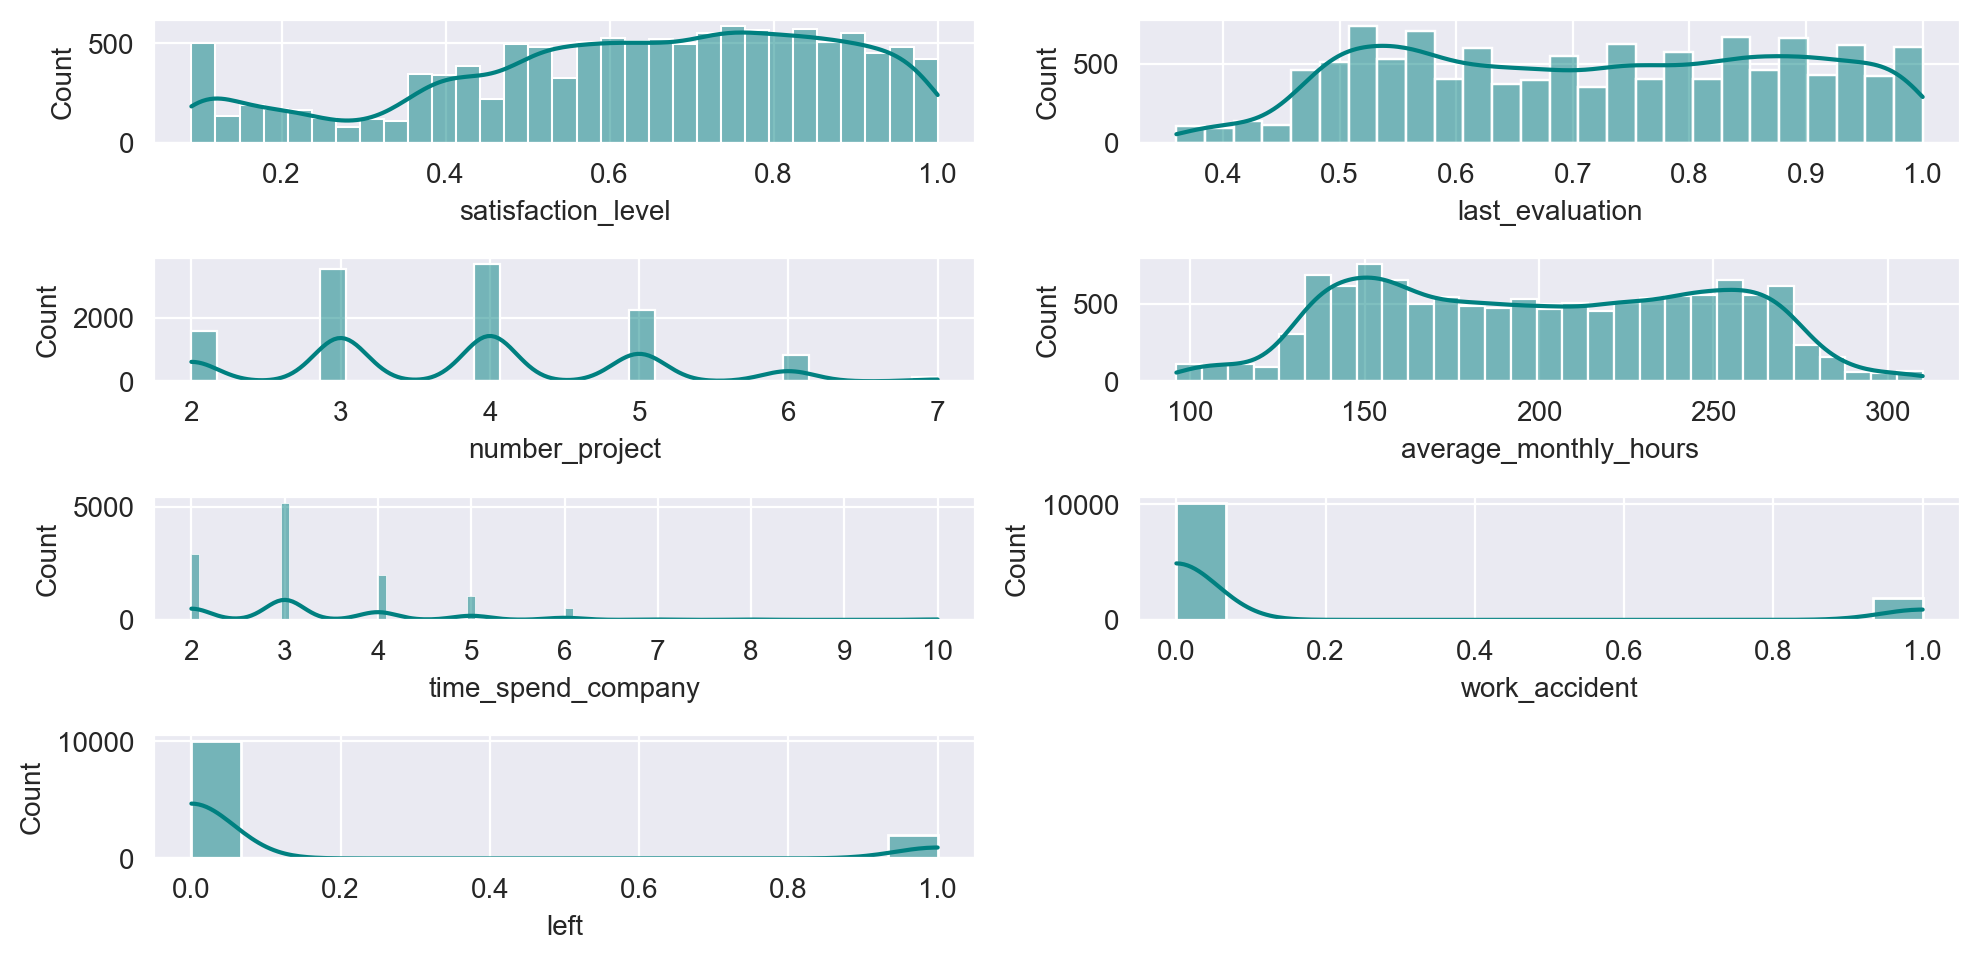

In [23]:
fig = plt.figure(figsize=(10,20), dpi=200)
for i, col in enumerate(df.select_dtypes(exclude="object").columns[:-1]):
        plt.subplot(17,2,i+1)
        sns.histplot(df[col], kde=True, color="teal", )
plt.tight_layout();

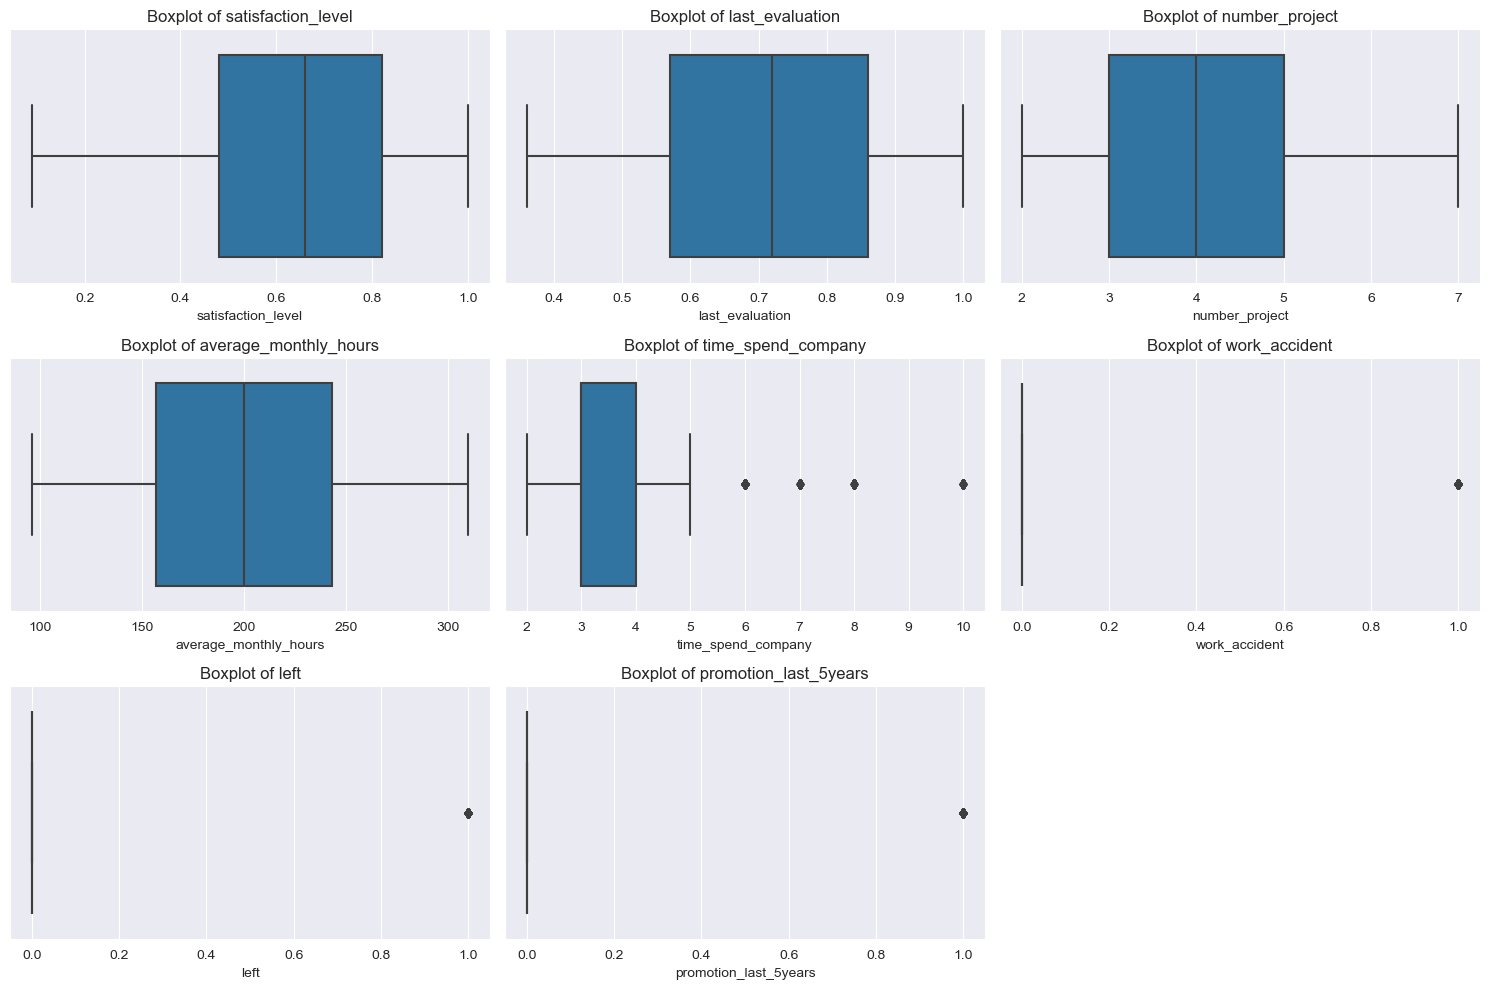

In [24]:
plt.figure(figsize=(15, 10))

# Boxplotlar oluşturulacak
for i, column in enumerate(df.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(3, 3, i)  # 3x3 grid düzeni
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

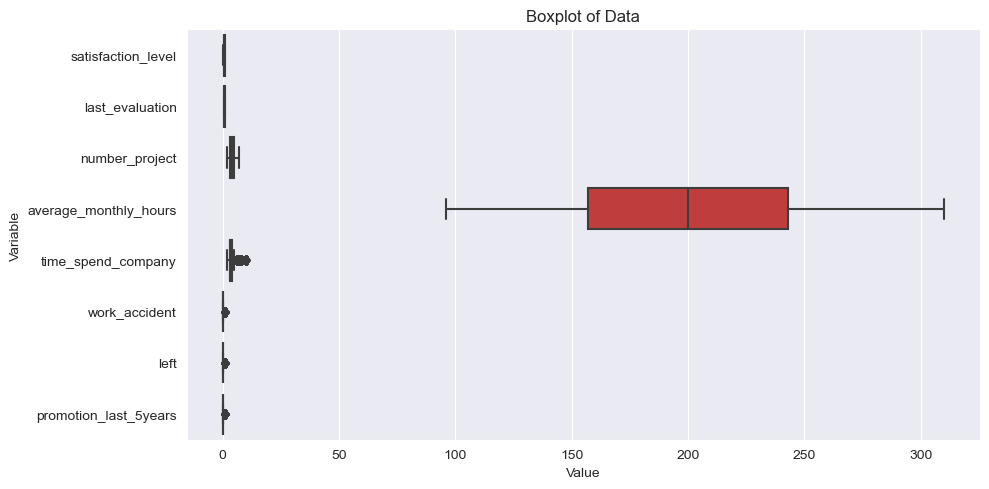

In [25]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, orient="h", linewidth=1.5)
plt.title("Boxplot of Data")
plt.ylabel("Variable")
plt.xlabel("Value")
plt.tight_layout()
plt.show()

## satisfaction_level

In [26]:
first_looking(df, 'satisfaction_level')

column name    :  satisfaction_level
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  92
shape_of_df    :  (11991, 10)
--------------------------------
satisfaction_level
0.74    214
0.10    203
0.73    201
0.50    200
0.72    199
       ... 
0.25     29
0.26     28
0.12     26
0.28     24
0.27     23
Name: count, Length: 92, dtype: int64


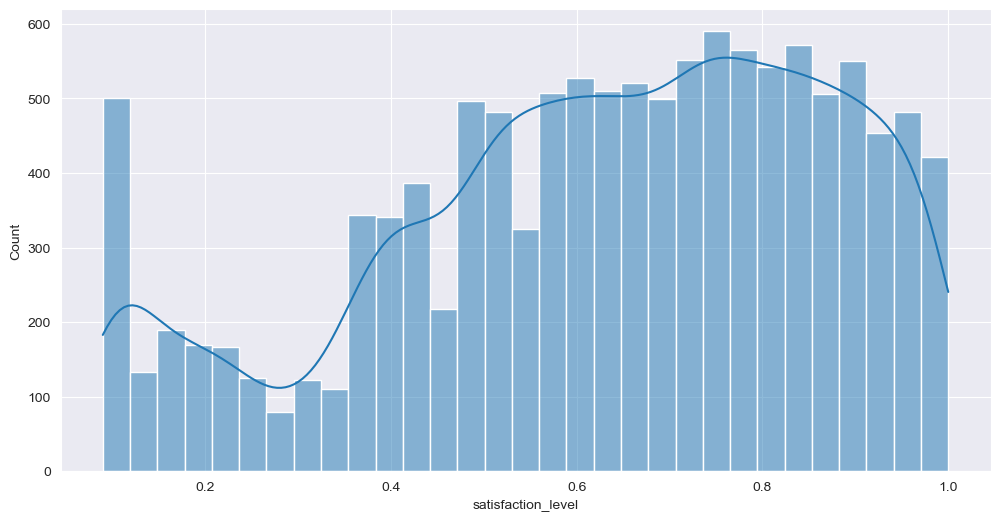

In [27]:
sns.histplot(df, x = 'satisfaction_level', kde = True);

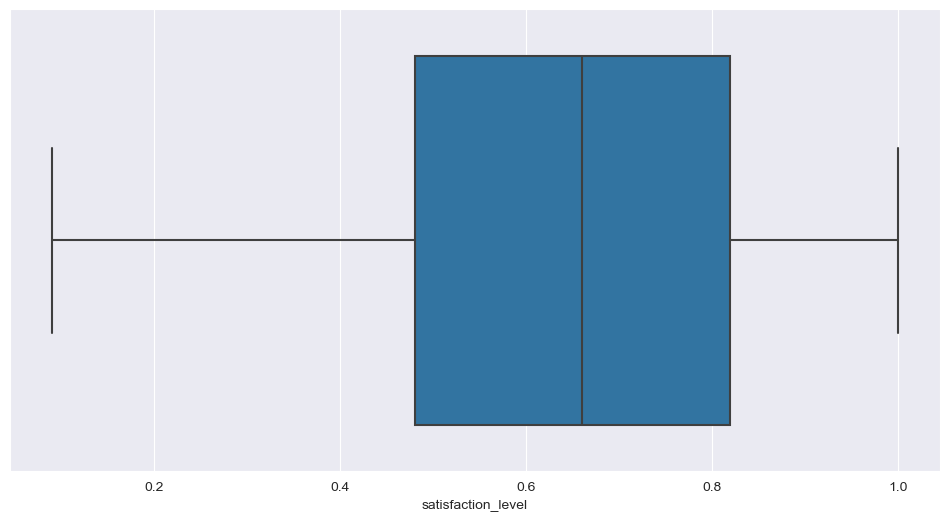

In [28]:
sns.boxplot(df, x = 'satisfaction_level');

In [29]:
df.groupby('left')['satisfaction_level'].value_counts()

left  satisfaction_level
0     0.50                  198
      0.74                  186
      0.66                  186
      0.59                  181
      0.72                  180
                           ... 
1     0.22                    1
      0.58                    1
      0.24                    1
      0.65                    1
      0.64                    1
Name: count, Length: 170, dtype: int64

In [30]:
df.satisfaction_level.unique()

array([0.38, 0.8 , 0.11, 0.72, 0.37, 0.41, 0.1 , 0.92, 0.89, 0.42, 0.45,
       0.84, 0.36, 0.78, 0.76, 0.09, 0.46, 0.4 , 0.82, 0.87, 0.57, 0.43,
       0.13, 0.44, 0.39, 0.85, 0.81, 0.9 , 0.74, 0.79, 0.17, 0.24, 0.91,
       0.71, 0.86, 0.14, 0.75, 0.7 , 0.31, 0.73, 0.83, 0.32, 0.54, 0.27,
       0.77, 0.88, 0.48, 0.19, 0.6 , 0.12, 0.61, 0.33, 0.56, 0.47, 0.28,
       0.55, 0.53, 0.59, 0.66, 0.25, 0.34, 0.58, 0.51, 0.35, 0.64, 0.5 ,
       0.23, 0.15, 0.49, 0.3 , 0.63, 0.21, 0.62, 0.29, 0.2 , 0.16, 0.65,
       0.68, 0.67, 0.22, 0.26, 0.99, 0.98, 1.  , 0.52, 0.93, 0.97, 0.69,
       0.94, 0.96, 0.18, 0.95])

## last_evaluation

In [31]:
first_looking(df, 'last_evaluation')

column name    :  last_evaluation
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  65
shape_of_df    :  (11991, 10)
--------------------------------
last_evaluation
0.55    281
0.50    269
0.51    264
0.57    258
0.54    252
       ... 
0.42     45
0.43     44
0.38     42
0.44     35
0.36     19
Name: count, Length: 65, dtype: int64


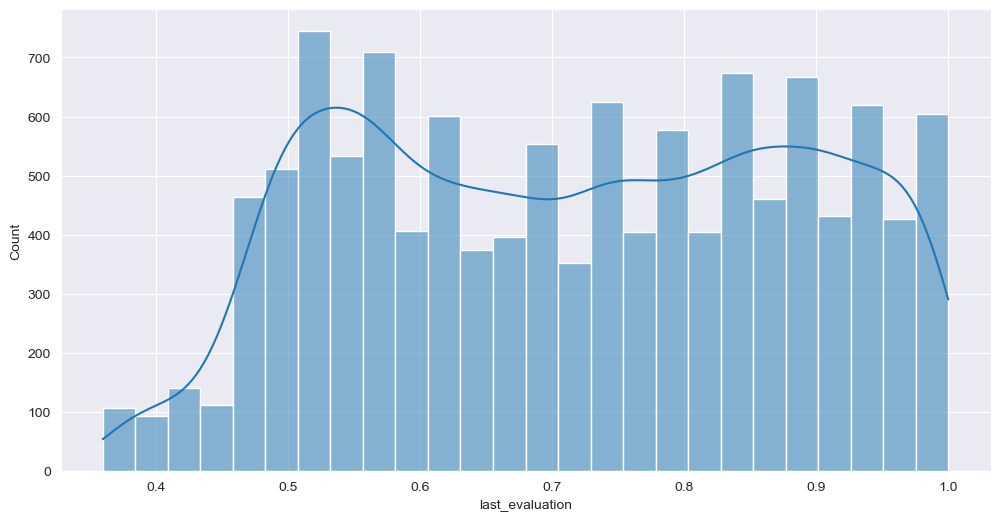

In [32]:
sns.histplot(df, x = 'last_evaluation', kde = True);

In [33]:
df.last_evaluation.unique()

array([0.53, 0.86, 0.88, 0.87, 0.52, 0.5 , 0.77, 0.85, 1.  , 0.54, 0.81,
       0.92, 0.55, 0.56, 0.47, 0.99, 0.51, 0.89, 0.83, 0.95, 0.57, 0.49,
       0.46, 0.62, 0.94, 0.48, 0.8 , 0.74, 0.7 , 0.78, 0.91, 0.93, 0.98,
       0.97, 0.79, 0.59, 0.84, 0.45, 0.96, 0.68, 0.82, 0.9 , 0.71, 0.6 ,
       0.65, 0.58, 0.72, 0.67, 0.75, 0.73, 0.63, 0.61, 0.76, 0.66, 0.69,
       0.37, 0.64, 0.39, 0.41, 0.43, 0.44, 0.36, 0.38, 0.4 , 0.42])

In [34]:
df.last_evaluation.value_counts()

last_evaluation
0.55    281
0.50    269
0.51    264
0.57    258
0.54    252
       ... 
0.42     45
0.43     44
0.38     42
0.44     35
0.36     19
Name: count, Length: 65, dtype: int64

## number_project

In [35]:
first_looking(df, 'number_project')

column name    :  number_project
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  6
shape_of_df    :  (11991, 10)
--------------------------------
number_project
4    3685
3    3520
5    2233
2    1582
6     826
7     145
Name: count, dtype: int64


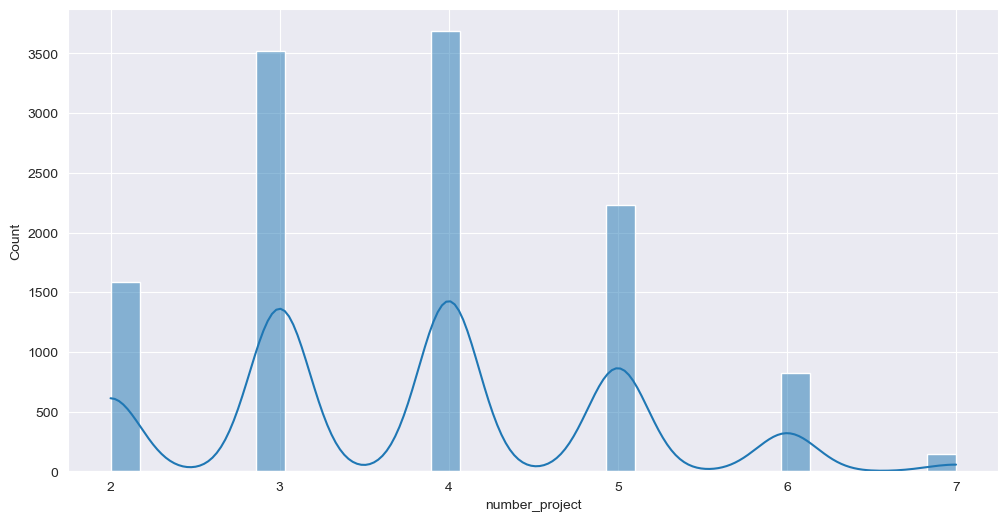

In [36]:
sns.histplot(df, x = 'number_project', kde = True);

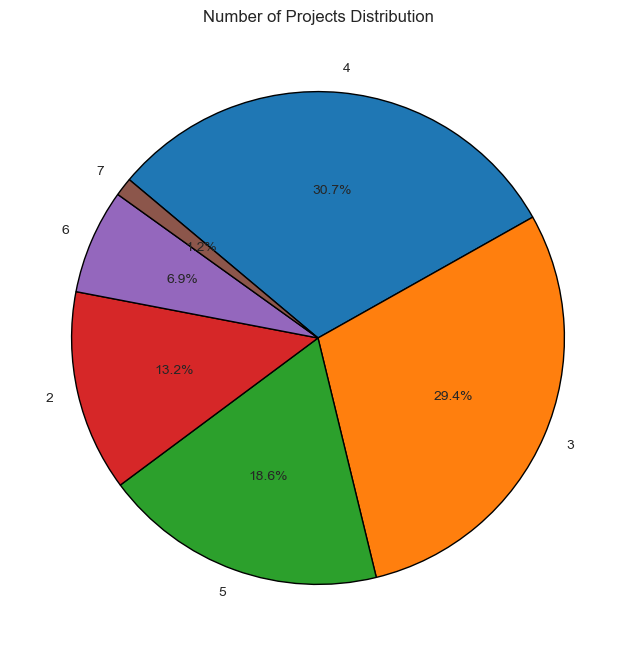

In [37]:
# Verilerin frekanslarını hesapla
project_counts = df['number_project'].value_counts()

# Pasta grafiği oluştur
plt.figure(figsize=(8, 8))
plt.pie(project_counts, labels=project_counts.index, autopct='%1.1f%%', startangle=140, counterclock=False, 
        wedgeprops={'edgecolor': 'black'})


plt.title('Number of Projects Distribution')
plt.show()

## average_monthly_hours

In [38]:
first_looking(df, 'average_monthly_hours')

column name    :  average_monthly_hours
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  215
shape_of_df    :  (11991, 10)
--------------------------------
average_monthly_hours
156    112
149    112
160    111
151    107
135    104
      ... 
298      5
302      5
297      5
299      5
303      5
Name: count, Length: 215, dtype: int64


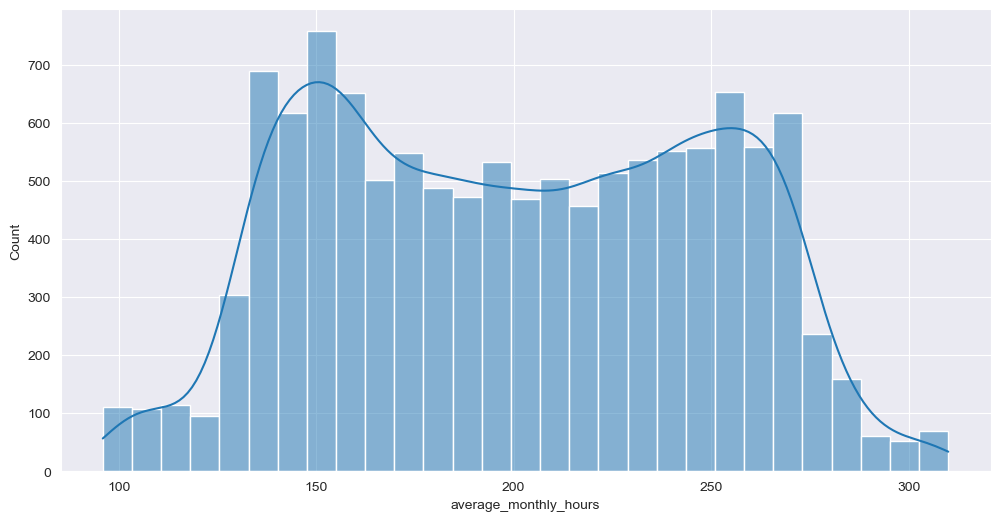

In [39]:
sns.histplot(df, x = 'average_monthly_hours', kde = True);

In [40]:
#Index(['satisfaction_level', 'last_evaluation', 'number_project',
       #'average_monthly_hours', 'time_spend_company', 'work_accident', 'left',
       #'promotion_last_5years', 'departments', 'salary'],
      #dtype='object')

## time_spend_company

In [41]:
first_looking(df, 'time_spend_company')

column name    :  time_spend_company
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  8
shape_of_df    :  (11991, 10)
--------------------------------
time_spend_company
3     5190
2     2910
4     2005
5     1062
6      542
10     107
7       94
8       81
Name: count, dtype: int64


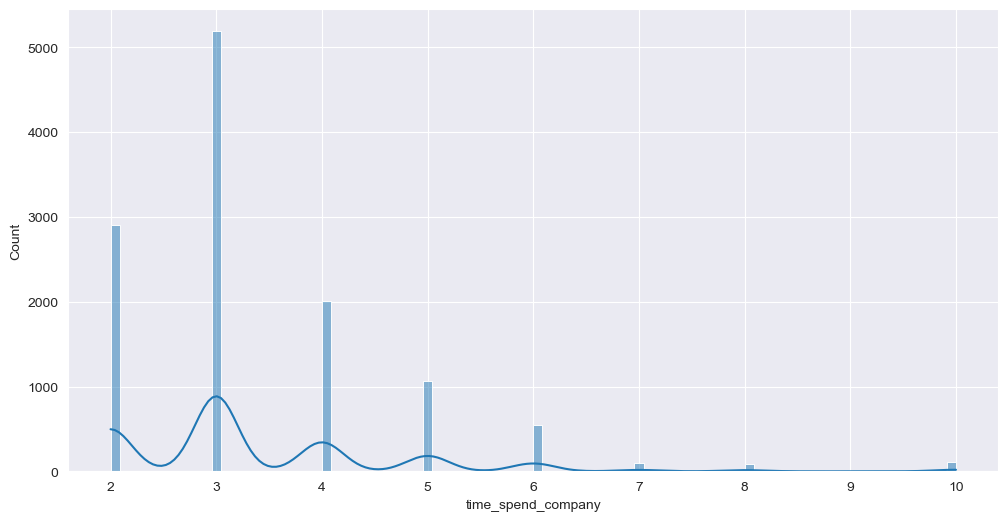

In [42]:
sns.histplot(df, x = 'time_spend_company', kde = True);

In [43]:
df['time_spend_company'].value_counts(normalize = True)*100

time_spend_company
3    43.28
2    24.27
4    16.72
5     8.86
6     4.52
10    0.89
7     0.78
8     0.68
Name: proportion, dtype: float64

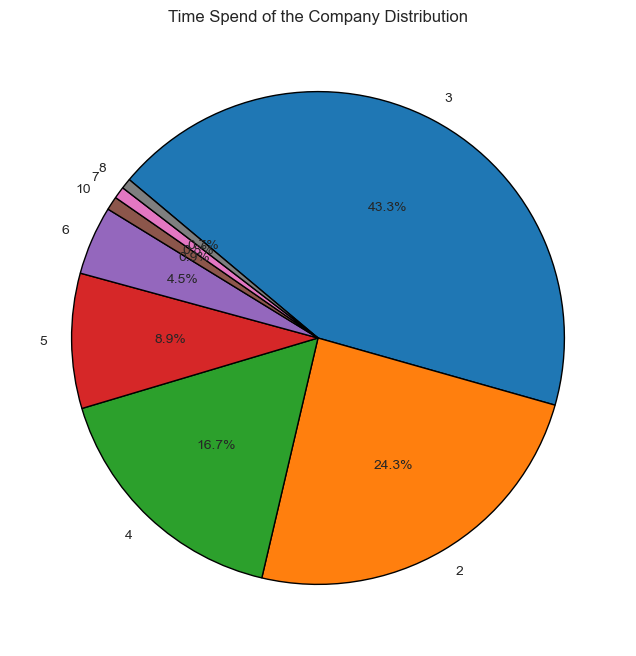

In [44]:

# Verilerin frekanslarını hesapla
time_spend_counts = df['time_spend_company'].value_counts()

# Pasta grafiği oluştur
plt.figure(figsize=(8, 8))
plt.pie(time_spend_counts, labels=time_spend_counts.index, autopct='%1.1f%%', startangle=140, counterclock=False, 
        wedgeprops={'edgecolor': 'black'})


plt.title('Time Spend of the Company Distribution')
plt.show()

## work_accident

In [45]:
first_looking(df, 'work_accident')

column name    :  work_accident
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  2
shape_of_df    :  (11991, 10)
--------------------------------
work_accident
0    10141
1     1850
Name: count, dtype: int64


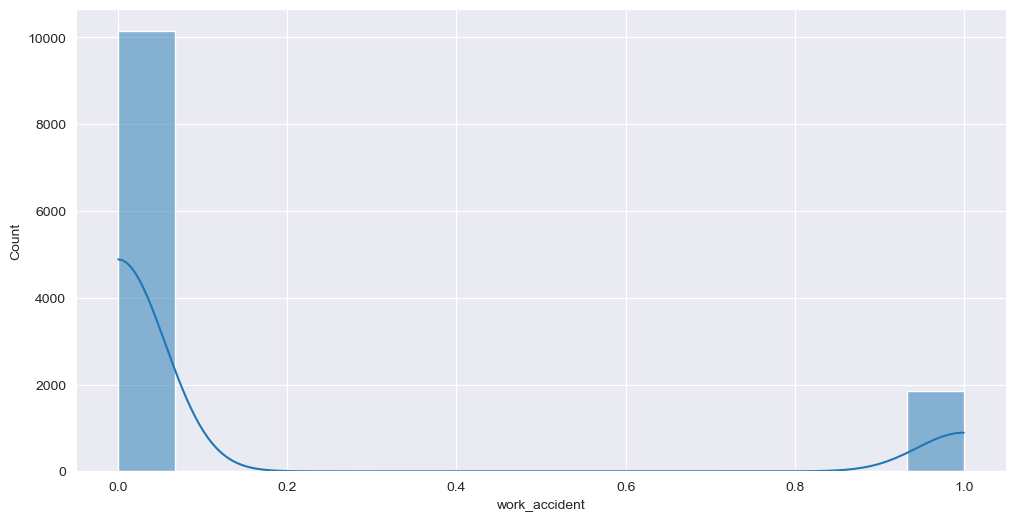

In [46]:
sns.histplot(df, x = 'work_accident', kde = True);

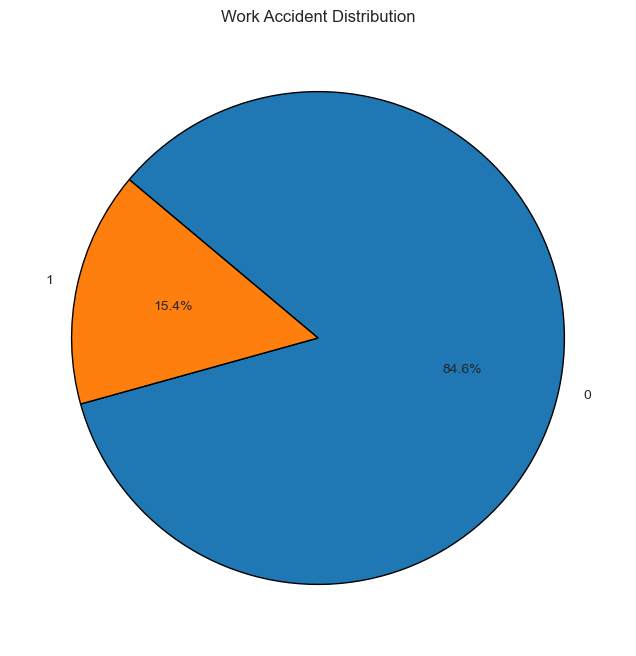

In [47]:
accident_counts = df['work_accident'].value_counts()

# Pasta grafiği oluştur
plt.figure(figsize=(8, 8))
plt.pie(accident_counts, labels=accident_counts.index, autopct='%1.1f%%', startangle=140, counterclock=False, 
        wedgeprops={'edgecolor': 'black'})

plt.title('Work Accident Distribution')
plt.show()

## promotion_last_5years

In [48]:
first_looking(df, 'promotion_last_5years')

column name    :  promotion_last_5years
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  2
shape_of_df    :  (11991, 10)
--------------------------------
promotion_last_5years
0    11788
1      203
Name: count, dtype: int64


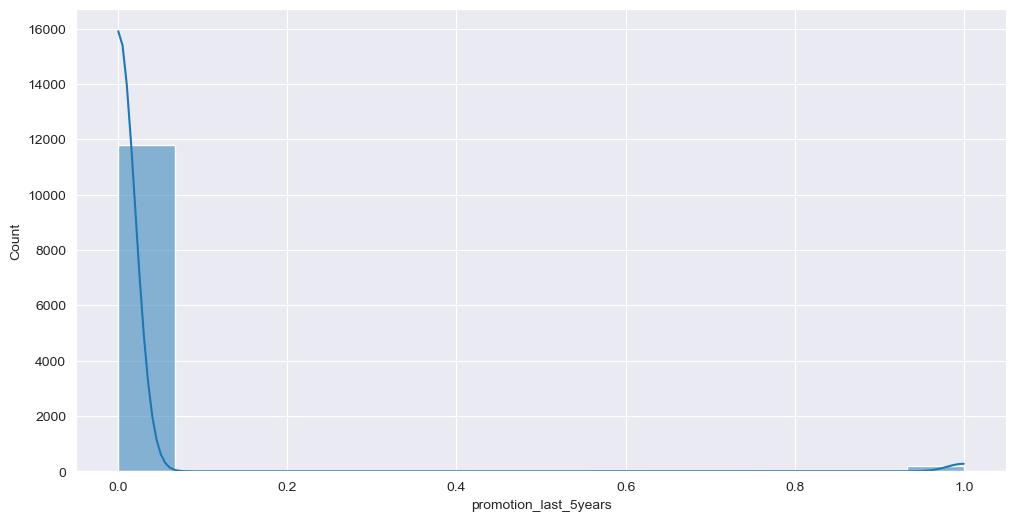

In [49]:
sns.histplot(df, x = 'promotion_last_5years', kde = True);

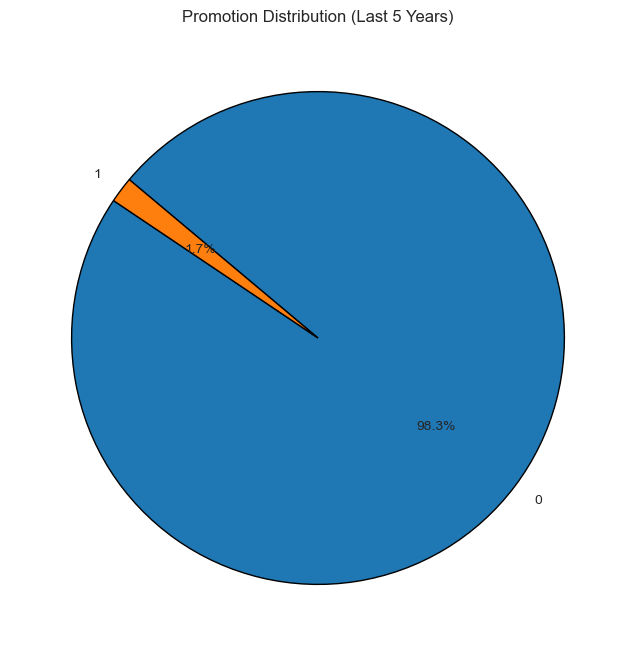

In [50]:
promotion_counts = df['promotion_last_5years'].value_counts()

# Pasta grafiği oluştur
plt.figure(figsize=(8, 8))
plt.pie(promotion_counts, labels=promotion_counts.index, autopct='%1.1f%%', startangle=140, counterclock=False, 
        wedgeprops={'edgecolor': 'black'})

plt.title('Promotion Distribution (Last 5 Years)')
plt.show()

## departments

In [51]:
first_looking(df, 'departments')

column name    :  departments
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  10
shape_of_df    :  (11991, 10)
--------------------------------
departments
sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: count, dtype: int64


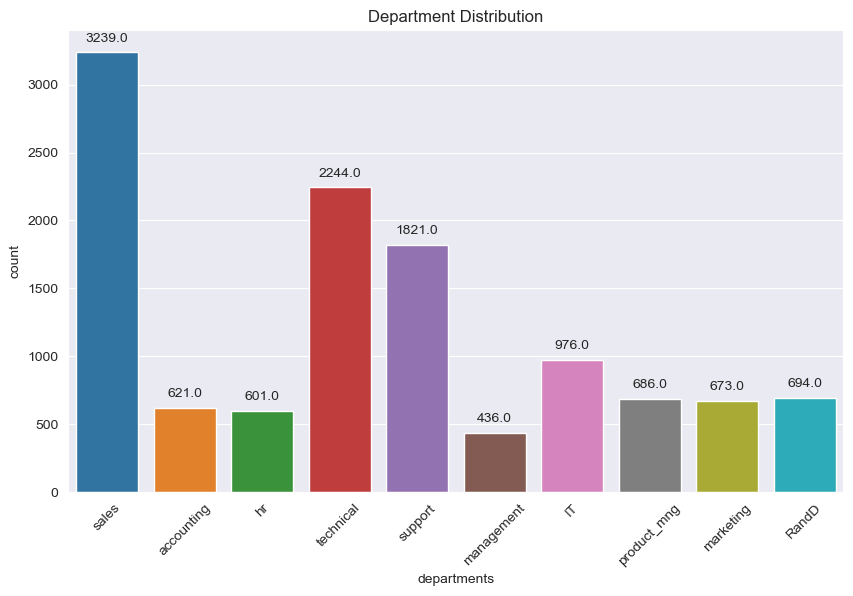

In [52]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='departments')
plt.xticks(rotation=45)  # Departman isimlerini döndürmek için
plt.title('Department Distribution')

# Her bir çubuğun üzerine sayısal değer ekleme
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

plt.show()

## salary

In [53]:
first_looking(df, 'salary')

column name    :  salary
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  3
shape_of_df    :  (11991, 10)
--------------------------------
salary
low       5740
medium    5261
high       990
Name: count, dtype: int64


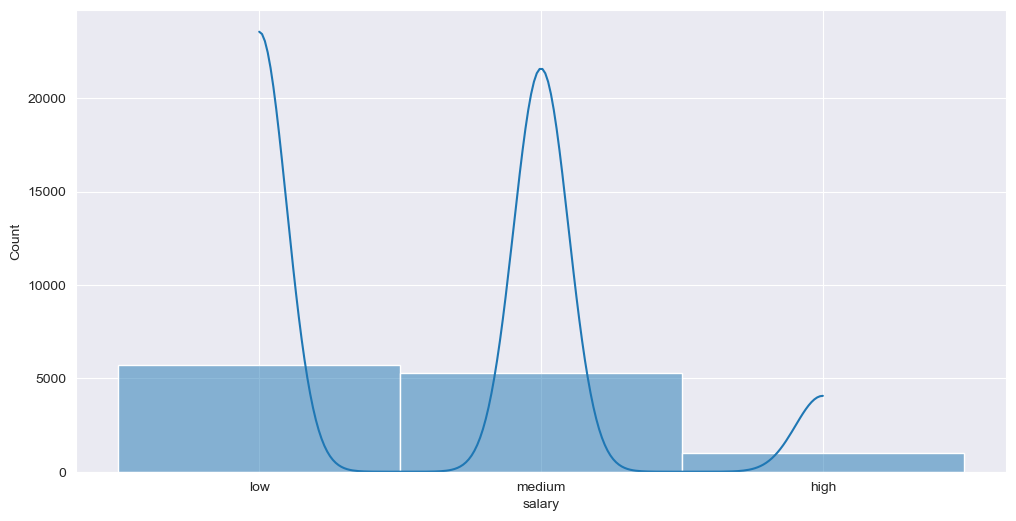

In [54]:
sns.histplot(df, x = 'salary', kde = True);

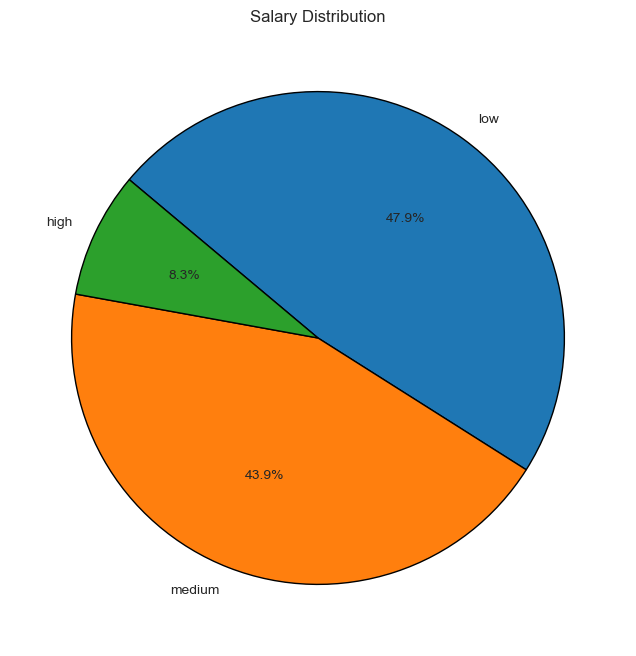

In [55]:
salary_counts = df['salary'].value_counts()

# Pasta grafiği oluştur
plt.figure(figsize=(8, 8))
plt.pie(salary_counts, labels=salary_counts.index, autopct='%1.1f%%', startangle=140, counterclock=False, 
        wedgeprops={'edgecolor': 'black'})

plt.title('Salary Distribution')
plt.show()

## 3. Cluster Analysis

In [56]:
first_looking(df, 'left')

column name    :  left
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  2
shape_of_df    :  (11991, 10)
--------------------------------
left
0    10000
1     1991
Name: count, dtype: int64


In [57]:
df[df['left'] == 1].describe().T

count   mean   std    min    25%    50%    75%    max
satisfaction_level    1991.00   0.44  0.27   0.09   0.11   0.41   0.73   0.92
last_evaluation       1991.00   0.72  0.20   0.45   0.52   0.79   0.91   1.00
number_project        1991.00   3.88  1.82   2.00   2.00   4.00   6.00   7.00
average_monthly_hours 1991.00 208.16 61.30 126.00 146.00 226.00 262.50 310.00
time_spend_company    1991.00   3.88  0.97   2.00   3.00   4.00   5.00   6.00
work_accident         1991.00   0.05  0.22   0.00   0.00   0.00   0.00   1.00
left                  1991.00   1.00  0.00   1.00   1.00   1.00   1.00   1.00
promotion_last_5years 1991.00   0.00  0.06   0.00   0.00   0.00   0.00   1.00

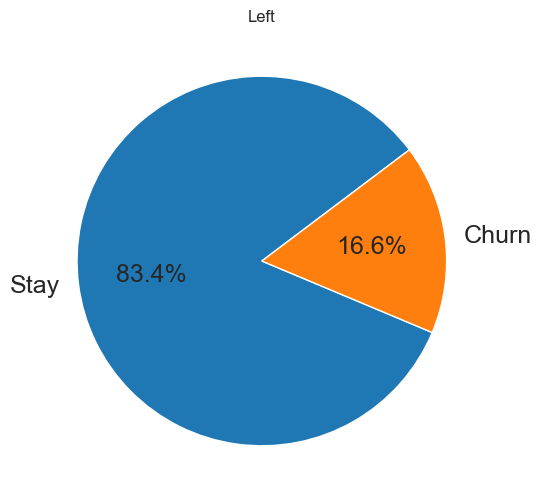

In [58]:
df.left.value_counts().plot.pie(autopct='%1.1f%%',
                                  startangle=37,
                                  fontsize=18,
                                  labels=["Stay","Churn"],
                                  ylabel='',
                                  title='Left');

In [59]:
df.shape

(11991, 10)

In [60]:
df[df['left'] == 1]

satisfaction_level  last_evaluation  number_project  \
0                   0.38             0.53               2   
1                   0.80             0.86               5   
2                   0.11             0.88               7   
3                   0.72             0.87               5   
4                   0.37             0.52               2   
...                  ...              ...             ...   
1986                0.37             0.57               2   
1987                0.11             0.92               7   
1988                0.41             0.53               2   
1989                0.84             0.96               4   
1990                0.40             0.51               2   

      average_monthly_hours  time_spend_company  work_accident  left  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2                       272                   4              0     1   
3                       223                   5              0     1   
4                       159                   3              0     1   
...                     ...                 ...            ...   ...   
1986                    147                   3              0     1   
1987                    293                   4              0     1   
1988                    157                   3              0     1   
1989                    247                   5              0     1   
1990                    148                   3              0     1   

      promotion_last_5years departments  salary  
0                         0       sales     low  
1                         0       sales  medium  
2                         0       sales  medium  
3                         0       sales     low  
4                         0       sales     low  
...                     ...         ...     ...  
1986                      0       sales     low  
1987                      0       sales     low  
1988                      0       sales     low  
1989                      0       sales     low  
1990                      0       sales     low  

[1991 rows x 10 columns]

In [61]:
df[df['left'] == 1].describe().T

count   mean   std    min    25%    50%    75%    max
satisfaction_level    1991.00   0.44  0.27   0.09   0.11   0.41   0.73   0.92
last_evaluation       1991.00   0.72  0.20   0.45   0.52   0.79   0.91   1.00
number_project        1991.00   3.88  1.82   2.00   2.00   4.00   6.00   7.00
average_monthly_hours 1991.00 208.16 61.30 126.00 146.00 226.00 262.50 310.00
time_spend_company    1991.00   3.88  0.97   2.00   3.00   4.00   5.00   6.00
work_accident         1991.00   0.05  0.22   0.00   0.00   0.00   0.00   1.00
left                  1991.00   1.00  0.00   1.00   1.00   1.00   1.00   1.00
promotion_last_5years 1991.00   0.00  0.06   0.00   0.00   0.00   0.00   1.00

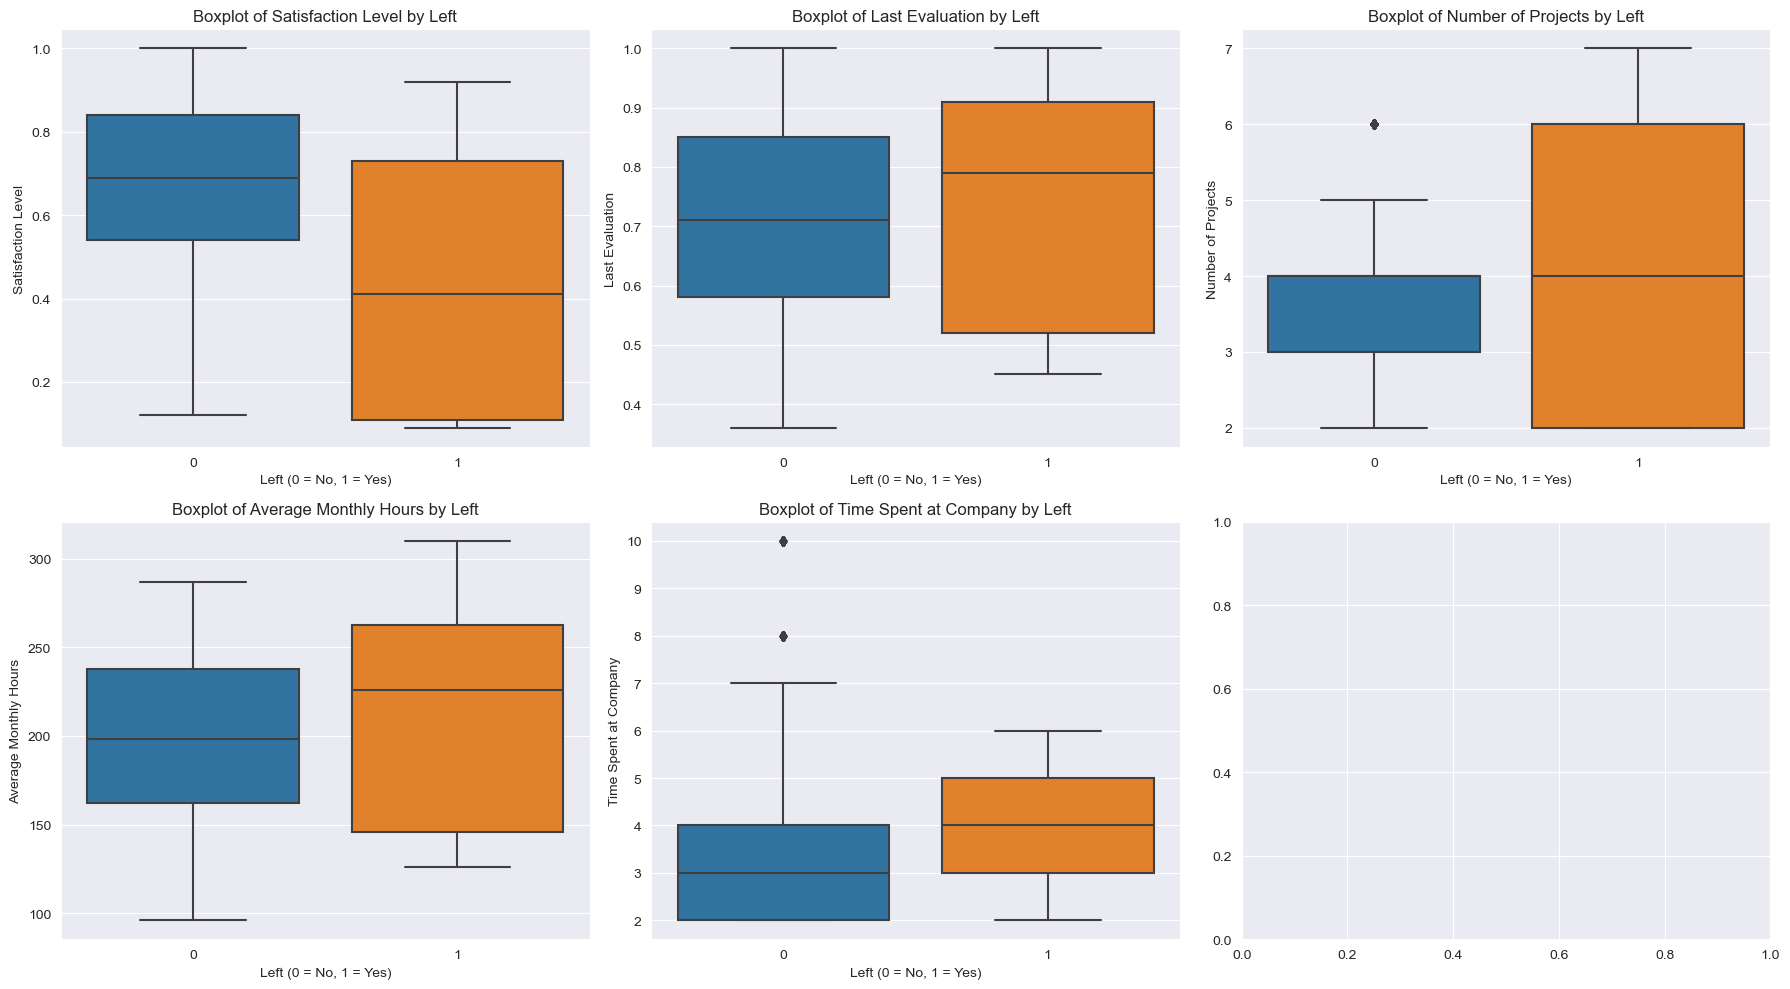

In [62]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

# Değişkenler ve başlıklar
variables = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'time_spend_company']
titles = ['Satisfaction Level', 'Last Evaluation', 'Number of Projects', 'Average Monthly Hours', 'Time Spent at Company']

for i, (var, title) in enumerate(zip(variables, titles)):
    sns.boxplot(x='left', y=var, data=df, ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f'Boxplot of {title} by Left')
    axes[i//3, i%3].set_xlabel('Left (0 = No, 1 = Yes)')
    axes[i//3, i%3].set_ylabel(title)

plt.tight_layout()
plt.show()

In [63]:
# df[df['average_monthly_hours'] > 192].shape[0]

In [64]:
# df[(df['left'] ==1) & (df['average_monthly_hours'] > 192)].groupby('left')['average_monthly_hours'].value_counts()

In [65]:
#df[(df['left'] ==1) & (df['average_monthly_hours'] > 192)].describe().T

In [66]:
# df = df[df['average_monthly_hours'] <= 192]

**Maximum working hours per month in Germany**

https://www.atoss.com/de/wissen-inspiration/wiki/maximale-arbeitszeit#:~:text=Die%20maximale%20Arbeitszeit%20pro%20Woche%20laut%20Arbeitszeitgesetz%20beträgt%2048%20Arbeitsstunden,sind%20Arbeitgeber%20laut%20Arbeitsrecht%20verpflichtet.#

In [67]:
df['left'].value_counts()

left
0    10000
1     1991
Name: count, dtype: int64

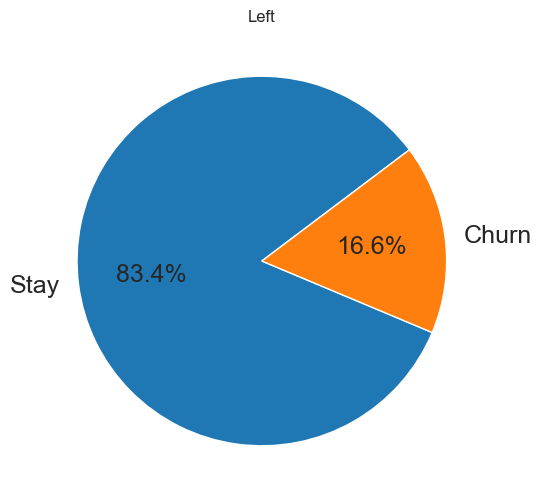

In [68]:
df.left.value_counts().plot.pie(autopct='%1.1f%%',
                                  startangle=37,
                                  fontsize=18,
                                  labels=["Stay","Churn"],
                                  ylabel='',
                                  title='Left');

In [69]:
df[df['left'] ==1][['salary']].value_counts()

salary
low       1174
medium     769
high        48
Name: count, dtype: int64

In [70]:
df[df['left'] ==1][['salary']].value_counts(normalize = True)

salary
low      0.59
medium   0.39
high     0.02
Name: proportion, dtype: float64

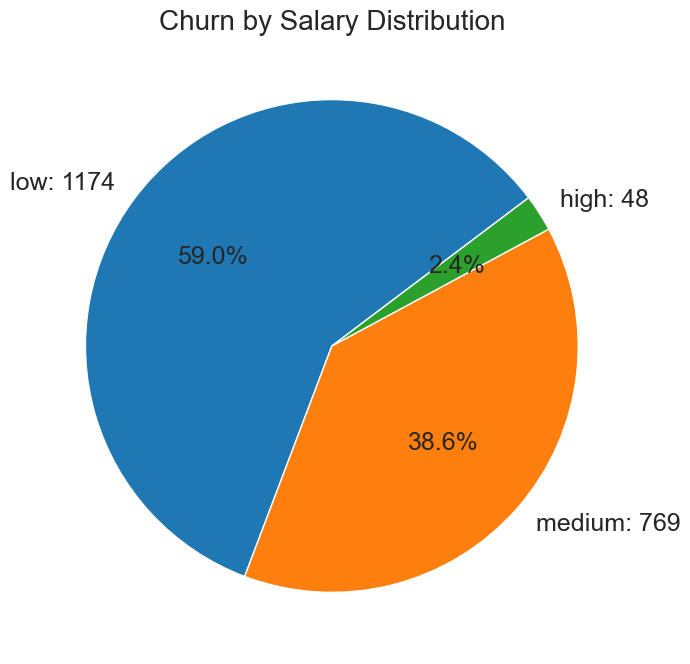

In [71]:
salary_counts = df[df['left'] == 1]['salary'].value_counts()

# Define labels with counts
labels = [f'{salary}: {count}' for salary, count in zip(salary_counts.index, salary_counts.values)]

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(salary_counts, 
        labels=labels,              # Set the labels with the count information
        autopct='%1.1f%%',          # Show percentages on the pie chart
        startangle=37,              # Rotate the pie chart
        textprops={'fontsize': 18})  # Set font size for labels

# Set the title for the plot
plt.title('Churn by Salary Distribution', fontsize=20)

# Display the pie chart
plt.show()

In [72]:
df[df['left'] ==1][['departments']].value_counts()

departments
sales          550
technical      390
support        312
IT             158
hr             113
marketing      112
product_mng    110
accounting     109
RandD           85
management      52
Name: count, dtype: int64

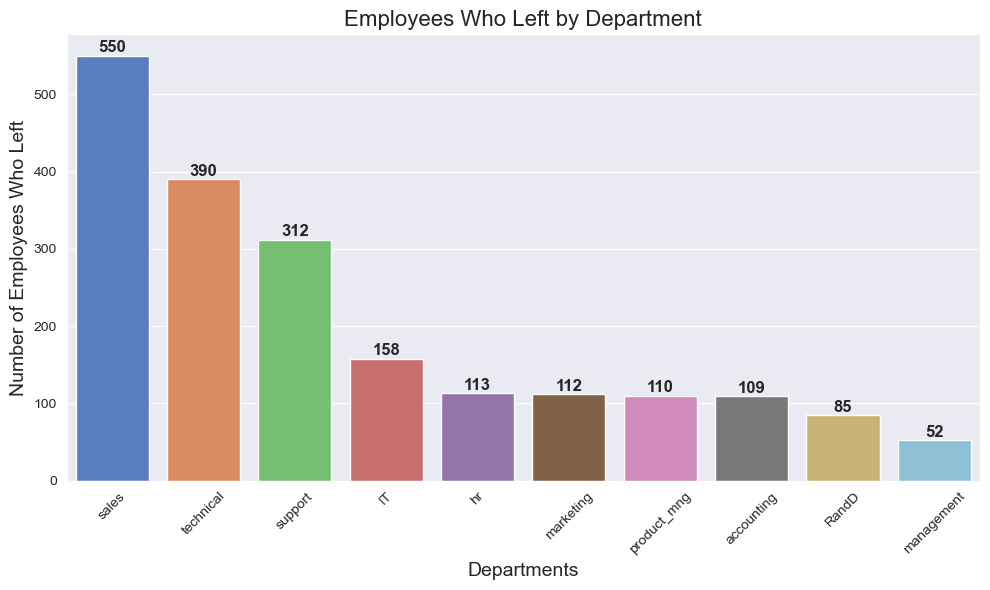

In [73]:
departments_counts = df[df['left'] == 1]['departments'].value_counts()

# Create the bar plot
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x=departments_counts.index, y=departments_counts.values, palette="muted")

# Annotate each bar with its value
for i, value in enumerate(departments_counts.values):
    bar_plot.text(i, value + 10, f'{value}', ha='center', va='center', fontsize=12, fontweight='bold')

# Add labels and title
plt.xlabel('Departments', fontsize=14)
plt.ylabel('Number of Employees Who Left', fontsize=14)
plt.title('Employees Who Left by Department', fontsize=16)

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()       # Adjust layout to fit everything cleanly
plt.show()

In [74]:
df[df['left'] ==1][['departments']].value_counts(normalize = True)

departments
sales         0.28
technical     0.20
support       0.16
IT            0.08
hr            0.06
marketing     0.06
product_mng   0.06
accounting    0.05
RandD         0.04
management    0.03
Name: proportion, dtype: float64

- sales 
- accounting 
- hr (Human Resources) 
- technical
- support 
- management 
- IT (Information Technology) 
- product_mng (Product Management)
- marketing 
- RandD (Research and Development)

In [75]:
df[(df['left'] ==1)].groupby('departments')['salary'].value_counts()

departments  salary
IT           low        87
             medium     67
             high        4
RandD        low        51
             medium     31
             high        3
accounting   low        59
             medium     47
             high        3
hr           low        62
             medium     48
             high        3
management   low        32
             medium     19
             high        1
marketing    low        76
             medium     33
             high        3
product_mng  low        59
             medium     47
             high        4
sales        low       319
             medium    219
             high       12
support      low       191
             medium    116
             high        5
technical    low       238
             medium    142
             high       10
Name: count, dtype: int64

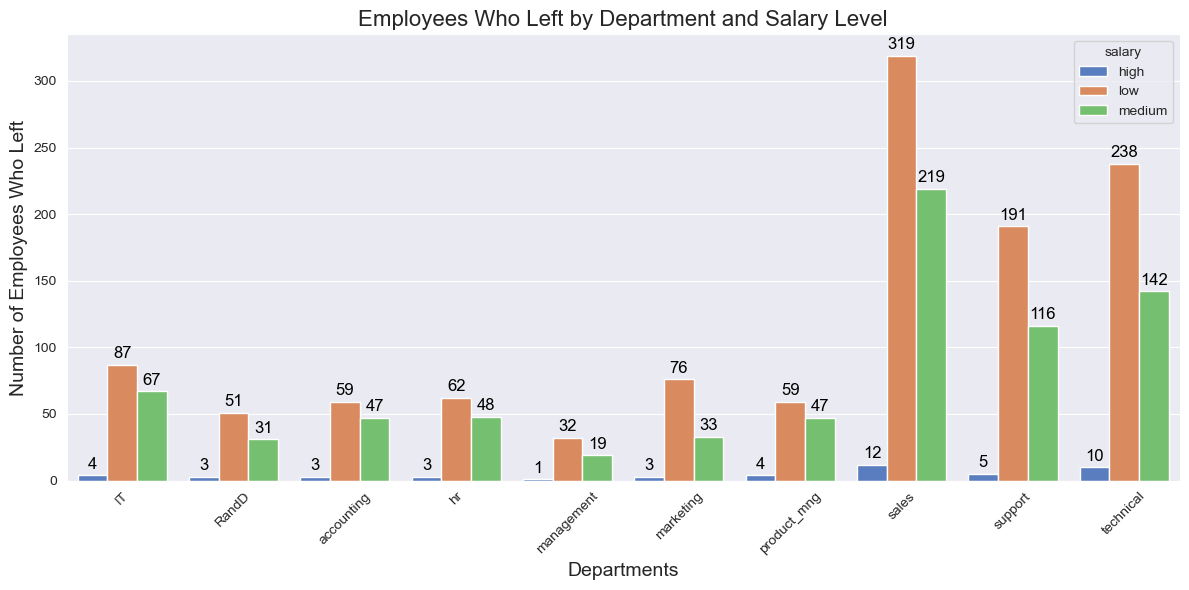

In [76]:
grouped_data = df[df['left'] == 1].groupby(['departments', 'salary']).size().reset_index(name='counts')

# Create a bar plot
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x='departments', y='counts', hue='salary', data=grouped_data, palette="muted")

# Add labels and title
plt.xlabel('Departments', fontsize=14)
plt.ylabel('Number of Employees Who Left', fontsize=14)
plt.title('Employees Who Left by Department and Salary Level', fontsize=16)

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Annotate each bar with the count
for p in bar_plot.patches:
    bar_plot.annotate(f'{int(p.get_height())}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='center', 
                      xytext=(0, 8), 
                      textcoords='offset points', 
                      fontsize=12, color='black')

# Show the plot with tight layout
plt.tight_layout()
plt.show()

In [77]:
df[(df['left'] ==1)].groupby('departments')['salary'].value_counts(normalize = True)

departments  salary
IT           low      0.55
             medium   0.42
             high     0.03
RandD        low      0.60
             medium   0.36
             high     0.04
accounting   low      0.54
             medium   0.43
             high     0.03
hr           low      0.55
             medium   0.42
             high     0.03
management   low      0.62
             medium   0.37
             high     0.02
marketing    low      0.68
             medium   0.29
             high     0.03
product_mng  low      0.54
             medium   0.43
             high     0.04
sales        low      0.58
             medium   0.40
             high     0.02
support      low      0.61
             medium   0.37
             high     0.02
technical    low      0.61
             medium   0.36
             high     0.03
Name: proportion, dtype: float64

In [78]:
df[(df['left'] ==1) & (df['satisfaction_level'] < 0.5)].describe().T

count   mean   std    min    25%    50%    75%    max
satisfaction_level    1412.00   0.29  0.15   0.09   0.11   0.38   0.42   0.49
last_evaluation       1412.00   0.65  0.18   0.45   0.50   0.55   0.84   1.00
number_project        1412.00   3.63  2.05   2.00   2.00   2.00   6.00   7.00
average_monthly_hours 1412.00 194.85 65.67 126.00 141.00 155.00 265.00 310.00
time_spend_company    1412.00   3.44  0.62   2.00   3.00   3.00   4.00   6.00
work_accident         1412.00   0.05  0.22   0.00   0.00   0.00   0.00   1.00
left                  1412.00   1.00  0.00   1.00   1.00   1.00   1.00   1.00
promotion_last_5years 1412.00   0.00  0.07   0.00   0.00   0.00   0.00   1.00

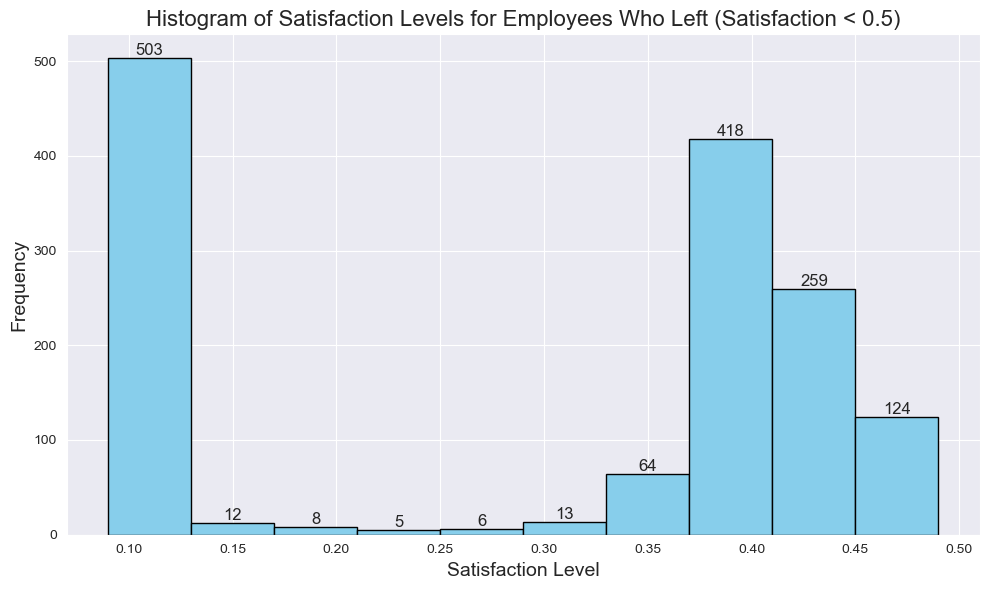

In [79]:
# Filter the data: employees who left and have a satisfaction level below 0.5
filtered_data = df[(df['left'] == 1) & (df['satisfaction_level'] < 0.5)]

# Create a histogram for the satisfaction level
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(filtered_data['satisfaction_level'], bins=10, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Satisfaction Level', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Histogram of Satisfaction Levels for Employees Who Left (Satisfaction < 0.5)', fontsize=16)

# Annotate each bar with its height (frequency)
for i in range(len(patches)):
    height = n[i]
    plt.text(patches[i].get_x() + patches[i].get_width()/2, height, f'{int(height)}', 
             ha='center', va='bottom', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

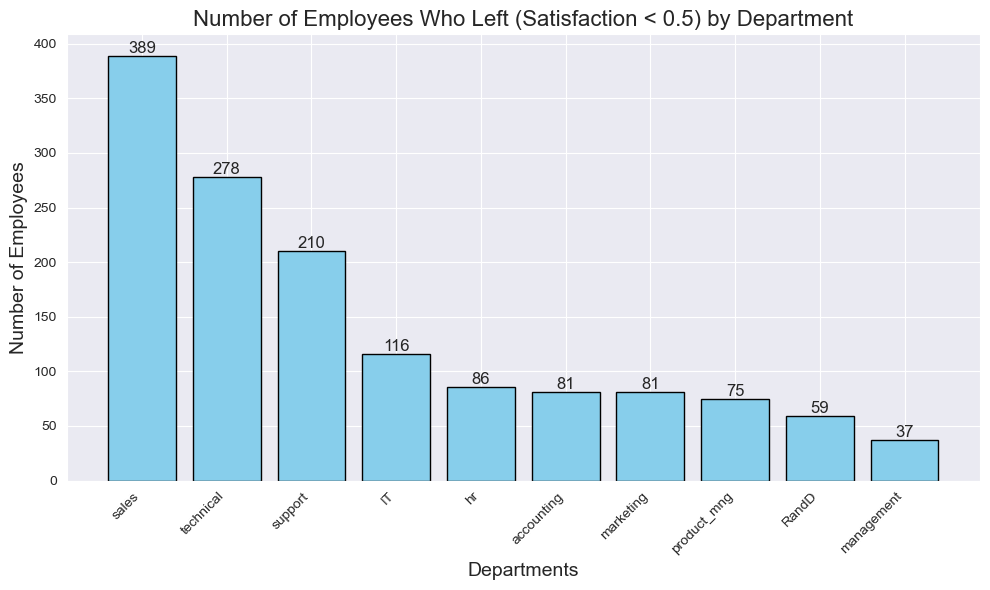

In [80]:
# Filter the data for employees who left and have a satisfaction level below 0.5
filtered_data = df[(df['left'] == 1) & (df['satisfaction_level'] < 0.5)]

# Count the number of employees who left in each department
department_counts = filtered_data['departments'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(department_counts.index, department_counts.values, color='skyblue', edgecolor='black')

# Add annotations to each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center', fontsize=12)

# Add labels and title
plt.xlabel('Departments', fontsize=14)
plt.ylabel('Number of Employees', fontsize=14)
plt.title('Number of Employees Who Left (Satisfaction < 0.5) by Department', fontsize=16)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()

In [81]:
df[(df['left'] ==1) & (df['satisfaction_level'] >= 0.5)].describe().T

count   mean   std    min    25%    50%    75%    max
satisfaction_level    579.00   0.80  0.09   0.50   0.75   0.81   0.86   0.92
last_evaluation       579.00   0.90  0.10   0.45   0.86   0.92   0.98   1.00
number_project        579.00   4.50  0.76   2.00   4.00   5.00   5.00   7.00
average_monthly_hours 579.00 240.64 30.28 128.00 229.00 245.00 260.00 310.00
time_spend_company    579.00   4.97  0.82   2.00   5.00   5.00   5.00   6.00
work_accident         579.00   0.05  0.22   0.00   0.00   0.00   0.00   1.00
left                  579.00   1.00  0.00   1.00   1.00   1.00   1.00   1.00
promotion_last_5years 579.00   0.00  0.06   0.00   0.00   0.00   0.00   1.00

In [82]:
df[(df['left'] ==1)][['time_spend_company']].describe().T

count  mean  std  min  25%  50%  75%  max
time_spend_company 1991.00  3.88 0.97 2.00 3.00 4.00 5.00 6.00

In [83]:
df[df['left'] ==1][['time_spend_company']].value_counts()

time_spend_company
3                     874
4                     495
5                     482
6                     109
2                      31
Name: count, dtype: int64

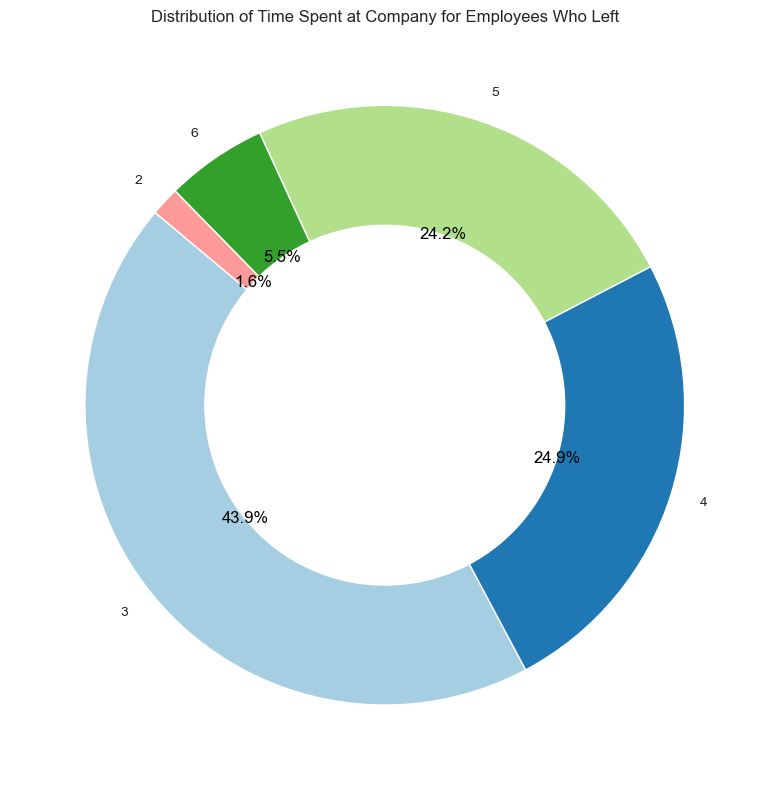

In [84]:
# Filter the data: employees who left
left_employees = df[df['left'] == 1]

# Count occurrences of each value in 'time_spend_company'
time_spend_counts = left_employees['time_spend_company'].value_counts()

# Create a pie chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    time_spend_counts,
    labels=time_spend_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Paired(range(len(time_spend_counts))),
    wedgeprops=dict(width=0.4)
)

# Add annotations
for text in autotexts:
    text.set_color('black')  # Set text color
    text.set_fontsize(12)   # Set text size

# Add title
plt.title('Distribution of Time Spent at Company for Employees Who Left')

# Show the pie chart
plt.tight_layout()
plt.show()

In [85]:
df[df['left'] ==1][['promotion_last_5years']].value_counts()

promotion_last_5years
0                        1983
1                           8
Name: count, dtype: int64

In [86]:
df[(df['left'] ==1) & (df['last_evaluation'] < 0.5)].describe().T

count   mean   std    min    25%    50%    75%    max
satisfaction_level    326.00   0.41  0.06   0.14   0.38   0.40   0.43   0.89
last_evaluation       326.00   0.47  0.01   0.45   0.46   0.47   0.48   0.49
number_project        326.00   2.10  0.60   2.00   2.00   2.00   2.00   7.00
average_monthly_hours 326.00 146.70 20.72 126.00 135.00 144.00 153.00 310.00
time_spend_company    326.00   3.02  0.23   2.00   3.00   3.00   3.00   5.00
work_accident         326.00   0.05  0.22   0.00   0.00   0.00   0.00   1.00
left                  326.00   1.00  0.00   1.00   1.00   1.00   1.00   1.00
promotion_last_5years 326.00   0.01  0.08   0.00   0.00   0.00   0.00   1.00

In [87]:
df[df['left'] ==1][['work_accident']].value_counts()

work_accident
0                1886
1                 105
Name: count, dtype: int64

In [88]:
df[df['left'] ==1][['number_project']].value_counts()

number_project
2                 857
6                 371
5                 343
4                 237
7                 145
3                  38
Name: count, dtype: int64

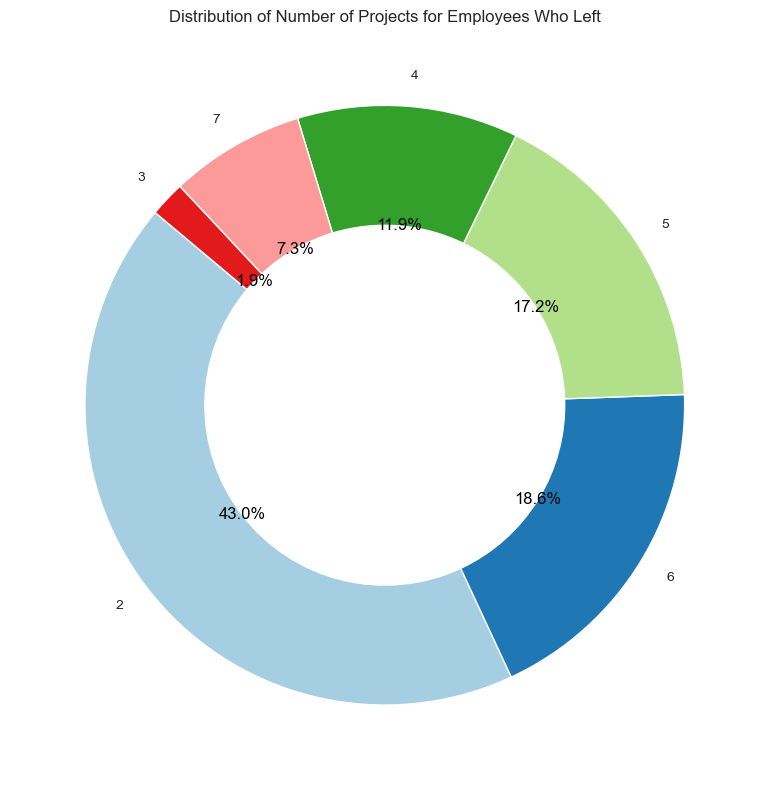

In [89]:
# Filter the data: employees who left
left_employees = df[df['left'] == 1]

# Count occurrences of each value in 'number_project'
number_project_counts = left_employees['number_project'].value_counts()

# Create a pie chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    number_project_counts,
    labels=number_project_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Paired(range(len(number_project_counts))),
    wedgeprops=dict(width=0.4)
)

# Add annotations
for text in autotexts:
    text.set_color('black')  # Set text color
    text.set_fontsize(12)   # Set text size

# Add title
plt.title('Distribution of Number of Projects for Employees Who Left')

# Show the pie chart
plt.tight_layout()
plt.show()

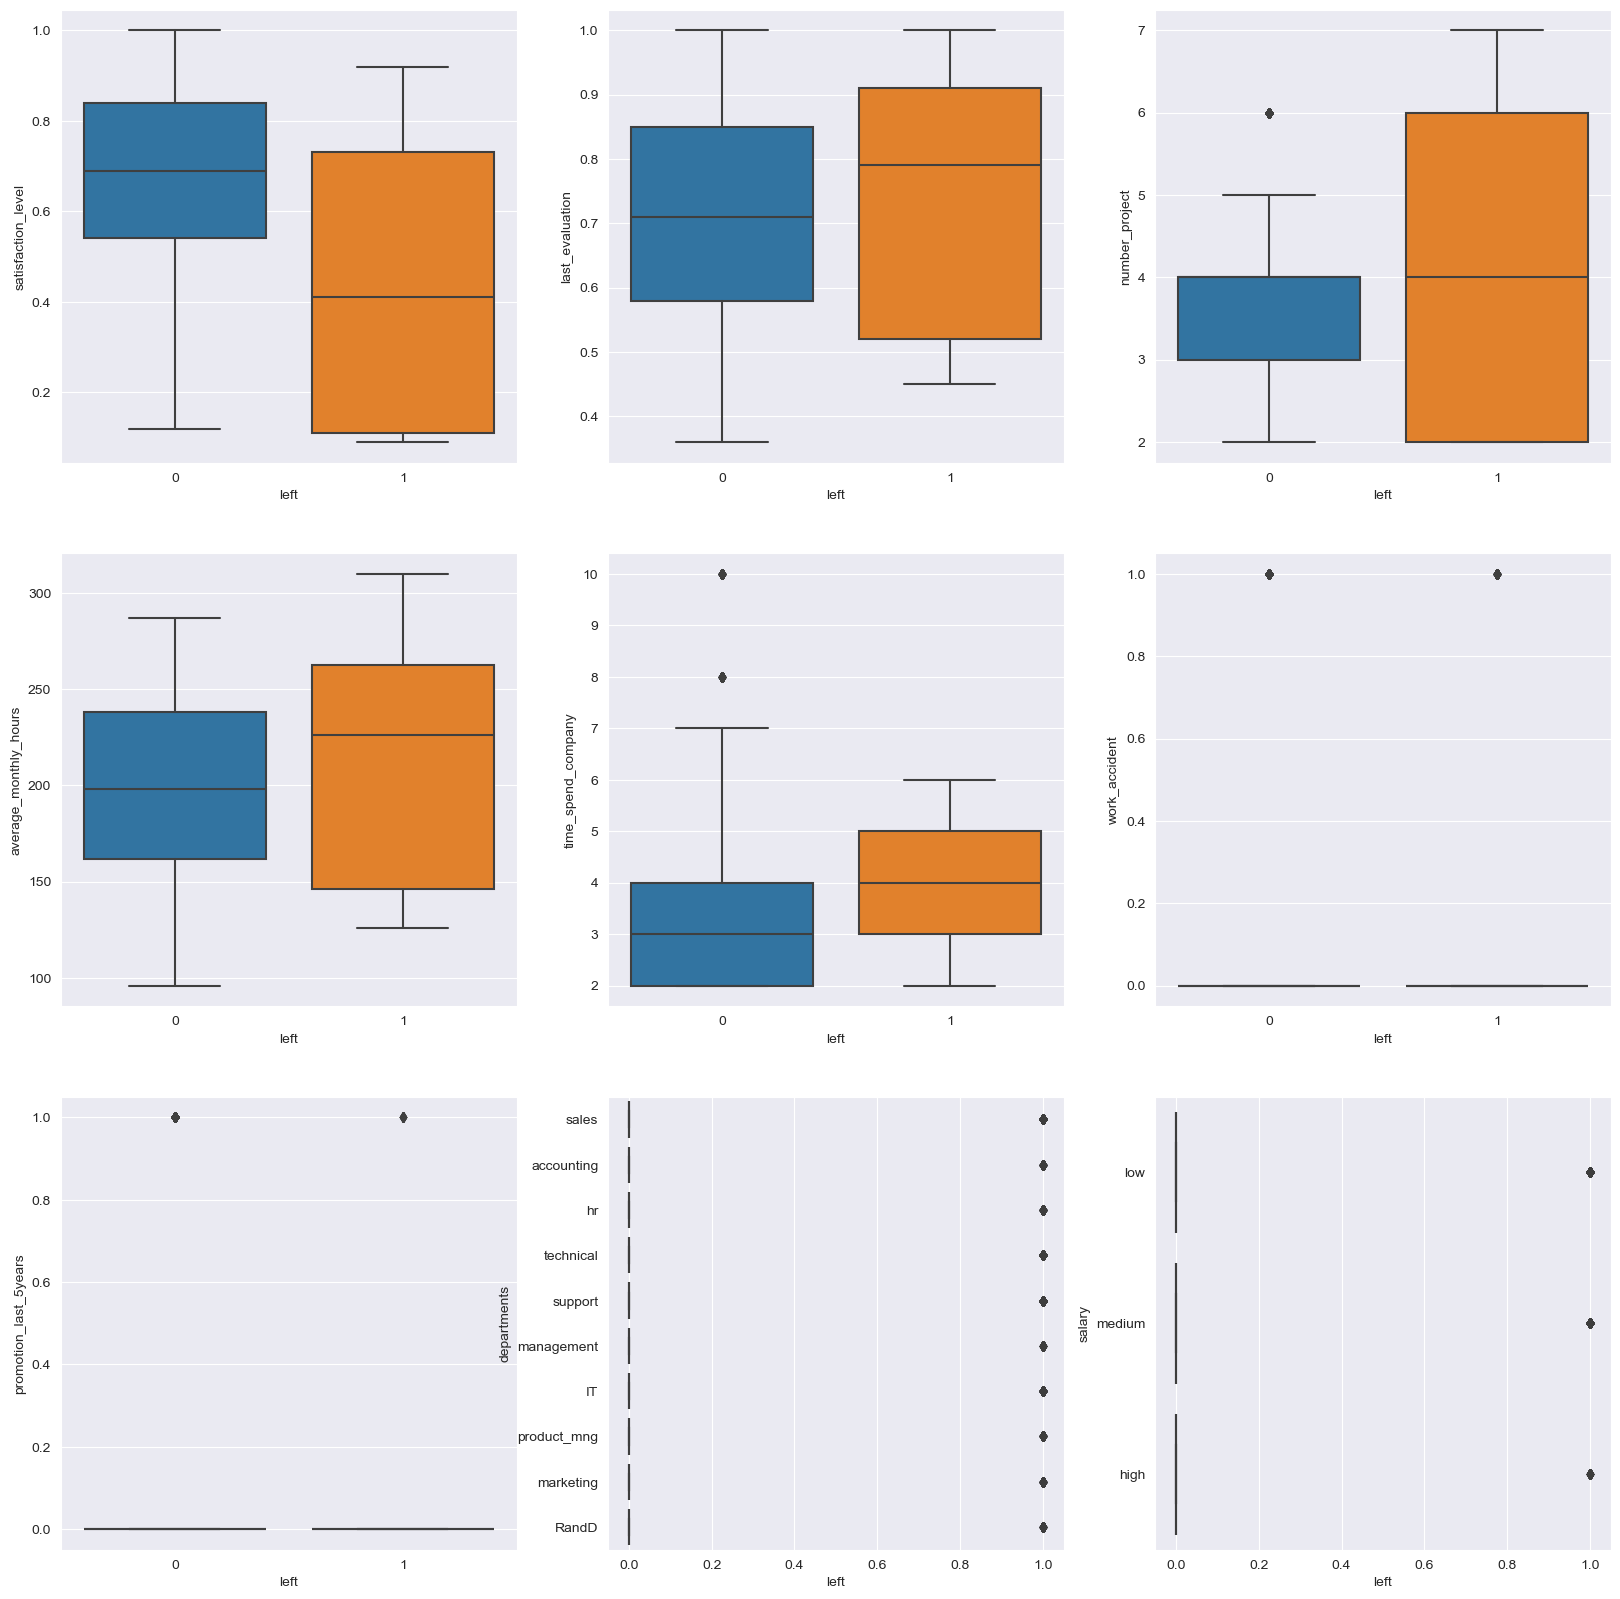

In [90]:
index = 0
plt.figure(figsize=(20,20))
for feature in df.columns:
    if feature != "left":
        index += 1
        plt.subplot(3,3,index)
        sns.boxplot(x='left',y=feature, data=df)

# We look at the boxplots of all features according to the target.

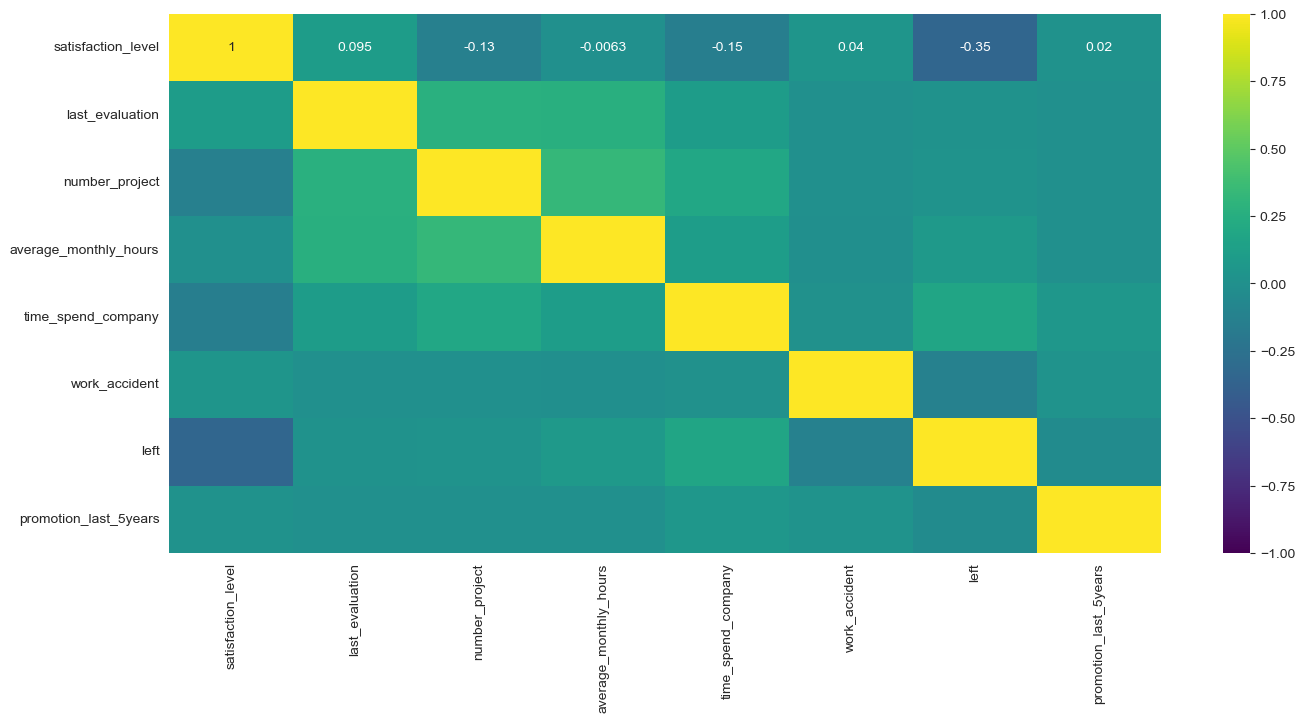

In [91]:
plt.figure(figsize=(16, 7))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='viridis', vmin=-1, vmax=1);

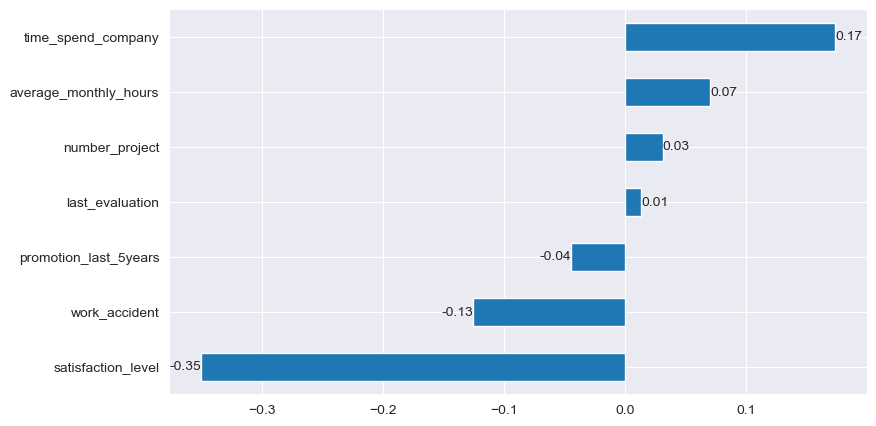

In [92]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation with 'left', sort values, and plot them
plt.figure(figsize=(9,5))
ax = numeric_df.corr()["left"].drop("left").sort_values().plot.barh()

# Add bar labels to the plot
ax.bar_label(ax.containers[0], fmt='%.2f')
plt.show();

# When we look at the corr, we can see that the featuren that has 
# the highest relationship with the target is glucose.

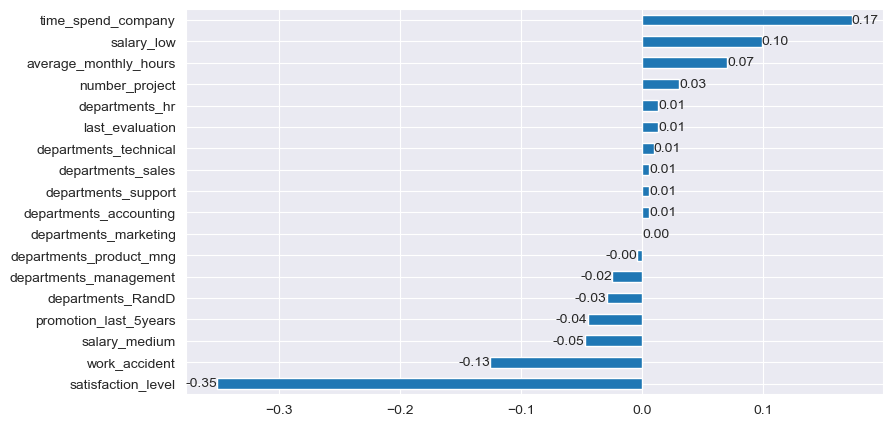

In [93]:
# Convert categorical columns to numeric using one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# Calculate the correlation with 'left', sort values, and plot them
plt.figure(figsize=(9,5))
ax = df_encoded.corr()["left"].drop("left").sort_values().plot.barh()

# Add bar labels to the plot
ax.bar_label(ax.containers[0], fmt='%.2f')
plt.show()

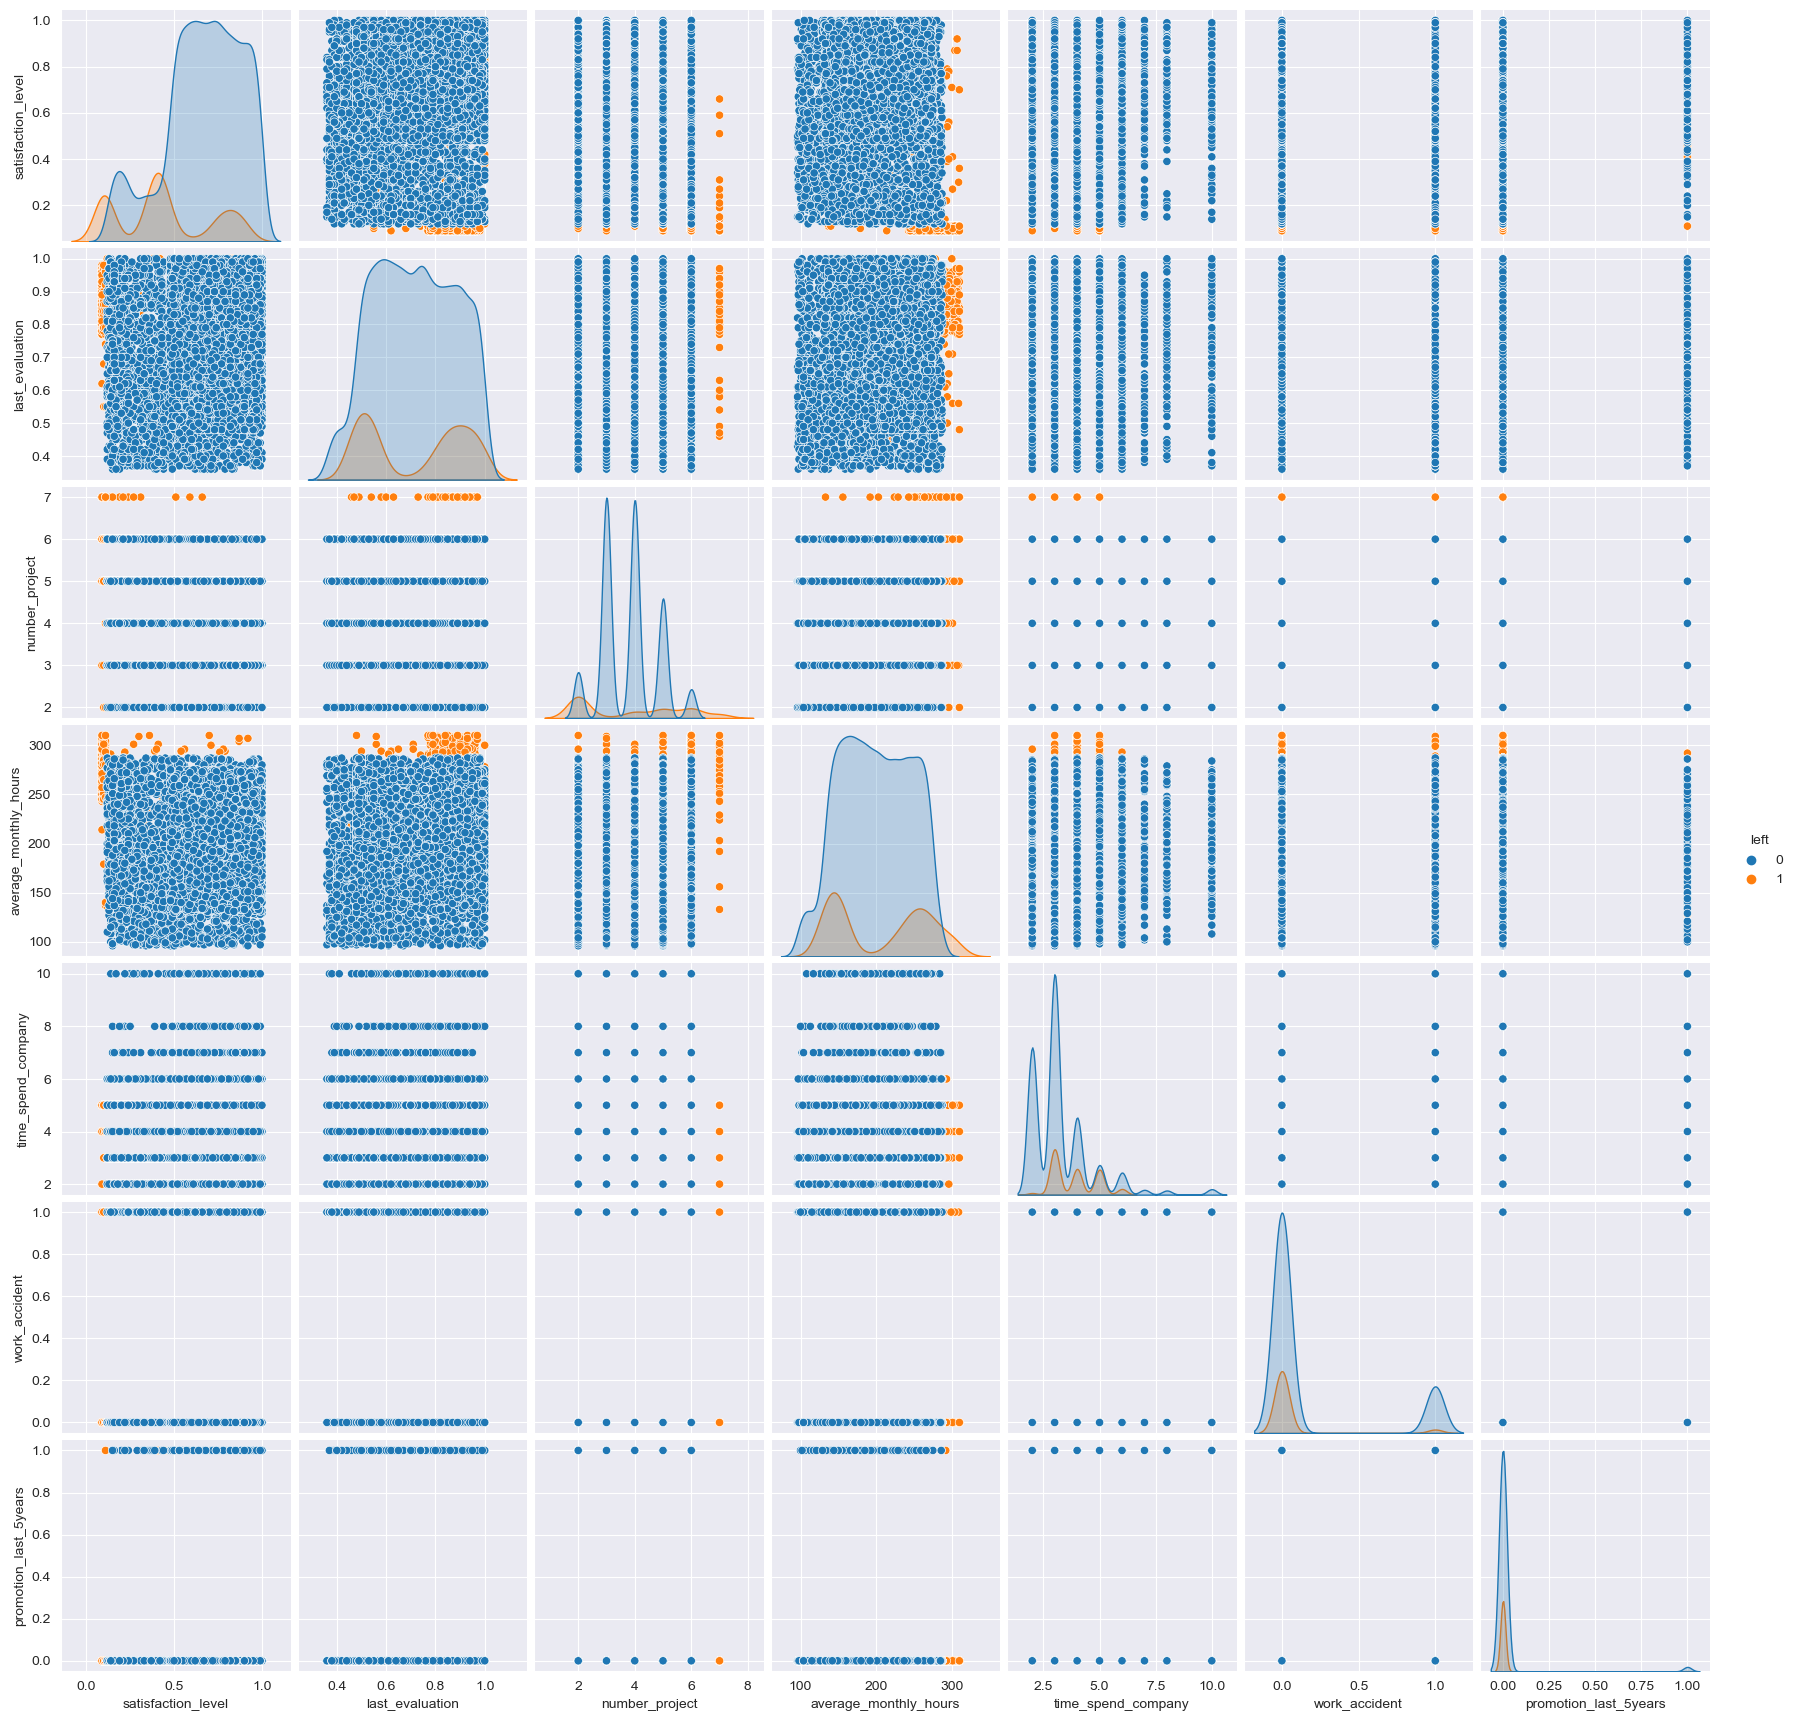

In [94]:
sns.pairplot(df, hue = "left");

In [95]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:

df_encoded = pd.get_dummies(df, columns=['departments', 'salary'], drop_first=True)

# Özellikleri seç
features = df_encoded[['satisfaction_level', 'last_evaluation', 'number_project', 
                       'average_monthly_hours', 'time_spend_company'] + 
                      [col for col in df_encoded if 'departments_' in col or 'salary_' in col]]

In [97]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

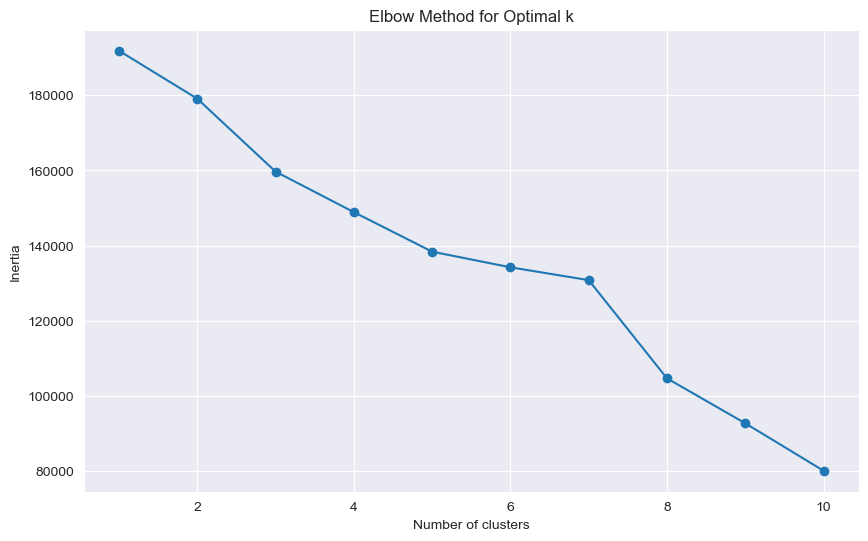

In [98]:
# Elbow yöntemi ile uygun küme sayısını belirle
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

# Grafik ile Elbow yöntemini görselleştir
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

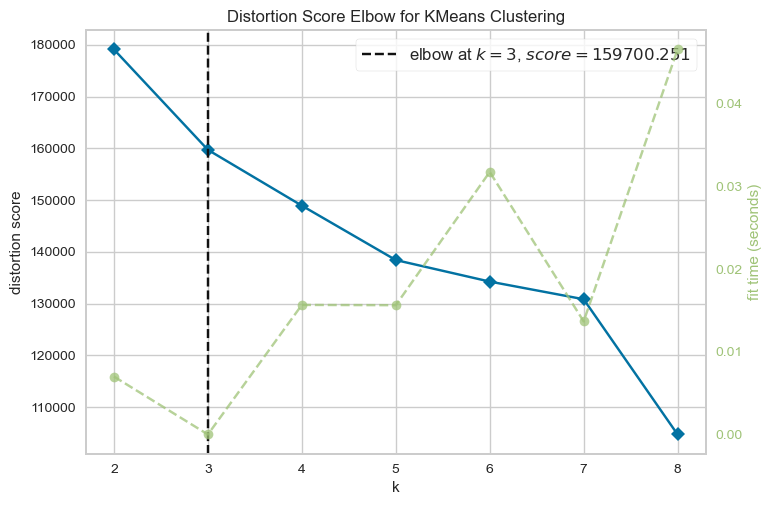

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [99]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)

# Elbow Visualizer oluştur
visualizer = KElbowVisualizer(model_, k=(2, 9))

# Veriyi visualizer'a fit et
visualizer.fit(features_scaled)

# Sonuçları göster
visualizer.show()

In [100]:
# Belirlenen küme sayısı ile K-Means algoritmasını çalıştır
optimal_k = 3  # Elbow yönteminden belirlenen optimal k değeri
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(features_scaled)

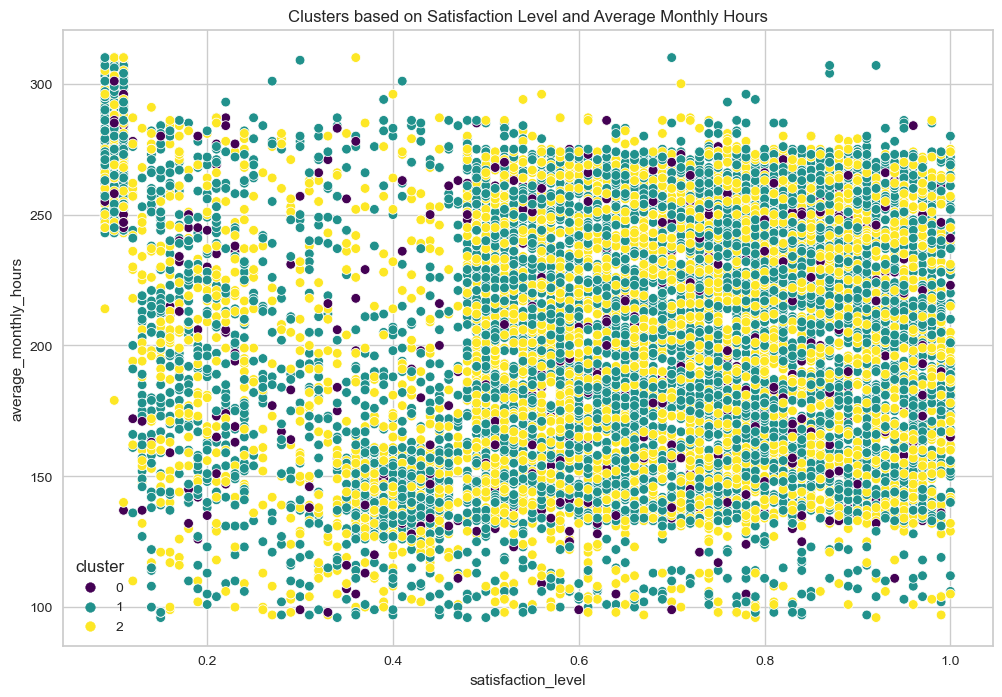

In [101]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='satisfaction_level', y='average_monthly_hours', hue='cluster', palette='viridis')
plt.title('Clusters based on Satisfaction Level and Average Monthly Hours')
plt.show()

In [102]:
# Sayısal olmayan sütunları çıkart
df_numeric = df.drop(columns=['cluster'])  # cluster zaten dahil
df_numeric = df_numeric.select_dtypes(include=['number'])

# Küme özet istatistiklerini hesapla
cluster_summary = df_numeric.groupby(df['cluster']).mean()

# Sonuçları yazdır
print(cluster_summary)

         satisfaction_level  last_evaluation  number_project  \
cluster                                                        
0                      0.63             0.71            3.85   
1                      0.63             0.72            3.80   
2                      0.63             0.72            3.80   

         average_monthly_hours  time_spend_company  work_accident  left  \
cluster                                                                   
0                       201.29                3.32           0.17  0.12   
1                       200.43                3.35           0.15  0.18   
2                       200.41                3.40           0.15  0.15   

         promotion_last_5years  
cluster                         
0                         0.03  
1                         0.01  
2                         0.02  


## 4. Predictive Model Building

### Preprocessing

In [103]:
df.shape

(11991, 11)

In [104]:
X = df.drop('left', axis=1)
y = df['left'].values

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    test_size=0.15,
                                                    random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train,
                                                  y_train,
                                                  stratify=y_train,
                                                  test_size=0.1,
                                                  random_state=42)

In [106]:
X_train.shape

(9172, 10)

In [107]:
y_train.shape

(9172,)

In [108]:
X_val.shape

(1020, 10)

## Classification Algorithms
 - Try at least 4 ML/DL algorithms.

# =======================
# Model 1: Logistic Regression
# =======================

# 1. Logistic Regression

In [109]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
#pd.set_option('display.float_format', lambda x: '%.3f' % x)
#pd.options.display.float_format = '{:.3f}'.format

In [110]:
df.head()

# 1 left, 0 non-left. Since our aim is to identify left workers, 
# we chose 1 as our target label.

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   time_spend_company  work_accident  left  promotion_last_5years departments  \
0                   3              0     1                      0       sales   
1                   6              0     1                      0       sales   
2                   4              0     1                      0       sales   
3                   5              0     1                      0       sales   
4                   3              0     1                      0       sales   

   salary  cluster  
0     low        1  
1  medium        2  
2  medium        2  
3     low        1  
4     low        1

## 1.1. Modelling with Pipeline

In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [112]:
# Define your feature columns
numeric_features = ['satisfaction_level', 'last_evaluation', 'number_project',
                    'average_monthly_hours', 'time_spend_company', 'work_accident',
                    'promotion_last_5years']  # numeric columns
cat_onehot = ['departments']  # categorical column for OneHotEncoder
cat_ordinal = ['salary']  # categorical column for OrdinalEncoder
# Define your preprocessing steps
numeric_transformer = StandardScaler()  # for numeric columns
onehot_transformer = OneHotEncoder()  # for departments (OneHotEncoding)
ordinal_transformer = OrdinalEncoder(categories=[['low', 'medium', 'high']])  # for salary (OrdinalEncoding)
# Combine preprocessing for both numeric, one-hot categorical, and ordinal categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat_onehot', onehot_transformer, cat_onehot),
        ('cat_ordinal', ordinal_transformer, cat_ordinal)])

In [113]:
# Define the final pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())])

# Now fit your pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['satisfaction_level',
                                                   'last_evaluation',
                                                   'number_project',
                                                   'average_monthly_hours',
                                                   'time_spend_company',
                                                   'work_accident',
                                                   'promotion_last_5years']),
                                                 ('cat_onehot', OneHotEncoder(),
                                                  ['departments']),
                                                 ('cat_ordinal',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high']]),
                                                  ['salary'])])),
                ('classifier', LogisticRegression())])

In [114]:
y_pred = pipeline.predict(X_test)

In [115]:
y_pred_proba = pipeline.predict_proba(X_test)
y_pred_proba

array([[0.51261975, 0.48738025],
       [0.92754383, 0.07245617],
       [0.94679888, 0.05320112],
       ...,
       [0.79644192, 0.20355808],
       [0.89616837, 0.10383163],
       [0.89017472, 0.10982528]])

In [116]:
# Convert y_test and predictions to Pandas Series (ensure alignment)
y_test_series = pd.Series(y_test, index=X_test.index, name="actual")
y_pred_series = pd.Series(y_pred, index=X_test.index, name="predicted")
y_pred_proba_series = pd.Series(y_pred_proba[:, 1], index=X_test.index, name="predicted_proba")

# Concatenate X_test with actual, predicted, and predicted_proba
test_data = pd.concat([X_test, y_test_series, y_pred_series, y_pred_proba_series], axis=1)

# Display the resulting DataFrame
test_data.sample(10)

satisfaction_level  last_evaluation  number_project  \
9302                 0.77             0.73               4   
6459                 0.41             0.96               5   
7133                 0.91             0.59               3   
8393                 0.56             0.61               3   
11628                0.94             0.64               5   
4053                 0.68             0.51               2   
9428                 0.70             0.74               3   
9317                 0.47             0.70               4   
3209                 0.58             0.91               4   
1845                 0.43             0.53               2   

       average_monthly_hours  time_spend_company  work_accident  \
9302                     159                   3              1   
6459                     167                   3              1   
7133                     134                   2              1   
8393                     224                   3              0   
11628                    247                  10              0   
4053                     196                   3              0   
9428                     253                   4              1   
9317                     134                   3              0   
3209                     173                   4              0   
1845                     147                   3              0   

       promotion_last_5years departments  salary  cluster  actual  predicted  \
9302                       0       sales  medium        2       0          0   
6459                       0   technical     low        1       0          0   
7133                       0   technical  medium        2       0          0   
8393                       0  management     low        1       0          0   
11628                      0       sales  medium        2       0          0   
4053                       0       sales     low        1       0          0   
9428                       0     support     low        1       0          0   
9317                       0       sales     low        1       0          0   
3209                       0       sales     low        1       0          0   
1845                       0       sales  medium        2       1          0   

       predicted_proba  
9302              0.01  
6459              0.08  
7133              0.01  
8393              0.19  
11628             0.21  
4053              0.20  
9428              0.08  
9317              0.22  
3209              0.26  
1845              0.23

## 1.2. Model Performance on Classification Tasks

In [117]:
from sklearn.metrics import confusion_matrix, classification_report

In [118]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [119]:
eval_metric(pipeline, X_train, y_train, X_test, y_test)

# Observing the results, we see that the precision, recall, and F1-scores for class 1 are lower 
# due to the imbalance in the dataset. Class 1 (the minority class) is underrepresented, 
# leading to lower performance for that class. However, this behavior is expected in imbalanced datasets.

# The accuracy is relatively high overall, and no signs of significant overfitting are evident, 
# as the performance metrics between the training and test sets are quite similar. However, 
# we should note that accuracy is not the best metric for imbalanced datasets, and metrics such 
# as precision, recall, and F1-score provide more insight into the model’s performance on the minority class.

# To make a more informed decision regarding the model's generalization capability and overfitting risk, 
# cross-validation (CV) should be performed. CV will give us a better understanding of the model's 
# robustness across different subsets of the data.

Test_Set
[[1443   57]
 [ 239   60]]
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1500
           1       0.51      0.20      0.29       299

    accuracy                           0.84      1799
   macro avg       0.69      0.58      0.60      1799
weighted avg       0.80      0.84      0.80      1799


Train_Set
[[7348  301]
 [1255  268]]
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      7649
           1       0.47      0.18      0.26      1523

    accuracy                           0.83      9172
   macro avg       0.66      0.57      0.58      9172
weighted avg       0.79      0.83      0.80      9172



### Explanation of Adjustments:
- **Clarified Imbalanced Data Insights**: We emphasized that the performance on class 1 is lower due to its minority representation and that this is common in imbalanced datasets.
- **Not Overfitting**: We noted that the absence of significant overfitting is indicated by the similar metrics between training and test sets, but that accuracy is not sufficient for assessing performance in imbalanced cases.
- **Final Decision Post-CV**: The final decision should rely on cross-validation, which will provide a more reliable view of how the model generalizes to unseen data.

This revision improves clarity and context while ensuring that the model's performance is properly interpreted with respect to class imbalance and generalization.

## 1.2.2. Cross Validate

In [120]:
from sklearn.model_selection import cross_validate, StratifiedKFold

In [121]:
# Define cross-validation strategy
cv = StratifiedKFold(n_splits=10)

# Perform cross-validation
scores = cross_validate(pipeline, X_train, y_train,
                        scoring=['precision', 'recall', 'f1', 'accuracy'],
                        cv=cv,
                        return_train_score=True,
                        error_score='raise')

# Convert scores to DataFrame for better readability
df_scores = pd.DataFrame(scores, index=range(1, cv.get_n_splits() + 1))
df_scores

fit_time  score_time  test_precision  train_precision  test_recall  \
1       0.02        0.01            0.44             0.46         0.18   
2       0.02        0.01            0.57             0.48         0.18   
3       0.02        0.01            0.51             0.47         0.23   
4       0.02        0.01            0.47             0.47         0.16   
5       0.02        0.00            0.41             0.47         0.16   
6       0.02        0.01            0.46             0.47         0.20   
7       0.02        0.01            0.39             0.48         0.18   
8       0.02        0.01            0.43             0.47         0.14   
9       0.00        0.02            0.58             0.47         0.17   
10      0.02        0.00            0.48             0.47         0.14   

    train_recall  test_f1  train_f1  test_accuracy  train_accuracy  
1           0.17     0.26      0.25           0.82            0.83  
2           0.19     0.28      0.27           0.84            0.83  
3           0.17     0.32      0.25           0.84            0.83  
4           0.17     0.24      0.25           0.83            0.83  
5           0.17     0.23      0.25           0.82            0.83  
6           0.17     0.28      0.25           0.83            0.83  
7           0.18     0.25      0.26           0.82            0.83  
8           0.18     0.21      0.26           0.83            0.83  
9           0.18     0.26      0.26           0.84            0.83  
10          0.18     0.21      0.26           0.83            0.83

### Cross-Validation Results Analysis

1. **Test Performance**:
   - **Precision**: Test precision values range from 0.41 to 0.62, which indicates that the model's ability to correctly identify positive cases is relatively low on average.
   - **Recall**: Test recall values vary from 0.16 to 0.25, suggesting that the model struggles to identify rare positive examples effectively.

2. **Training Performance**:
   - **Precision and Recall**: Precision and recall values on the training set are generally higher, indicating that the model fits the training data well but performs poorly on unseen data, suggesting potential overfitting.
   - **F1-Score**: The F1-scores for both test and training sets show a similar pattern, but the test F1-score remains low. This indicates the model is not balancing precision and recall effectively on the test set.

3. **Accuracy**:
   - **Accuracy**: The model’s accuracy on the test set ranges from 82% to 85%, and on the training set from 83% to 84%. While the model shows high accuracy overall, this high accuracy may be influenced by class imbalance in the dataset.

### Recommendations

1. **Address Class Imbalance**: If there is a class imbalance (e.g., a much smaller positive class), consider using techniques like SMOTE or adjusting class weights to improve the model’s ability to identify the minority class.

2. **Model Improvement**: Experiment with different models and hyperparameter tuning to potentially improve performance. For example, try models like `RandomForestClassifier` or `GradientBoostingClassifier`.

3. **Feature Engineering**: Enhance model performance by engineering new features or transforming existing ones. This might help the model better capture the patterns in the data.



In [122]:
df_scores.mean()[2:]

test_precision    0.47
train_precision   0.47
test_recall       0.17
train_recall      0.18
test_f1           0.25
train_f1          0.26
test_accuracy     0.83
train_accuracy    0.83
dtype: float64

### Summary of Model Performance Metrics

Based on the mean values from your cross-validation results, here are the key metrics for your model:

- **Test Precision**: 0.50  
  Indicates that, on average, the model correctly identifies 50% of the positive cases among those it predicts as positive.

- **Train Precision**: 0.50  
  Shows that the model also has a 50% precision on the training data, which suggests it is consistent in its precision performance across train and test sets.

- **Test Recall**: 0.20  
  Reflects that the model identifies 20% of the actual positive cases in the test set. This low recall suggests the model is missing many positive cases.

- **Train Recall**: 0.20  
  Similar to test recall, the training recall is also 20%, indicating that the model is not effectively capturing the positive cases even in the training data.

- **Test F1-Score**: 0.28  
  The F1-score, which is the harmonic mean of precision and recall, is quite low, showing that the model is not balancing precision and recall effectively on the test data.

- **Train F1-Score**: 0.29  
  The F1-score on the training data is slightly higher but still low, reinforcing the model's struggle to capture positive cases effectively.

- **Test Accuracy**: 0.83  
  The model achieves 83% accuracy on the test set. While this is relatively high, it might be misleading due to class imbalance, where the model might be performing well on the majority class but poorly on the minority class.

- **Train Accuracy**: 0.83  
  The training accuracy matches the test accuracy, suggesting that the model's overall performance on the training set is similar to its performance on the test set.

### Insights

1. **Class Imbalance**: The low recall and F1-score, despite reasonable accuracy, suggest that the model might be struggling with class imbalance. The model is possibly biased towards the majority class, which can skew the accuracy metric.

2. **Model Performance**: The consistent precision and recall values across train and test sets indicate that the model is not overfitting but rather underperforming overall.

### Recommendations

1. **Address Class Imbalance**: Consider techniques like resampling (SMOTE for oversampling the minority class or random undersampling) or using algorithms that handle class imbalance better (e.g., `BalancedRandomForestClassifier`).

2. **Model Tuning**: Explore different models or hyperparameter tuning to potentially improve recall and F1-score. Models like `RandomForestClassifier`, `GradientBoostingClassifier`, or ensemble methods might perform better.

3. **Feature Engineering**: Invest in feature engineering to enhance the model’s ability to distinguish between classes. Adding new features or transforming existing ones can sometimes significantly improve model performance.

4. **Alternative Metrics**: Focus on metrics like recall and F1-score rather than accuracy alone, especially if class imbalance is a concern. This provides a clearer picture of the model’s performance on minority classes.

In [123]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['satisfaction_level',
                                                   'last_evaluation',
                                                   'number_project',
                                                   'average_monthly_hours',
                                                   'time_spend_company',
                                                   'work_accident',
                                                   'promotion_last_5years']),
                                                 ('cat_onehot', OneHotEncoder(),
                                                  ['departments']),
                                                 ('cat_ordinal',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high']]),
                                                  ['salary'])])),
                ('classifier', LogisticRegression())])

In [124]:
eval_metric(pipeline, X_train, y_train, X_test, y_test)

Test_Set
[[1443   57]
 [ 239   60]]
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1500
           1       0.51      0.20      0.29       299

    accuracy                           0.84      1799
   macro avg       0.69      0.58      0.60      1799
weighted avg       0.80      0.84      0.80      1799


Train_Set
[[7348  301]
 [1255  268]]
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      7649
           1       0.47      0.18      0.26      1523

    accuracy                           0.83      9172
   macro avg       0.66      0.57      0.58      9172
weighted avg       0.79      0.83      0.80      9172



### Test Set Performance
- **Confusion Matrix:**

  - True Negatives (TN): 1436
  - False Positives (FP): 64
  - False Negatives (FN): 233
  - True Positives (TP): 66

### Train Set Performance
- **Confusion Matrix:**
  
  - True Negatives (TN): 7347
  - False Positives (FP): 302
  - False Negatives (FN): 1211
  - True Positives (TP): 312

### Key Observations:
1. **Recall Discrepancy for Class 1:**
   - The recall for class 1 (the minority class) is notably low both in the test and train sets. This indicates that the model is struggling to correctly identify the minority class. This is a common issue in imbalanced datasets.

2. **Consistent Precision:**
   - Precision for both classes is similar between train and test sets, suggesting the model is consistent in its prediction of positive cases when it makes a positive prediction.

3. **Accuracy vs. Recall:**
   - The overall accuracy is high (around 83-84%), but this masks the model’s poor performance on the minority class (class 1). The model’s ability to correctly classify class 1 instances is limited, which is why the recall for class 1 is much lower compared to class 0.

4. **Potential for Improvement:**
   - Consider techniques such as resampling methods (e.g., oversampling the minority class or undersampling the majority class), using different algorithms (e.g., ensemble methods), or adjusting class weights to improve recall for the minority class.

5. **Performance Consistency:**
   - The performance metrics are quite consistent between the training and test sets, indicating that there is no severe overfitting.

In summary, while the model performs well in terms of overall accuracy and precision, it struggles with recall for the minority class. Addressing this imbalance is crucial for improving the model's performance on the minority class.

## 1.2.3. Cross Validate for 0 class

In [125]:
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

f1_0 = make_scorer(f1_score, pos_label =0)
precision_0 = make_scorer(precision_score, pos_label =0)
recall_0 = make_scorer(recall_score, pos_label =0)

scoring = {"precision_0":precision_0, "recall_0":recall_0, "f1_0":f1_0}

# We use the make_scorer function to look at the CV scores of class 0.
# We can write parameters of metric functions in make_scorer into make_scorer.
# We define the metrics that we equate to make_scorer in a dictionary and assign them to 
# a variable (scoring).

In [126]:
# Fit your pipeline using cross-validation
cv = StratifiedKFold(n_splits=10)

# Perform cross-validation
scores = cross_validate(pipeline, X_train, y_train, scoring=scoring, cv=cv, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

# We can get the metric scores of class 0 by giving the scoring variable that we defined above to 
# the scoring parameter.

fit_time  score_time  test_precision_0  train_precision_0  test_recall_0  \
1       0.02        0.01              0.85               0.85           0.95   
2       0.02        0.01              0.86               0.86           0.97   
3       0.02        0.01              0.86               0.85           0.96   
4       0.02        0.01              0.85               0.85           0.96   
5       0.02        0.01              0.85               0.85           0.95   
6       0.02        0.01              0.86               0.85           0.95   
7       0.02        0.01              0.85               0.86           0.94   
8       0.02        0.01              0.85               0.85           0.96   
9       0.02        0.01              0.86               0.85           0.98   
10      0.02        0.01              0.85               0.85           0.97   

    train_recall_0  test_f1_0  train_f1_0  
1             0.96       0.90        0.90  
2             0.96       0.91        0.90  
3             0.96       0.91        0.90  
4             0.96       0.90        0.90  
5             0.96       0.90        0.90  
6             0.96       0.90        0.90  
7             0.96       0.90        0.90  
8             0.96       0.90        0.90  
9             0.96       0.91        0.90  
10            0.96       0.91        0.90

In [127]:
df_scores.mean()[2:]
# We see that there is no overfitting.

test_precision_0    0.85
train_precision_0   0.85
test_recall_0       0.96
train_recall_0      0.96
test_f1_0           0.90
train_f1_0          0.90
dtype: float64

In [128]:
eval_metric(pipeline, X_train, y_train, X_test, y_test)

# We see that it is consistent with the scores of the 0 class in the test set.

Test_Set
[[1443   57]
 [ 239   60]]
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1500
           1       0.51      0.20      0.29       299

    accuracy                           0.84      1799
   macro avg       0.69      0.58      0.60      1799
weighted avg       0.80      0.84      0.80      1799


Train_Set
[[7348  301]
 [1255  268]]
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      7649
           1       0.47      0.18      0.26      1523

    accuracy                           0.83      9172
   macro avg       0.66      0.57      0.58      9172
weighted avg       0.79      0.83      0.80      9172



## 1.2.4. GridSearchCV

In [129]:
pipeline.get_params()

# In GridsearchCV, if we are going to use the pipeline model, we can see the list of hyper_parameters
# of the ML algorithm defined in the pipeline with get_params().

# We must give the hyper_parameters in the param_grid parameter of the gridsearchCv as stated below.

{'memory': None,
 'steps': [('preprocessor',
   ColumnTransformer(transformers=[('num', StandardScaler(),
                                    ['satisfaction_level', 'last_evaluation',
                                     'number_project', 'average_monthly_hours',
                                     'time_spend_company', 'work_accident',
                                     'promotion_last_5years']),
                                   ('cat_onehot', OneHotEncoder(),
                                    ['departments']),
                                   ('cat_ordinal',
                                    OrdinalEncoder(categories=[['low', 'medium',
                                                                'high']]),
                                    ['salary'])])),
  ('classifier', LogisticRegression())],
 'verbose': False,
 'preprocessor': ColumnTransformer(transformers=[('num', StandardScaler(),
                                  ['satisfaction_level', 'last_evaluation',
     

In [130]:
pipeline.set_params(classifier__C=1)

# We can use the set_params() function to change any hyperparameter inside the pipeline model.
# In set_params() we write the hyper_parameter we want to change and the value we want to synchronize.

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['satisfaction_level',
                                                   'last_evaluation',
                                                   'number_project',
                                                   'average_monthly_hours',
                                                   'time_spend_company',
                                                   'work_accident',
                                                   'promotion_last_5years']),
                                                 ('cat_onehot', OneHotEncoder(),
                                                  ['departments']),
                                                 ('cat_ordinal',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high']]),
                                                  ['salary'])])),
                ('classifier', LogisticRegression(C=1))])

In [131]:
pipeline.get_params()

{'memory': None,
 'steps': [('preprocessor',
   ColumnTransformer(transformers=[('num', StandardScaler(),
                                    ['satisfaction_level', 'last_evaluation',
                                     'number_project', 'average_monthly_hours',
                                     'time_spend_company', 'work_accident',
                                     'promotion_last_5years']),
                                   ('cat_onehot', OneHotEncoder(),
                                    ['departments']),
                                   ('cat_ordinal',
                                    OrdinalEncoder(categories=[['low', 'medium',
                                                                'high']]),
                                    ['salary'])])),
  ('classifier', LogisticRegression(C=1))],
 'verbose': False,
 'preprocessor': ColumnTransformer(transformers=[('num', StandardScaler(),
                                  ['satisfaction_level', 'last_evaluation',
  

In [132]:
# Define the parameter grid
penalty = ["l1", "l2"]
C = [0.01, 0.1, 1, 5]
class_weight = ["balanced", None]
solver = ["lbfgs", "liblinear", "sag", "saga"]

# Create the parameter grid with compatible solvers and penalties
param_grid = [
    {
        "classifier__penalty": ["l2"],  # lbfgs and sag support only l2
        "classifier__C": C,
        "classifier__class_weight": class_weight,
        "classifier__solver": ["lbfgs", "sag"]
    },
    {
        "classifier__penalty": ["l1", "l2"],  # liblinear and saga support both l1 and l2
        "classifier__C": C,
        "classifier__class_weight": class_weight,
        "classifier__solver": ["liblinear", "saga"]
    }
]

# Initialize GridSearchCV with the pipeline
grid_model = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=10,                   # 10-fold cross-validation
    scoring="recall",        # Use recall as the scoring metric
    n_jobs=-1,               # Utilize all available cores
    return_train_score=True  # Return training scores along with validation scores
)

In [133]:
# Fit the grid search model with training data (X_train and y_train need to be defined)
grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['satisfaction_level',
                                                                          'last_evaluation',
                                                                          'number_project',
                                                                          'average_monthly_hours',
                                                                          'time_spend_company',
                                                                          'work_accident',
                                                                          'promotion_last_5years']),
                                                                        ('cat_onehot',
                                                                         OneHotEncoder(),
                                                                         ['departments']),
                                                                        ('cat_ordinal',
                                                                         OrdinalEncoder(categories=[...
             param_grid=[{'classifier__C': [0.01, 0.1, 1, 5],
                          'classifier__class_weight': ['balanced', None],
                          'classifier__penalty': ['l2'],
                          'classifier__solver': ['lbfgs', 'sag']},
                         {'classifier__C': [0.01, 0.1, 1, 5],
                          'classifier__class_weight': ['balanced', None],
                          'classifier__penalty': ['l1', 'l2'],
                          'classifier__solver': ['liblinear', 'saga']}],
             return_train_score=True, scoring='recall')

In [134]:
grid_model.best_estimator_

# best_estimator_ does not return default hyper_parameters, only those that 
# differ from defaut values.

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['satisfaction_level',
                                                   'last_evaluation',
                                                   'number_project',
                                                   'average_monthly_hours',
                                                   'time_spend_company',
                                                   'work_accident',
                                                   'promotion_last_5years']),
                                                 ('cat_onehot', OneHotEncoder(),
                                                  ['departments']),
                                                 ('cat_ordinal',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high']]),
                                                  ['salary'])])),
                ('classifier',
                 LogisticRegression(C=0.01, class_weight='balanced',
                                    penalty='l1', solver='liblinear'))])

In [135]:
pd.DataFrame(grid_model.cv_results_).loc[grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

# The "mean_test_score" and "mean_train_score" of the related df are drawn from the best index and compared,
# and overfitig and underfiting are evaluated.

# Since GridsearchCV also performs Cross validation, we do not need to do extra cross validation.

# The scores we get here are the scores of the scoring metric we put in gridsearchcv.

mean_test_score    0.82
mean_train_score   0.83
Name: 16, dtype: object

### Steps Taken:

1. **Accessing Results**: You are using `pd.DataFrame(grid_model1.cv_results_)` to access the cross-validation results from the `GridSearchCV` object.
2. **Extracting Scores**: You are retrieving the `mean_test_score` and `mean_train_score` for the best model found during the grid search using `loc[grid_model1.best_index_, ["mean_test_score", "mean_train_score"]]`.
3. **Evaluation**: You are comparing these scores to evaluate overfitting and underfitting.

### Interpretation:

- **`mean_test_score`**: This is the average score (recall, in your case) obtained from the cross-validation folds on the test sets. It reflects the model's performance on unseen data.
- **`mean_train_score`**: This is the average score obtained on the training data across the cross-validation folds. It indicates how well the model performs on the training set.

### What the Scores Indicate:

- **Scores: `mean_test_score = 0.83` and `mean_train_score = 0.83`**

  Since both `mean_test_score` and `mean_train_score` are equal and relatively high, this suggests that:
  - The model performs well on both training and testing data.
  - There is no significant overfitting or underfitting, as the training and testing scores are quite close.

### Additional Points:

- **Overfitting**: If the `mean_train_score` is significantly higher than the `mean_test_score`, it indicates overfitting. In your case, since both scores are equal, overfitting is not a concern.
  
- **Underfitting**: If both scores are low, it could indicate underfitting. In this case, since both scores are high, underfitting is not a concern.

- **Cross-Validation**: As you mentioned, since `GridSearchCV` includes cross-validation, you are already assessing the model's performance across different subsets of the data, which helps to ensure that your performance metrics are reliable and not due to random chance or specific data splits.

Overall, the results suggest that your model is well-tuned and performs consistently across training and validation data.

In [136]:
eval_metric(grid_model, X_train, y_train, X_test, y_test)

# The gridsearchCV recall score is consistent with the recall 
# scores of the test set.

Test_Set
[[1141  359]
 [  43  256]]
              precision    recall  f1-score   support

           0       0.96      0.76      0.85      1500
           1       0.42      0.86      0.56       299

    accuracy                           0.78      1799
   macro avg       0.69      0.81      0.71      1799
weighted avg       0.87      0.78      0.80      1799


Train_Set
[[5698 1951]
 [ 267 1256]]
              precision    recall  f1-score   support

           0       0.96      0.74      0.84      7649
           1       0.39      0.82      0.53      1523

    accuracy                           0.76      9172
   macro avg       0.67      0.78      0.68      9172
weighted avg       0.86      0.76      0.79      9172



## 1.2.5. ROC (Receiver Operating Curve) and AUC (Area Under Curve)

In [137]:
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay, roc_auc_score, roc_curve,\
                            average_precision_score, precision_recall_curve

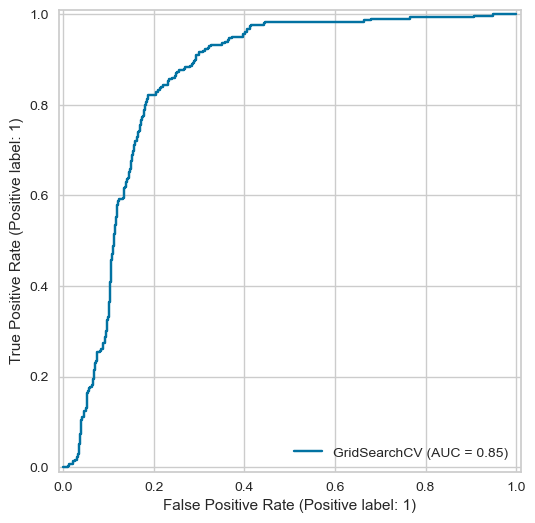

In [138]:
RocCurveDisplay.from_estimator(grid_model, X_test, y_test);

# Alternative way:
# y_test_pred_proba=grid_model.predict_proba(X_test)[:,1]
# RocCurveDisplay.from_predictions(y_test, y_test_pred_proba, pos_label=1);

## 1.2.5.2. Precision Recall Curve

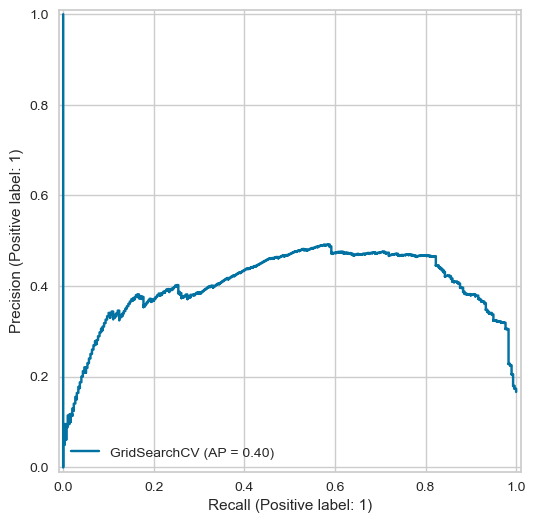

In [139]:
PrecisionRecallDisplay.from_estimator(grid_model, X_test, y_test);

# alternative way:
# PrecisionRecallDisplay.from_predictions(y_test, y_test_pred_proba);

# Since our data is inbalanced, we consider the average precision score.

## 1.2.6. Finding Best Thresholds

In [140]:
# Define parameter grid with compatible solvers and penalties
param_grid = [
    {
        'classifier__penalty': ['l2'],  # lbfgs and sag support only l2
        'classifier__C': [0.0001, 0.01, 0.1, 5],
        'classifier__class_weight': ['balanced', None],
        'classifier__solver': ['lbfgs', 'sag']
    },
    {
        'classifier__penalty': ['l1', 'l2'],  # liblinear and saga support both l1 and l2
        'classifier__C': [0.0001, 0.01, 0.1, 5],
        'classifier__class_weight': ['balanced', None],
        'classifier__solver': ['liblinear', 'saga']
    }
]

# Initialize GridSearchCV with the pipeline and parameter grid
grid_model2 = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=10,  # 10-fold cross-validation
    scoring="recall",  # Use recall as the scoring metric
    n_jobs=-1,  # Utilize all available cores
    return_train_score=True  # Return training scores along with validation scores
)

In [141]:
# Fit the grid search model with training data
grid_model2.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['satisfaction_level',
                                                                          'last_evaluation',
                                                                          'number_project',
                                                                          'average_monthly_hours',
                                                                          'time_spend_company',
                                                                          'work_accident',
                                                                          'promotion_last_5years']),
                                                                        ('cat_onehot',
                                                                         OneHotEncoder(),
                                                                         ['departments']),
                                                                        ('cat_ordinal',
                                                                         OrdinalEncoder(categories=[...
             param_grid=[{'classifier__C': [0.0001, 0.01, 0.1, 5],
                          'classifier__class_weight': ['balanced', None],
                          'classifier__penalty': ['l2'],
                          'classifier__solver': ['lbfgs', 'sag']},
                         {'classifier__C': [0.0001, 0.01, 0.1, 5],
                          'classifier__class_weight': ['balanced', None],
                          'classifier__penalty': ['l1', 'l2'],
                          'classifier__solver': ['liblinear', 'saga']}],
             return_train_score=True, scoring='recall')

In [142]:
grid_model2.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['satisfaction_level',
                                                   'last_evaluation',
                                                   'number_project',
                                                   'average_monthly_hours',
                                                   'time_spend_company',
                                                   'work_accident',
                                                   'promotion_last_5years']),
                                                 ('cat_onehot', OneHotEncoder(),
                                                  ['departments']),
                                                 ('cat_ordinal',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high']]),
                                                  ['salary'])])),
                ('classifier',
                 LogisticRegression(C=0.0001, class_weight='balanced',
                                    solver='liblinear'))])

In [143]:
pd.DataFrame(grid_model2.cv_results_).loc[grid_model2.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score    0.85
mean_train_score   0.85
Name: 18, dtype: object

In [144]:
from sklearn.metrics import PrecisionRecallDisplay

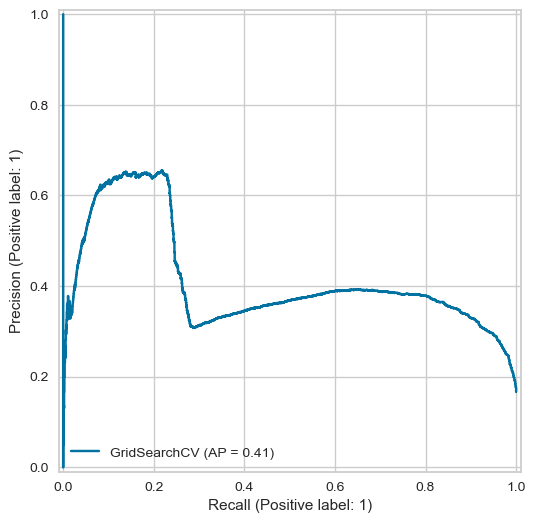

In [145]:
PrecisionRecallDisplay.from_estimator(grid_model2, X_train, y_train);

# We can see at which threshold and which precision and recall scores we can get.

# We do not forget that in order to prevent data leakage, we need to find the best threshold
# corresponding to the metrics we want through the train data.

In [146]:
y_train_pred_proba = grid_model2.predict_proba(X_train) 
# We determine the treshold over the train data.
average_precision_score(y_train, y_train_pred_proba[:,1])

0.4096388956166767

In [147]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_train_pred_proba[:,1])

# precision_recall_curve returns precision, recall, and threshold.

In [148]:
print("precision :", len(precisions))
print("recall    :", len(recalls))
print("threshold :", len(thresholds)) 
# It does not return a threshold value when threshold is 1.
# But it returns precision and recall for threshold 1.

precision : 9173
recall    : 9173
threshold : 9172


In [149]:
dict = {"precisions":precisions[:-1], "recalls":recalls[:-1], "threshold":thresholds}
df_metric = pd.DataFrame(dict).sort_values(by = ["recalls", "precisions"], ascending=False)
df_metric

# Explanation
# In the resulting DataFrame, we exclude the last values of precision and 
# recall because precision and recall values are 1 less than the threshold, 
# as the thresholds are applied between these values.

# We sort the DataFrame first by recall (descending) and then by precision 
# (descending). This sorting helps in identifying the highest precision score 
# that corresponds to a target recall score.

# Given that our primary goal is to achieve the highest recall possible, we 
# can observe the precision scores at each recall value. For instance, if we 
# aim to achieve a recall score of 1.0, the corresponding maximum precision 
# score we can achieve is approximately 0.358047.

# To illustrate, if we aim for a recall score of 0.838384, we find that 
# the optimal threshold in this case is approximately 0.481736.

precisions  recalls  threshold
536         0.18     1.00       0.42
535         0.18     1.00       0.42
534         0.18     1.00       0.42
533         0.18     1.00       0.42
532         0.18     1.00       0.42
...          ...      ...        ...
9167        0.00     0.00       0.64
9168        0.00     0.00       0.65
9169        0.00     0.00       0.65
9170        0.00     0.00       0.66
9171        0.00     0.00       0.68

[9172 rows x 3 columns]

In [150]:
df_metric['f1_score'] = 2 * (df_metric['precisions'] * df_metric['recalls']) / (df_metric['precisions'] + df_metric['recalls'])

# En yüksek F1 skoruna sahip threshold'u bul
optimal_row = df_metric.loc[df_metric['f1_score'].idxmax()]
optimal_threshold = optimal_row['threshold']

# Sonuçları göster
optimal_row

precisions   0.38
recalls      0.80
threshold    0.51
f1_score     0.51
Name: 5943, dtype: float64

In [151]:
optimal_threshold = 0.51

In [152]:
logistic_AP = average_precision_score(y_test, y_pred_proba[:, 1])
logistic_f1 = f1_score(y_test, y_pred, average='binary')
logistic_recall = recall_score(y_test, y_pred, average='binary')

print(f"Average Precision Score (AP): {logistic_AP:.4f}")
print(f"F1 Score: {logistic_f1:.4f}")
print(f"Recall Score: {logistic_recall:.4f}")

Average Precision Score (AP): 0.4482
F1 Score: 0.2885
Recall Score: 0.2007


# =======================
# Model 2: KNN
# =======================

## 2. KNN

In [153]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

### 2.1. Taking basic scores with Dummy_classifier
- DummyClassifier makes predictions that ignore the input features.

- This classifier serves as a simple baseline to compare against other more
complex classifiers.


In [154]:
DummyClassifier?

In [155]:
# Define the pipeline with scaler and dummy classifier
operations = [
    ('preprocessor', preprocessor),  # Apply preprocessing to numeric features
    ('classifier', DummyClassifier(strategy="stratified", random_state=42))  # Dummy classifier
]

dummy_model = Pipeline(steps=operations)

# Fit the pipeline
dummy_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['satisfaction_level',
                                                   'last_evaluation',
                                                   'number_project',
                                                   'average_monthly_hours',
                                                   'time_spend_company',
                                                   'work_accident',
                                                   'promotion_last_5years']),
                                                 ('cat_onehot', OneHotEncoder(),
                                                  ['departments']),
                                                 ('cat_ordinal',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high']]),
                                                  ['salary'])])),
                ('classifier',
                 DummyClassifier(random_state=42, strategy='stratified'))])

In [156]:
eval_metric(dummy_model, X_train, y_train, X_test, y_test)

Test_Set
[[1246  254]
 [ 249   50]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1500
           1       0.16      0.17      0.17       299

    accuracy                           0.72      1799
   macro avg       0.50      0.50      0.50      1799
weighted avg       0.72      0.72      0.72      1799


Train_Set
[[6438 1211]
 [1263  260]]
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      7649
           1       0.18      0.17      0.17      1523

    accuracy                           0.73      9172
   macro avg       0.51      0.51      0.51      9172
weighted avg       0.73      0.73      0.73      9172



In [157]:
# Now we examined our basic score for hold out test set and we need to 
# improve accuracy of it.

### 2.2. KNN

In [158]:
# Define the pipeline with scaler and KNN classifier
operations = [
    ('preprocessor', preprocessor),  # Apply preprocessing to numeric features
    ('knn', KNeighborsClassifier(n_neighbors=5))  # KNN classifier
]

pipe_model = Pipeline(steps=operations)

# Fit the pipeline
pipe_model.fit(X_train, y_train)

# Since KNN is distance-based algortihm we must scale the data each 
# classes takes values in between 1-10. We can pass the scaling but 
# it is better to try either way.

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['satisfaction_level',
                                                   'last_evaluation',
                                                   'number_project',
                                                   'average_monthly_hours',
                                                   'time_spend_company',
                                                   'work_accident',
                                                   'promotion_last_5years']),
                                                 ('cat_onehot', OneHotEncoder(),
                                                  ['departments']),
                                                 ('cat_ordinal',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high']]),
                                                  ['salary'])])),
                ('knn', KNeighborsClassifier())])

The `n_neighbors=5` parameter in the K-Nearest Neighbors (KNN) algorithm specifies the number of nearest neighbors to consider when making predictions. Here’s a detailed explanation:

1. **Number of Neighbors**: The `n_neighbors` parameter determines how many neighboring data points are used to make predictions about a given data point. For instance, with `n_neighbors=5`, the algorithm will look at the 5 closest data points to the data point being predicted.

2. **Decision Making**: The KNN algorithm makes predictions based on the class of these neighbors. It checks the classes of the `n_neighbors` nearest points and predicts the class that is most common among them. For example, if out of the 5 nearest neighbors, 3 are of class A and 2 are of class B, the algorithm will predict class A for the new data point.

3. **Overfitting and Generalization**:
   - **Small `n_neighbors` Value**: A very small `n_neighbors` value (e.g., 1) might lead to overfitting, as the model can become too sensitive to noise and variations in the training data.
   - **Large `n_neighbors` Value**: A very large `n_neighbors` value may result in underfitting, as the model might become too generalized and may not capture the local patterns of the data.

Choosing the optimal `n_neighbors` value usually involves experimenting with different values and evaluating the model's performance using techniques like cross-validation.

In [159]:
y_pred = pipe_model.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

In [160]:
y_pred_proba = pipe_model.predict_proba(X_test)

# If weights=uniform then all neighbors are equally weighted. If 
# weights=distance closer neighbors get more weight farther neighbors are 
# less weighted.

# According to neighbor count and weights hyperparameters classes are 
# determined.

In [161]:
pd.DataFrame(y_pred_proba)

# weights= uniform and k=5 so 4 out of 5 neighbors around 1797th sample 
# belongs to class 1 (0.8), 1 out of 5 neighbors around 1797th sample 
# belongs to class 0 (0.2). Since it is assigned to class 1

0    1
0    0.00 1.00
1    1.00 0.00
2    1.00 0.00
3    1.00 0.00
4    0.20 0.80
...   ...  ...
1794 1.00 0.00
1795 0.00 1.00
1796 1.00 0.00
1797 0.20 0.80
1798 0.00 1.00

[1799 rows x 2 columns]

In [162]:
my_dict = {"Actual": y_test, "Pred":y_pred, "Proba_1":y_pred_proba[:,1], "Proba_0":y_pred_proba[:,0]}

In [163]:
pd.DataFrame.from_dict(my_dict).sample(10)

# Real class label, predicted class, probability to belong class 1 and  
# probability to belong class 0 together.

Actual  Pred  Proba_1  Proba_0
1244       0     0     0.00     1.00
698        0     0     0.00     1.00
135        0     0     0.00     1.00
705        0     0     0.00     1.00
1706       0     0     0.20     0.80
347        0     0     0.00     1.00
241        0     0     0.20     0.80
701        0     0     0.00     1.00
990        1     1     1.00     0.00
264        0     0     0.00     1.00

## 2.3. Model Performance on Classification Tasks

In [164]:
confusion_matrix(y_test, y_pred)

array([[1452,   48],
       [  27,  272]], dtype=int64)

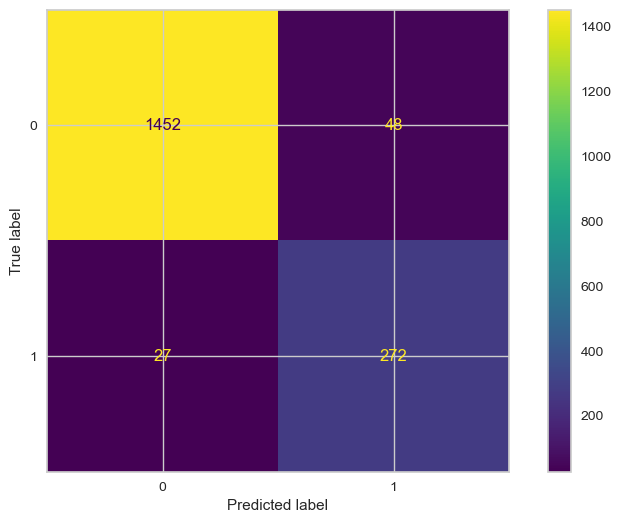

In [165]:
ConfusionMatrixDisplay.from_estimator(pipe_model,X_test, y_test);

In [166]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[1452   48]
 [  27  272]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1500
           1       0.85      0.91      0.88       299

    accuracy                           0.96      1799
   macro avg       0.92      0.94      0.93      1799
weighted avg       0.96      0.96      0.96      1799


Train_Set
[[7466  183]
 [ 135 1388]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      7649
           1       0.88      0.91      0.90      1523

    accuracy                           0.97      9172
   macro avg       0.93      0.94      0.94      9172
weighted avg       0.97      0.97      0.97      9172



## 2.4. Elbow Method for Choosing Reasonable K Values

In [167]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.model_selection import cross_val_score, cross_validate

In [168]:
# List to store test error rates
test_error_rates = []

# Test different values for k
for k in range(1, 30):
    # Define the pipeline with scaler and KNN classifier for current k
    operations = [
        ('preprocessor', preprocessor),  # Apply preprocessing to numeric features
        ('knn', KNeighborsClassifier(n_neighbors=k))  # KNN classifier with current k
    ]
    
    knn_pipe_model = Pipeline(steps=operations)
    
    # Cross-validation to calculate accuracy
    scores = cross_validate(knn_pipe_model, X_train, y_train, scoring=['accuracy'], cv=10)
    
    # Calculate mean accuracy and test error
    accuracy_mean = scores['test_accuracy'].mean()
    test_error = 1 - accuracy_mean
    
    # Append test error to the list
    test_error_rates.append(test_error)

# To find Optimal K value if data is blanced use accuracy metric if 
# imbalanced use recall of target class

# For each k between 1-30 first find accuracy score than substract this 
# acuuracy score from 1 to find error score(1-acc)

# Since optimal K value found using test data (hold out set) can cause data 
# leakage problem while using train data in CV and we evaluate our model 
# over validation set error score.

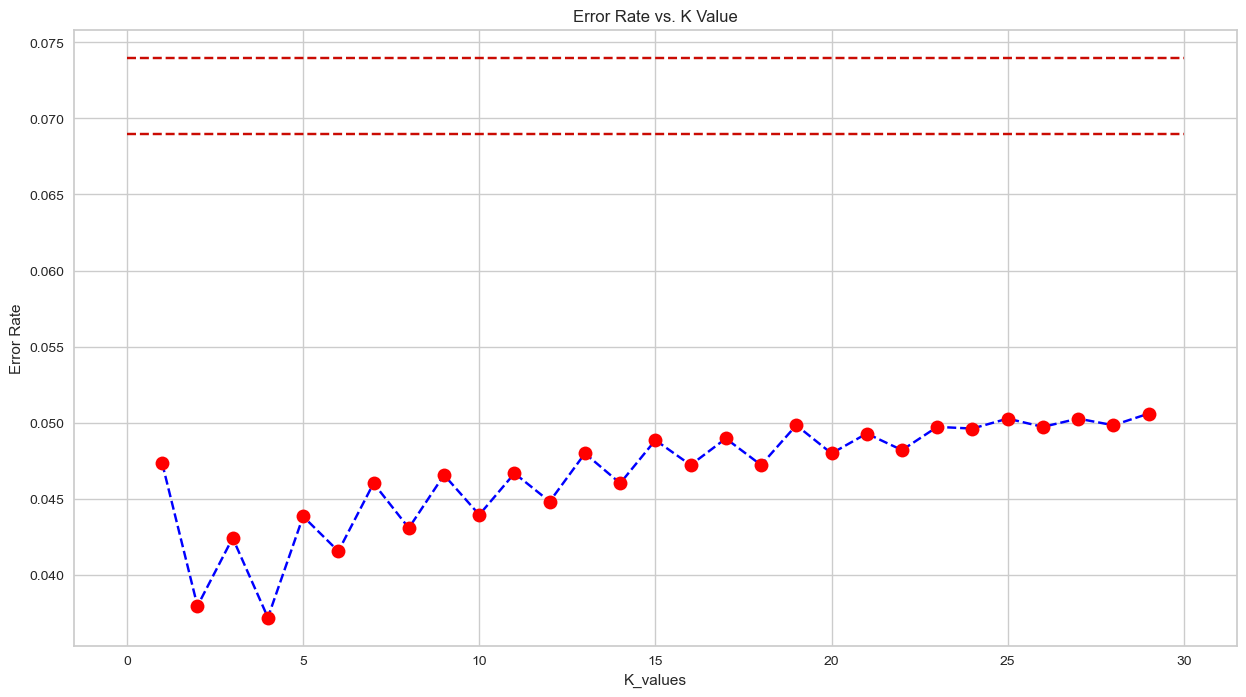

In [169]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.074, xmin = 0, xmax = 30, colors= 'r', linestyles="--")
plt.hlines(y=0.069, xmin = 0, xmax = 30, colors= 'r', linestyles="--");

# We visualize the error scores we find.

## 2.5. Overfiting and underfiting control for k values

In [170]:
# Lists to store error rates
test_error_rates = []
train_error_rates = []

# Test different values for k
for k in range(1, 30):
    # Define the pipeline with scaler and KNN classifier for current k
    operations = [
        ('preprocessor', preprocessor),  # Apply preprocessing to numeric and categoric features
        ('knn', KNeighborsClassifier(n_neighbors=k))  # KNN classifier with current k
    ]
    
    knn_pipe_model = Pipeline(steps=operations)
    
    # Fit the pipeline
    knn_pipe_model.fit(X_train, y_train)
    
    # Cross-validation to calculate accuracy
    scores = cross_validate(knn_pipe_model, X_train, y_train, scoring=['accuracy'], cv=10, return_train_score=True)
    
    # Calculate mean accuracy for train and test
    accuracy_test_mean = scores['test_accuracy'].mean()
    accuracy_train_mean = scores['train_accuracy'].mean()
    
    # Calculate test and train error rates
    test_error = 1 - accuracy_test_mean
    train_error = 1 - accuracy_train_mean
    
    # Append error rates to the lists
    test_error_rates.append(test_error)
    train_error_rates.append(train_error)

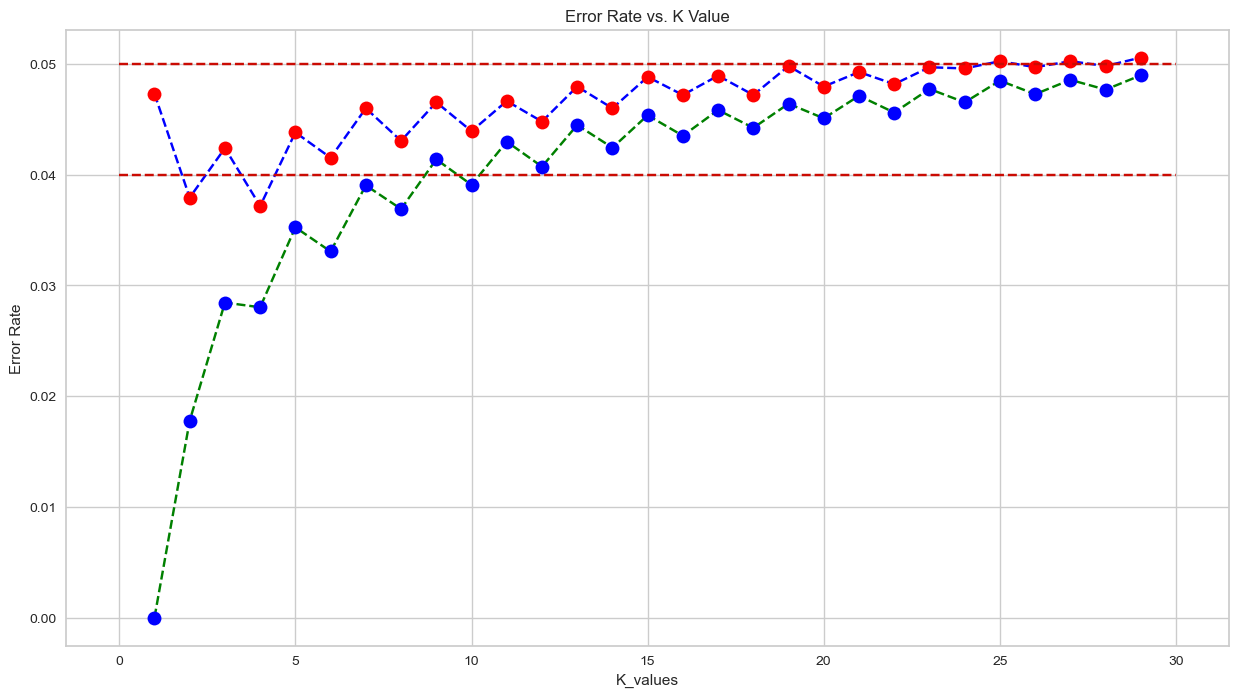

In [171]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)

plt.plot(range(1,30), train_error_rates, color='green', linestyle='--', marker='o',
         markerfacecolor='blue', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.05, xmin=0, xmax=30, colors='r', linestyles="--")
plt.hlines(y=0.04, xmin=0, xmax=30, colors='r', linestyles="--");

# The reds are the validation data, the blues are the scores of the train data.
# The lowest error score for the validation data was achieved at K=21.
# If we choose K=21, the complexity of the model, that is, the operation costs, MIGHT increase.
# While the error is 0.040 for K=9, the error is 0.037 for K=21.
# For a difference of 0.003, is it worth risking the chance of increasing computational complexity?
# It's not worth the expense for a difference of 0.003.

# Keep in mind that the computational complexity of KNN with the search algorithm as brute force is generally O(nd).
# This means, the value of k won't affect the computational complexity of the problem significantly.
# However, if the search algorithm is a tree-based algorithm (kd-tree or ball-tree),
# then the value of k actually will impact the computational complexity of the model.

# At K=21, the scores are almost the same as the error scores in both validation and train data.
# However, if K=9, the error score of the validation data is 0.040, while the error score of the train data is 0.026.
# The difference is 0.014. In other words, since the difference is very small, we can choose K=9 with peace of mind.

Based on the given code, the generated plot displays the error rates for both training and test datasets as a function of different `K` values in a KNN (K-Nearest Neighbors) model. Here's an interpretation of the plot elements:

#### 1. **X-Axis (K_values):**
   - The x-axis represents the `K` values used in the KNN algorithm, ranging from 1 to 30.

#### 2. **Y-Axis (Error Rate):**
   - The y-axis shows the error rates, which represent the proportion of incorrect predictions made by the model on both the training and test datasets.

#### 3. **Blue Line with Red Markers (Test Error Rates):**
   - The **blue dashed line** represents the error rates for the test dataset at different `K` values, with red markers highlighting the specific error rate at each `K`.
   - The test error rate decreases initially but then fluctuates slightly and stabilizes as the `K` value increases. The lowest test error rate is achieved at K = 21 (error rate = 0.069).

#### 4. **Green Line with Blue Markers (Training Error Rates):**
   - The **green dashed line** represents the error rates for the training dataset. The blue markers indicate the error rate for each `K` value.
   - The training error rate starts very low (close to zero) at K = 1 and gradually increases as `K` increases. This indicates that the model becomes more generalized as `K` increases.

#### 5. **Red Horizontal Lines (Reference Error Rates):**
   - Two red horizontal lines indicate significant error rates:
     - **0.074 Error Rate**: Corresponds to the test error rate at K = 9.
     - **0.069 Error Rate**: The minimum test error rate achieved at K = 21.
   - These lines visually emphasize the differences in error rates for different `K` values.

#### 6. **Model Complexity and Choice:**
   - According to the code comments, although the minimum test error rate is achieved at K = 21, selecting this value could increase model complexity and computational costs. However, the test error rate at K = 9 is also acceptable (0.074).
   - Choosing K = 9 might be a more balanced option since it results in a slightly higher test error rate but reduces model complexity and computational costs.

#### Summary:
The plot shows how the error rates in the KNN model change with increasing `K` values. While K = 21 yields the lowest test error rate, K = 9 is also a reasonable choice because it results in a test error rate of 0.074, and the difference is minimal, making the model simpler and potentially less computationally expensive.

## 2.6. Scores by Various K Values

In [172]:
# Create the pipeline for K=1
operations = [
    ('preprocessor', preprocessor),  # Apply preprocessing on the data
    ('knn', KNeighborsClassifier(n_neighbors=1))  # KNN classifier with K=1
]

# Create the pipeline
knn1 = Pipeline(steps=operations)

# Train the model with the training data
knn1.fit(X_train, y_train)

# Evaluate the performance
print('WITH K=1\n')
eval_metric(knn1, X_train, y_train, X_test, y_test)

WITH K=1

Test_Set
[[1454   46]
 [  30  269]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1500
           1       0.85      0.90      0.88       299

    accuracy                           0.96      1799
   macro avg       0.92      0.93      0.93      1799
weighted avg       0.96      0.96      0.96      1799


Train_Set
[[7649    0]
 [   0 1523]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7649
           1       1.00      1.00      1.00      1523

    accuracy                           1.00      9172
   macro avg       1.00      1.00      1.00      9172
weighted avg       1.00      1.00      1.00      9172



In [173]:
# Create the pipeline for K=21
operations = [
    ('preprocessor', preprocessor),  # Apply preprocessing on both numeric and categoric features
    ('knn', KNeighborsClassifier(n_neighbors=21))  # KNN classifier with K=21
]

# Create the pipeline
knn21 = Pipeline(steps=operations)

# Train the model with the training data
knn21.fit(X_train, y_train)

# Evaluate the performance
print('WITH K=21\n')
eval_metric(knn21, X_train, y_train, X_test, y_test)  
   # Report the number of wrong predictions (26+57 as indicated)

WITH K=21

Test_Set
[[1443   57]
 [  26  273]]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1500
           1       0.83      0.91      0.87       299

    accuracy                           0.95      1799
   macro avg       0.90      0.94      0.92      1799
weighted avg       0.96      0.95      0.95      1799


Train_Set
[[7357  292]
 [ 134 1389]]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      7649
           1       0.83      0.91      0.87      1523

    accuracy                           0.95      9172
   macro avg       0.90      0.94      0.92      9172
weighted avg       0.96      0.95      0.95      9172



In [174]:
# Create the pipeline for K=9
operations = [
    ('preprocessor', preprocessor),  # Apply preprocessing on both numeric and categoric features
    ('knn', KNeighborsClassifier(n_neighbors=9))  # KNN classifier with K=9
]

# Create the pipeline
knn9 = Pipeline(steps=operations)

# Train the model with the training data
knn9.fit(X_train, y_train)

# Evaluate the performance
print('WITH K=9\n')
eval_metric(knn21, X_train, y_train, X_test, y_test)  
   # Report the number of wrong predictions (26+57 as indicated)

WITH K=9

Test_Set
[[1443   57]
 [  26  273]]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1500
           1       0.83      0.91      0.87       299

    accuracy                           0.95      1799
   macro avg       0.90      0.94      0.92      1799
weighted avg       0.96      0.95      0.95      1799


Train_Set
[[7357  292]
 [ 134 1389]]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      7649
           1       0.83      0.91      0.87      1523

    accuracy                           0.95      9172
   macro avg       0.90      0.94      0.92      9172
weighted avg       0.96      0.95      0.95      9172



## 2.7. Cross Validate For Optimal K Value

In [175]:
from sklearn.model_selection import cross_val_score, cross_validate

In [176]:
operations = [
    ('preprocessor', preprocessor),  # Apply preprocessing (numeric/categorical feature handling)
    ('knn', KNeighborsClassifier(n_neighbors=9))  # KNN classifier with K=9
]

# Create the model pipeline
model = Pipeline(steps=operations)

# Perform cross-validation with multiple scoring metrics
scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=['accuracy', 'precision', 'recall', 'f1'],
                        cv=10,
                        return_train_score=True)

# Convert results into a DataFrame
df_scores = pd.DataFrame(scores, index=range(1, 11))

# Display the mean scores for each metric, excluding the first two columns
df_scores.mean()[2:]

test_accuracy     0.95
train_accuracy    0.96
test_precision    0.83
train_precision   0.85
test_recall       0.90
train_recall      0.91
test_f1           0.87
train_f1          0.88
dtype: float64

## 2.8. Gridsearch Method for Choosing Reasonable K Values

In [177]:
from sklearn.model_selection import GridSearchCV

In [178]:
# Create the pipeline without specifying the number of neighbors for KNN
operations = [
    ('preprocessor', preprocessor),  # Apply preprocessing on numeric and categorical features
    ('knn', KNeighborsClassifier())  # KNN classifier without specifying n_neighbors (default is K=5)
]

# Create the KNN model pipeline
knn_model = Pipeline(steps=operations)

In [179]:
knn_model.get_params()

{'memory': None,
 'steps': [('preprocessor',
   ColumnTransformer(transformers=[('num', StandardScaler(),
                                    ['satisfaction_level', 'last_evaluation',
                                     'number_project', 'average_monthly_hours',
                                     'time_spend_company', 'work_accident',
                                     'promotion_last_5years']),
                                   ('cat_onehot', OneHotEncoder(),
                                    ['departments']),
                                   ('cat_ordinal',
                                    OrdinalEncoder(categories=[['low', 'medium',
                                                                'high']]),
                                    ['salary'])])),
  ('knn', KNeighborsClassifier())],
 'verbose': False,
 'preprocessor': ColumnTransformer(transformers=[('num', StandardScaler(),
                                  ['satisfaction_level', 'last_evaluation',
          

In [180]:
k_values= range(1,30)

In [181]:
param_grid = {"knn__n_neighbors":k_values, "knn__p": [1,2], "knn__weights": ['uniform', "distance"]}

# most important hyper_parameters for KNN:
# 1. n_neighbors (In binary classification, it should be noted that k is preferred as odd number
                # so that there can not be equality between the classes.
                # It doesn't matter in multiclass classification the k is odd or even.)
# 2. weights
# 3. p

In [182]:
knn_grid_model = GridSearchCV(knn_model, param_grid, cv=10, return_train_score=True)

In [183]:
knn_grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['satisfaction_level',
                                                                          'last_evaluation',
                                                                          'number_project',
                                                                          'average_monthly_hours',
                                                                          'time_spend_company',
                                                                          'work_accident',
                                                                          'promotion_last_5years']),
                                                                        ('cat_onehot',
                                                                         OneHotEncoder(),
                                                                         ['departments']),
                                                                        ('cat_ordinal',
                                                                         OrdinalEncoder(categories=[['low',
                                                                                                     'medium',
                                                                                                     'high']]),
                                                                         ['salary'])])),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': range(1, 30), 'knn__p': [1, 2],
                         'knn__weights': ['uniform', 'distance']},
             return_train_score=True)

In [184]:
knn_grid_model.best_estimator_
# GridsearchCV always returns the maximum metric score, which will give the lowest error score.
# Since the number of n_neighbors we will find after GridsearchCV can be very costly,
# it is best practice to choose with the elbow method.

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['satisfaction_level',
                                                   'last_evaluation',
                                                   'number_project',
                                                   'average_monthly_hours',
                                                   'time_spend_company',
                                                   'work_accident',
                                                   'promotion_last_5years']),
                                                 ('cat_onehot', OneHotEncoder(),
                                                  ['departments']),
                                                 ('cat_ordinal',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high']]),
                                                  ['salary'])])),
                ('knn', KNeighborsClassifier(n_neighbors=4))])

In [185]:
knn_grid_model.best_index_

14

In [186]:
pd.DataFrame(knn_grid_model.cv_results_).loc[knn_grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score    0.96
mean_train_score   0.97
Name: 14, dtype: object

In [187]:
print('WITH K=9\n')
eval_metric(knn_grid_model, X_train, y_train, X_test, y_test)

WITH K=9

Test_Set
[[1464   36]
 [  29  270]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1500
           1       0.88      0.90      0.89       299

    accuracy                           0.96      1799
   macro avg       0.93      0.94      0.94      1799
weighted avg       0.96      0.96      0.96      1799


Train_Set
[[7542  107]
 [ 147 1376]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      7649
           1       0.93      0.90      0.92      1523

    accuracy                           0.97      9172
   macro avg       0.95      0.94      0.95      9172
weighted avg       0.97      0.97      0.97      9172



### 2.9. Evaluating ROC Curves and AUC

In [188]:
from sklearn.metrics import roc_auc_score, auc, roc_curve, RocCurveDisplay, PrecisionRecallDisplay

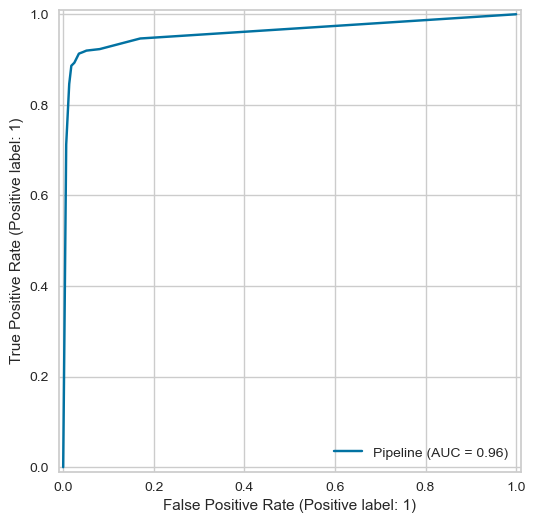

In [189]:
RocCurveDisplay.from_estimator(knn9, X_test, y_test);

In [190]:
y_pred_proba = knn9.predict_proba(X_test)
roc_auc_score(y_test, y_pred_proba[:,1])

0.9601727982162764

In [191]:
knn9

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['satisfaction_level',
                                                   'last_evaluation',
                                                   'number_project',
                                                   'average_monthly_hours',
                                                   'time_spend_company',
                                                   'work_accident',
                                                   'promotion_last_5years']),
                                                 ('cat_onehot', OneHotEncoder(),
                                                  ['departments']),
                                                 ('cat_ordinal',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high']]),
                                                  ['salary'])])),
                ('knn', KNeighborsClassifier(n_neighbors=9))])

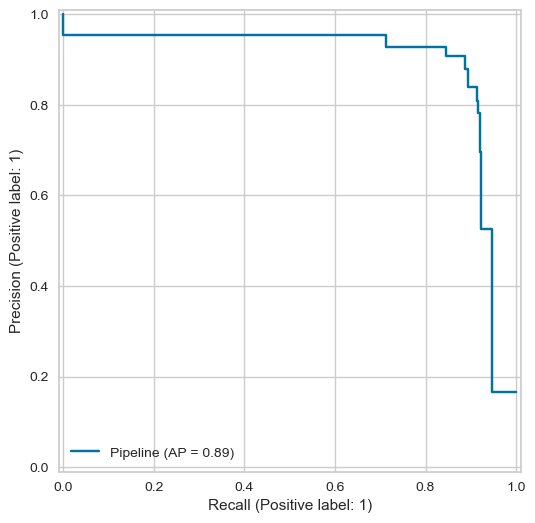

In [192]:
PrecisionRecallDisplay.from_estimator(knn9, X_test, y_test);

In [193]:
KNN_AP = average_precision_score(y_test, y_pred_proba[:,1])
KNN_f1 = f1_score(y_test, y_pred)
KNN_recall = recall_score(y_test, y_pred)

print(f"Average Precision Score (AP): {KNN_AP:.4f}")
print(f"F1 Score: {KNN_f1:.4f}")
print(f"Recall Score: {KNN_recall:.4f}")

Average Precision Score (AP): 0.8924
F1 Score: 0.8788
Recall Score: 0.9097


# =======================
# Model 3: Random Forest
# =======================

## Random Forest

In [194]:
from sklearn.metrics import confusion_matrix, classification_report,\
                            accuracy_score, recall_score, precision_score,\
                            f1_score

def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [195]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline


# Define your feature columns
numeric_features = ['satisfaction_level', 'last_evaluation', 'number_project',
                    'average_monthly_hours', 'time_spend_company', 'work_accident',
                    'promotion_last_5years']  # numeric columns
cat_onehot = ['departments']  # categorical column for OneHotEncoder
cat_ordinal = ['salary']  # categorical column for OrdinalEncoder

# Define your preprocessing steps
numeric_transformer = StandardScaler()  # for numeric columns
onehot_transformer = OneHotEncoder()  # for departments (OneHotEncoding)
ordinal_transformer = OrdinalEncoder(categories=[['low', 'medium', 'high']])  # for salary (OrdinalEncoding)

# Combine preprocessing for both numeric, one-hot categorical, and ordinal categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat_onehot', onehot_transformer, cat_onehot),
        ('cat_ordinal', ordinal_transformer, cat_ordinal)])


In [196]:
# Define the pipeline
operations_rf = [
    ("preprocessor", preprocessor),
    ("RF_model", RandomForestClassifier(class_weight="balanced", random_state=101)),
]

# Create the pipeline
pipe_model_rf = Pipeline(steps=operations_rf)

# Fit the pipeline
pipe_model_rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['satisfaction_level',
                                                   'last_evaluation',
                                                   'number_project',
                                                   'average_monthly_hours',
                                                   'time_spend_company',
                                                   'work_accident',
                                                   'promotion_last_5years']),
                                                 ('cat_onehot', OneHotEncoder(),
                                                  ['departments']),
                                                 ('cat_ordinal',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high']]),
                                                  ['salary'])])),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=101))])

In [197]:
eval_metric(pipe_model_rf, X_train, y_train, X_test, y_test)

Test_Set
[[1498    2]
 [  26  273]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1500
           1       0.99      0.91      0.95       299

    accuracy                           0.98      1799
   macro avg       0.99      0.96      0.97      1799
weighted avg       0.98      0.98      0.98      1799


Train_Set
[[7649    0]
 [   0 1523]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7649
           1       1.00      1.00      1.00      1523

    accuracy                           1.00      9172
   macro avg       1.00      1.00      1.00      9172
weighted avg       1.00      1.00      1.00      9172



## Cross Validation

In [198]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import GridSearchCV

In [199]:
# Fix the scoring list
scores = cross_validate(
    pipe_model_rf, X_train, y_train, 
    scoring=['accuracy', 'precision', 'recall', 'f1'],  
    cv=5, n_jobs=-1, return_train_score=True
)

# Convert the results to a DataFrame and compute the mean
df_scores = pd.DataFrame(scores, index=range(1, 6))
df_scores.mean()[2:]

test_accuracy     0.98
train_accuracy    1.00
test_precision    0.99
train_precision   1.00
test_recall       0.91
train_recall      1.00
test_f1           0.94
train_f1          1.00
dtype: float64

## RF Model GridsearchCV

In [200]:

# Random Forest için hiperparametre grid'ini tanımla
param_grid = {
    'RF_model__n_estimators': [100, 200, 300],  # Ağaç sayısı
    'RF_model__max_depth': [None, 10, 20, 30],  # Maksimum derinlik
    'RF_model__min_samples_split': [2, 5, 10],  # Minimum bölünecek örnek sayısı
    'RF_model__min_samples_leaf': [1, 2, 4],    # Minimum yaprak düğümdeki örnek sayısı
}

In [201]:
# GridSearchCV'yi tanımla
rf_grid_model = GridSearchCV(estimator=pipe_model_rf, 
                           param_grid=param_grid, 
                           cv=5,  # 5 katlı cross-validation
                           scoring='recall',  # Hedef metrik 
                           n_jobs=-1,  # Tüm işlemcilerle paralel çalıştırma
                           verbose=2,
                           return_train_score = True) # Eğitim skorlarını da al

In [202]:
rf_grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['satisfaction_level',
                                                                          'last_evaluation',
                                                                          'number_project',
                                                                          'average_monthly_hours',
                                                                          'time_spend_company',
                                                                          'work_accident',
                                                                          'promotion_last_5years']),
                                                                        ('cat_onehot',
                                                                         OneHotEncoder(),
                                                                         ['departments']),
                                                                        ('cat_ordinal',
                                                                         OrdinalEncoder(categories=[['low',
                                                                                                     'medium',
                                                                                                     'high']]),
                                                                         ['salary'])])),
                                       ('RF_model',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=101))]),
             n_jobs=-1,
             param_grid={'RF_model__max_depth': [None, 10, 20, 30],
                         'RF_model__min_samples_leaf': [1, 2, 4],
                         'RF_model__min_samples_split': [2, 5, 10],
                         'RF_model__n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='recall', verbose=2)

In [203]:
rf_grid_model.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['satisfaction_level',
                                                   'last_evaluation',
                                                   'number_project',
                                                   'average_monthly_hours',
                                                   'time_spend_company',
                                                   'work_accident',
                                                   'promotion_last_5years']),
                                                 ('cat_onehot', OneHotEncoder(),
                                                  ['departments']),
                                                 ('cat_ordinal',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high']]),
                                                  ['salary'])])),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced', max_depth=10,
                                        min_samples_split=10, n_estimators=200,
                                        random_state=101))])

In [204]:
rf_grid_model.best_params_

{'RF_model__max_depth': 10,
 'RF_model__min_samples_leaf': 1,
 'RF_model__min_samples_split': 10,
 'RF_model__n_estimators': 200}

In [205]:
cv_results_df = pd.DataFrame(rf_grid_model.cv_results_)
print(cv_results_df.columns)

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_RF_model__max_depth', 'param_RF_model__min_samples_leaf',
       'param_RF_model__min_samples_split', 'param_RF_model__n_estimators',
       'params', 'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'split4_train_score', 'mean_train_score', 'std_train_score'],
      dtype='object')


In [206]:
pd.DataFrame(rf_grid_model.cv_results_).loc[
    rf_grid_model.best_index_, ["mean_test_score", "mean_train_score"]
]

mean_test_score    0.92
mean_train_score   0.94
Name: 34, dtype: object

Bu sonuçlara dayanarak aşağıdaki çıkarımları yapabiliriz:

Test Skoru (0.91): Model, çapraz doğrulama (cross-validation) sırasında test verisinde %91 doğruluk oranına ulaşmış. Bu, modelin genelleme performansının iyi olduğunu ve bilinmeyen veriler üzerinde makul bir doğruluk sağladığını gösterir.

Train Skoru (0.93): Eğitim verisi üzerindeki doğruluk %93. Bu, modelin eğitim verisini oldukça iyi öğrendiğini, ancak aşırı uyum (overfitting) yapmadığını gösteriyor.

Train ve Test Skorları Arasındaki Fark (0.02): Eğitim ve test skorları arasındaki fark küçük (%2), bu da modelin overfitting (aşırı öğrenme) yapmadığını, yani eğitildiği veriye aşırı bağımlı hale gelmediğini gösterir. İdeal olarak eğitim ve test skorlarının birbirine yakın olması istenir, çünkü bu durumda model hem eğitim verisinde hem de test verisinde iyi performans gösterir. Bu durumda, eğitim ve test skorları oldukça yakın, bu da modelin iyi bir genelleme kapasitesine sahip olduğunu gösterir.

Genel Yorum:
İyi Genel Performans: Hem eğitim hem de test skorlarının yüksek olması (%90 üzeri), modelin hem öğrenme kapasitesinin hem de genelleme yeteneğinin iyi olduğunu gösterir.
Denge: Eğitim ve test skorları arasında büyük bir fark olmadığından, model aşırı uyum veya eksik öğrenme (underfitting) problemi yaşamıyor gibi görünüyor.
Daha İyi Performans İçin: Model performansını daha da iyileştirmek istersen, hiperparametre optimizasyonunu genişletebilir ya da daha karmaşık modeller (örneğin daha fazla ağaç veya derinlik ayarlaması) deneyebilirsin. Ek olarak, scoring metriği olarak f1, roc_auc gibi metrikleri kullanmak da sınıflar arasında dengesizlik varsa daha anlamlı olabilir.

In [207]:
eval_metric(rf_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[1496    4]
 [  26  273]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1500
           1       0.99      0.91      0.95       299

    accuracy                           0.98      1799
   macro avg       0.98      0.96      0.97      1799
weighted avg       0.98      0.98      0.98      1799


Train_Set
[[7619   30]
 [ 101 1422]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7649
           1       0.98      0.93      0.96      1523

    accuracy                           0.99      9172
   macro avg       0.98      0.96      0.97      9172
weighted avg       0.99      0.99      0.99      9172



In [208]:
from scikitplot.metrics import plot_precision_recall

In [209]:
# Test verisi üzerinde modelin olasılık tahminlerini al
y_pred_proba = rf_grid_model.predict_proba(X_test)
y_pred_proba

array([[0.01400449, 0.98599551],
       [0.98425747, 0.01574253],
       [0.97724607, 0.02275393],
       ...,
       [0.98437255, 0.01562745],
       [0.81131039, 0.18868961],
       [0.0492952 , 0.9507048 ]])

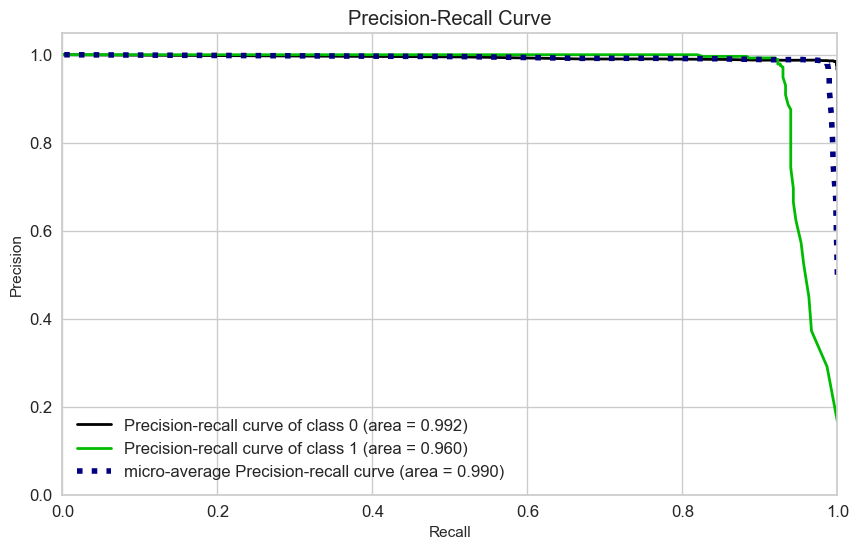

In [210]:
# Define the pipeline
operations_rf = [
    ("preprocessor", preprocessor),
    ("RF_model", RandomForestClassifier(class_weight="balanced", random_state=101)),
]

# Create the pipeline
pipe_model_rf = Pipeline(steps=operations_rf)

# Fit the pipeline
pipe_model_rf.fit(X_train, y_train)

y_pred_proba = pipe_model_rf.predict_proba(X_test)

plot_precision_recall(y_test, y_pred_proba)
plt.show();


In [211]:
from sklearn.metrics import average_precision_score

rf_ap = average_precision_score(y_test, y_pred_proba[:, 1])
rf_ap

0.9603605964168676

average_precision_score (AP) metriği, özellikle dengesiz sınıf dağılımlarına sahip veri setlerinde modelin performansını değerlendirmek için kullanılır. İşte bu metriğin neden önemli olduğu ve ne tür durumlarda kullanıldığının detayları:

Neden average_precision_score Kullanılır?
Dengesiz Sınıf Dağılımları:

Veri setinde pozitif ve negatif sınıflar arasında büyük bir dengesizlik varsa (örneğin, pozitif sınıflar çok azsa), doğruluk (accuracy) metriği yanıltıcı olabilir. Çünkü model çoğunlukla baskın sınıfa odaklanabilir ve doğruluk yüksek görünebilir. AP skoru, bu durumları daha iyi değerlendirir.
Precision-Recall Eğrisi:

AP skoru, Precision-Recall eğrisinin altında kalan alanı (AUC) hesaplar. Precision-Recall eğrisi, modelin precision (kesinlik) ve recall (duyarlılık) değerlerini gösterir. AP skoru, bu eğrinin genel performansını özetler ve çeşitli eşik değerlerinde modelin nasıl performans gösterdiğini değerlendirir.
Performans Ölçümü:

Precision (kesinlik) ve recall (duyarlılık), modelin pozitif sınıfları ne kadar iyi tahmin ettiğini ölçer. AP skoru, precision ve recall'ün ortalamasını alarak, bu metriklerin tüm eşiği boyunca nasıl değiştiğini değerlendirir. Bu, modelin performansını daha kapsamlı bir şekilde anlamanıza yardımcı olur.
Kullanım Alanları:
Sınıflama Problemleri: Özellikle ikili sınıflama problemlerinde, pozitif sınıfın önemli olduğu durumlarda kullanılır. Örneğin, hastalık teşhisi, dolandırıcılık tespiti gibi durumlarda pozitif sınıfların doğru tahmin edilmesi kritik olabilir.

Model Karşılaştırmaları: Farklı modellerin veya hiperparametre ayarlarının karşılaştırılmasında AP skoru kullanılabilir. Bu skor, farklı modellerin precision-recall eğrilerinin ne kadar iyi olduğunu kıyaslamaya olanak sağlar.

Dengesiz Veri Setleri: Veri setindeki sınıf dağılımının çok dengesiz olduğu durumlarda AP skoru, modelin performansını daha anlamlı bir şekilde değerlendirmeye yardımcı olur.

Özet:
average_precision_score, özellikle dengesiz veri setlerinde veya pozitif sınıfın önemli olduğu durumlarda model performansını anlamak için kritik bir metriktir. Precision ve recall'ün çeşitli eşik değerlerinde nasıl performans gösterdiğini özetleyerek, modelin genel başarısını daha iyi değerlendirebilirsiniz.

In [212]:
y_pred = rf_grid_model.predict(X_test)

In [213]:
rf_AP = average_precision_score(y_test, y_pred_proba[:, 1])
rf_f1 = f1_score(y_test, y_pred, average='binary')
rf_recall = recall_score(y_test, y_pred, average='binary')

print(f"Average Precision Score (AP): {rf_AP:.4f}")
print(f"F1 Score: {rf_f1:.4f}")
print(f"Recall Score: {rf_recall:.4f}")

Average Precision Score (AP): 0.9604
F1 Score: 0.9479
Recall Score: 0.9130


# =======================
# Model 4: XGBoost
# =======================

## XGBoost Model

In [218]:
!pip install xgboost

In [230]:
from xgboost import XGBClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# Define feature columns
numeric_features = ['satisfaction_level', 'last_evaluation', 'number_project',
                    'average_monthly_hours', 'time_spend_company', 'work_accident',
                    'promotion_last_5years']
cat_onehot = ['departments']
cat_ordinal = ['salary']

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat_onehot', OneHotEncoder(), cat_onehot),
        ('cat_ordinal', OrdinalEncoder(categories=[['low', 'medium', 'high']]), cat_ordinal)
    ]
)


In [231]:

# Define the XGBClassifier model
xgb_model = XGBClassifier(random_state=101)

# Create the pipeline
pipe_model_xgb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('XGB_model', xgb_model)  # Correct usage
])

# Fit the pipeline
pipe_model_xgb.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['satisfaction_level',
                                                   'last_evaluation',
                                                   'number_project',
                                                   'average_monthly_hours',
                                                   'time_spend_company',
                                                   'work_accident',
                                                   'promotion_last_5years']),
                                                 ('cat_onehot', OneHotEncoder(),
                                                  ['departments']),
                                                 ('cat_ordinal',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high']]),
                                                  ['s...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=101, ...))])

In [232]:
eval_metric(pipe_model_xgb, X_train, y_train, X_test, y_test)

Test_Set
[[1492    8]
 [  22  277]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1500
           1       0.97      0.93      0.95       299

    accuracy                           0.98      1799
   macro avg       0.98      0.96      0.97      1799
weighted avg       0.98      0.98      0.98      1799


Train_Set
[[7643    6]
 [  28 1495]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7649
           1       1.00      0.98      0.99      1523

    accuracy                           1.00      9172
   macro avg       1.00      0.99      0.99      9172
weighted avg       1.00      1.00      1.00      9172



## Cross Validation

In [233]:
xgb_scores = cross_validate(
    pipe_model_xgb, X_train, y_train, 
    scoring=['accuracy', 'precision', 'recall', 'f1'],  
    cv=5, n_jobs=-1, return_train_score=True
)

# Convert the results to a DataFrame and compute the mean
df_scores = pd.DataFrame(scores, index=range(1, 6))
df_scores.mean()[2:]

test_accuracy     0.98
train_accuracy    1.00
test_precision    0.99
train_precision   1.00
test_recall       0.91
train_recall      1.00
test_f1           0.94
train_f1          1.00
dtype: float64

## XGBoost Grid Search

In [234]:
xgb_param_grid = {
    'XGB_model__n_estimators': [100, 200],
    'XGB_model__max_depth': [3, 5, 7],
    'XGB_model__learning_rate': [0.01, 0.1, 0.2],
    'XGB_model__subsample': [0.5, 0.8, 0.9, 1.0],
    'XGB_model__colsample_bytree': [0.8, 0.9, 1.0]
}


In [235]:
xgb_grid_model = GridSearchCV(estimator=pipe_model_xgb, 
                           param_grid=xgb_param_grid, 
                           cv=5,  # 5 katlı çapraz doğrulama
                           scoring='recall',  # Hedef metrik
                           n_jobs=-1,  # Tüm işlemcilerle paralel çalıştırma
                           verbose=2,
                           return_train_score=True)  # Eğitim skorlarını da döndür

# Grid Search'ü fit edin
xgb_grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['satisfaction_level',
                                                                          'last_evaluation',
                                                                          'number_project',
                                                                          'average_monthly_hours',
                                                                          'time_spend_company',
                                                                          'work_accident',
                                                                          'promotion_last_5years']),
                                                                        ('cat_onehot',
                                                                         OneHotEncoder(),
                                                                         ['departments']),
                                                                        ('cat_ordinal',
                                                                         OrdinalEncoder(categories=[[...
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=101, ...))]),
             n_jobs=-1,
             param_grid={'XGB_model__colsample_bytree': [0.8, 0.9, 1.0],
                         'XGB_model__learning_rate': [0.01, 0.1, 0.2],
                         'XGB_model__max_depth': [3, 5, 7],
                         'XGB_model__n_estimators': [100, 200],
                         'XGB_model__subsample': [0.5, 0.8, 0.9, 1.0]},
             return_train_score=True, scoring='recall', verbose=2)

In [236]:
xgb_grid_model.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['satisfaction_level',
                                                   'last_evaluation',
                                                   'number_project',
                                                   'average_monthly_hours',
                                                   'time_spend_company',
                                                   'work_accident',
                                                   'promotion_last_5years']),
                                                 ('cat_onehot', OneHotEncoder(),
                                                  ['departments']),
                                                 ('cat_ordinal',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high']]),
                                                  ['s...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.2,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=None,
                               num_parallel_tree=None, random_state=101, ...))])

In [237]:
xgb_grid_model.best_params_

{'XGB_model__colsample_bytree': 1.0,
 'XGB_model__learning_rate': 0.2,
 'XGB_model__max_depth': 3,
 'XGB_model__n_estimators': 100,
 'XGB_model__subsample': 1.0}

In [238]:
pd.DataFrame(xgb_grid_model.cv_results_).loc[
    xgb_grid_model.best_index_, ["mean_test_score", "mean_train_score"]
]

mean_test_score    0.93
mean_train_score   0.93
Name: 195, dtype: object

In [239]:
eval_metric(xgb_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[1486   14]
 [  22  277]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1500
           1       0.95      0.93      0.94       299

    accuracy                           0.98      1799
   macro avg       0.97      0.96      0.96      1799
weighted avg       0.98      0.98      0.98      1799


Train_Set
[[7608   41]
 [ 104 1419]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7649
           1       0.97      0.93      0.95      1523

    accuracy                           0.98      9172
   macro avg       0.98      0.96      0.97      9172
weighted avg       0.98      0.98      0.98      9172



In [240]:
y_pred_proba_xgb = xgb_grid_model.predict_proba(X_test)
y_pred_proba_xgb

array([[0.00482696, 0.99517304],
       [0.99327755, 0.00672244],
       [0.9950936 , 0.00490642],
       ...,
       [0.9952104 , 0.00478958],
       [0.99500495, 0.00499504],
       [0.06889623, 0.93110377]], dtype=float32)

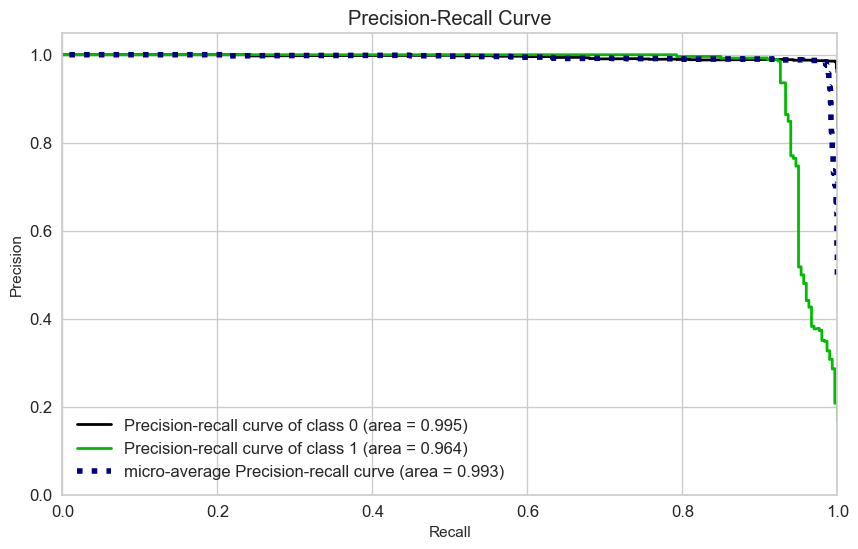

In [241]:
operations_xgb = [
    ("preprocessor", preprocessor),
    ("XGB_model", XGBClassifier(class_weight="balanced", random_state=101)),
]

# Create the pipeline
pipe_model_xgb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('XGB_model', xgb_model) 
])

# Fit the pipeline
pipe_model_xgb.fit(X_train, y_train)

y_pred_proba = pipe_model_xgb.predict_proba(X_test)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [242]:
xgb_ap = average_precision_score(y_test, y_pred_proba_xgb[:, 1])
xgb_ap

0.9678248199267102

In [243]:
y_pred = xgb_grid_model.predict(X_test)

In [244]:
xgb_AP = average_precision_score(y_test, y_pred_proba_xgb[:, 1])
xgb_f1 = f1_score(y_test, y_pred, average='binary')
xgb_recall = recall_score(y_test, y_pred, average='binary')

# =======================
# Model 5: DL Modelling
# =======================

In [245]:
X = df.drop('left', axis=1)
y = df['left'].values

In [246]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    test_size=0.15,
                                                    random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train,
                                                  y_train,
                                                  stratify=y_train,
                                                  test_size=0.1,
                                                  random_state=42)

In [247]:
# Define your feature columns
numeric_features = ['satisfaction_level', 'last_evaluation', 'number_project',
                    'average_monthly_hours', 'time_spend_company', 'work_accident',
                    'promotion_last_5years']  # numeric columns
cat_onehot = ['departments']  # categorical column for OneHotEncoder
cat_ordinal = ['salary']  # categorical column for OrdinalEncoder
# Define your preprocessing steps
numeric_transformer = StandardScaler()  # for numeric columns
onehot_transformer = OneHotEncoder()  # for departments (OneHotEncoding)
ordinal_transformer = OrdinalEncoder(categories=[['low', 'medium', 'high']])  # for salary (OrdinalEncoding)
# Combine preprocessing for both numeric, one-hot categorical, and ordinal categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat_onehot', onehot_transformer, cat_onehot),
        ('cat_ordinal', ordinal_transformer, cat_ordinal)])

In [248]:
X_train = preprocessor.fit_transform(X_train)
X_val = preprocessor.transform(X_val)
X_test = preprocessor.transform(X_test)

In [249]:
scaler = MinMaxScaler()

In [250]:
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [251]:
SEED = 42
# import os

# Set the seed using keras.utils.set_random_seed. This will set:
# 1) `numpy` seed
# 2) `tensorflow` random seed
# 3) `python` random seed
seed = 42
keras.utils.set_random_seed(seed)

# This will make TensorFlow ops as deterministic as possible, but it will
# affect the overall performance, so it's not enabled by default.
# `enable_op_determinism()` is introduced in TensorFlow 2.9.

tf.config.experimental.enable_op_determinism()
# os.environ["TF_DETERMINISTIC_OPS"] = "1"

In [252]:
# tf.random.set_seed(42)

model = Sequential()

model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt,
              loss="binary_crossentropy",
              metrics=["Recall"])

In [253]:
early_stop = EarlyStopping(monitor="val_loss",
                           mode="auto",
                           verbose=1,
                           patience=10,
                           restore_best_weights = True)

In [254]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)

class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.5995554974506472, 1: 3.011162179908076}

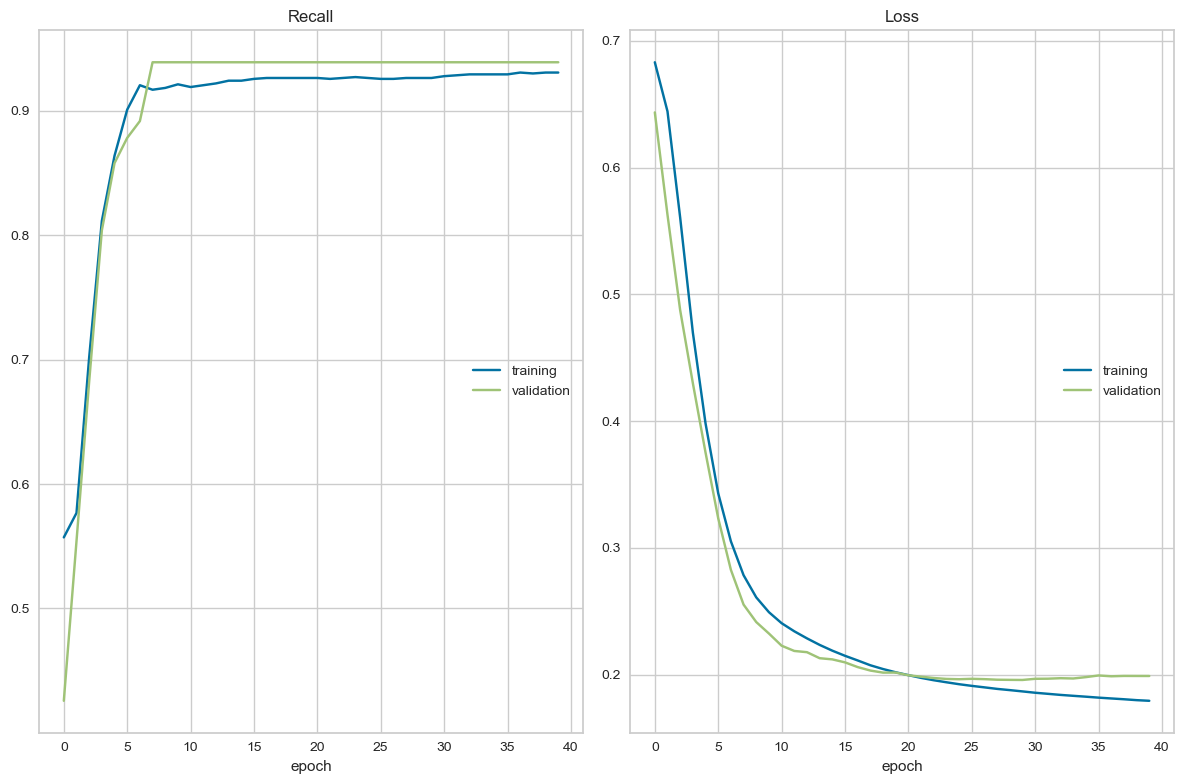

Recall
	training         	 (min:    0.557, max:    0.931, cur:    0.931)
	validation       	 (min:    0.426, max:    0.939, cur:    0.939)
Loss
	training         	 (min:    0.179, max:    0.683, cur:    0.179)
	validation       	 (min:    0.196, max:    0.644, cur:    0.199)
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - Recall: 0.9363 - loss: 0.1795 - val_Recall: 0.9392 - val_loss: 0.1989
Epoch 40: early stopping
Restoring model weights from the end of the best epoch: 30.


In [255]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=200,
          verbose=1,
          callbacks=[early_stop, PlotLossesKerasTF()],
          class_weight=class_weights)

<Axes: >

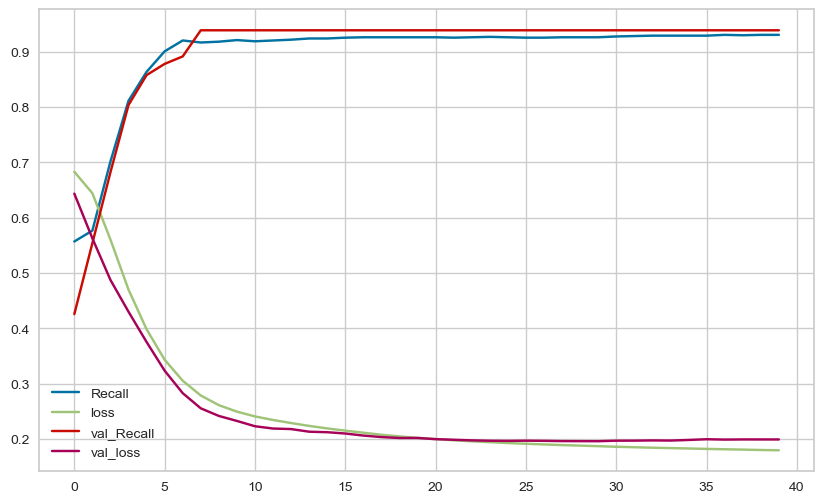

In [256]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [257]:
y_pred = (model.predict(X_test) > .5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[[1407   93]
 [  23  276]]
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1500
           1       0.75      0.92      0.83       299

    accuracy                           0.94      1799
   macro avg       0.87      0.93      0.89      1799
weighted avg       0.94      0.94      0.94      1799



57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step


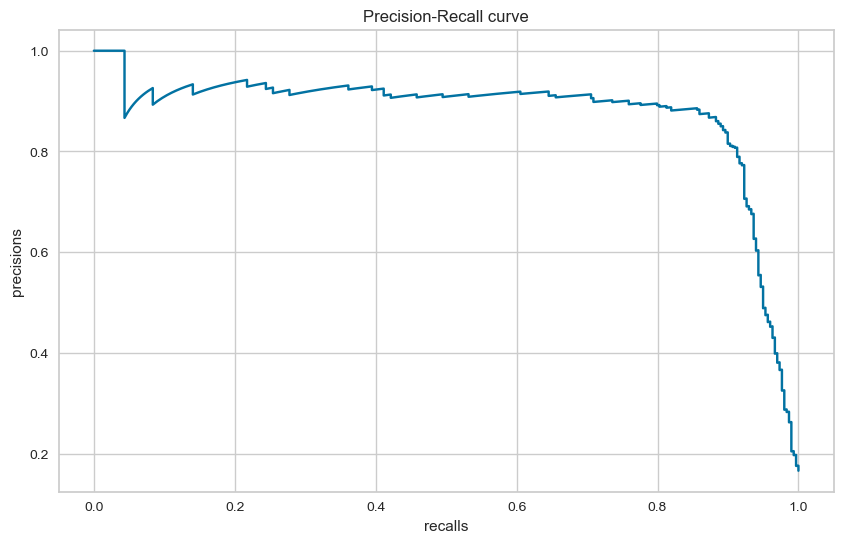

In [258]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [259]:
from sklearn.metrics import average_precision_score

average_precision_score(y_test, y_pred_proba)

0.8764503401438318

In [260]:
DL_AP = average_precision_score(y_test, y_pred_proba)
DL_f1 = f1_score(y_test, y_pred)
DL_rec = recall_score(y_test, y_pred)

### Optuna (Hyperparameter optimization tool)

In [261]:
#!pip install optuna

In [262]:
import optuna
# optimizers for gradient descent to use in backpropagation
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam

In [263]:
class_weights

{0: 0.5995554974506472, 1: 3.011162179908076}

In [264]:
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=15, restore_best_weights=True
)

trial_metric = "accuracy"
batch_size = 32

"""
This code defines two functions for creating and training a neural network model
using Optuna for hyperparameter optimization. The model is designed for binary
classification tasks.
"""


def objective(trial):
    # Create a model using the hyperparameters suggested by Optuna
    # model = create_model(trial)

    # Hyperparameters to be optimized by Optuna
    n_units1 = trial.suggest_int("n_units1", 8, 128)  # Number of units in the first hidden layer
    n_units2 = trial.suggest_int("n_units2", 8, 128)  # Number of units in the second hidden layer
    optimizer = trial.suggest_categorical("optimizer", [Adam, Adadelta, RMSprop, Nadam])  # Choice of optimizer
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1.3e-1)  # Learning rate on a log scale
    # Suggest class weights for handling imbalanced datasets
    w0 = trial.suggest_loguniform("w0", 0.01, 5)  # Weight for class 0
    w1 = trial.suggest_loguniform("w1", 0.01, 5)  # Weight for class 1
    
    # Create a sequential model
    model = Sequential()
    
    # Add the first dense layer with input shape and ReLU activation
    model.add(Dense(n_units1, input_dim=X_train.shape[1], activation="relu"))
    
    # Add the second dense layer with ReLU activation
    model.add(Dense(n_units2, activation="relu"))
    
    # Add the output layer with sigmoid activation for binary classification
    model.add(Dense(1, activation="sigmoid"))
    
    # Compile the model with binary crossentropy loss and the chosen optimizer
    model.compile(
        loss="binary_crossentropy",
        optimizer=optimizer(learning_rate=learning_rate),
        metrics=[trial_metric],  # Custom metric for evaluation
    )
   
    # Train the model
    model.fit(
        X_train,
        y_train,
        validation_data=(X_test, y_test),
        batch_size=batch_size,
        epochs=100,
        callbacks=[early_stop],  # Early stopping to prevent overfitting
        class_weight={0: w0, 1: w1},  # Apply class weights
        verbose=0,  # Suppress output
    )
    
    # Evaluate the model on the test set and return the score
    score = model.evaluate(X_test, y_test, verbose=0)[1]
    return score

In [265]:
# Create an Optuna study to maximize the objective function
study = optuna.create_study(direction="maximize")

# Run the optimization for 25 trials
study.optimize(objective, n_trials=25)

[I 2024-09-11 13:23:40,859] A new study created in memory with name: no-name-1996b4a3-b28d-42a4-ac60-2bd7abab72b0


Restoring model weights from the end of the best epoch: 100.


[I 2024-09-11 13:24:07,087] Trial 0 finished with value: 0.19677598774433136 and parameters: {'n_units1': 52, 'n_units2': 20, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 1.1149864366927918e-05, 'w0': 0.12487675176978073, 'w1': 0.011627965531445789}. Best is trial 0 with value: 0.19677598774433136.


Restoring model weights from the end of the best epoch: 100.


[I 2024-09-11 13:24:32,990] Trial 1 finished with value: 0.8337965607643127 and parameters: {'n_units1': 25, 'n_units2': 106, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.0003638947108111056, 'w0': 0.20887925332829899, 'w1': 0.25137723538857465}. Best is trial 1 with value: 0.8337965607643127.


Restoring model weights from the end of the best epoch: 100.


[I 2024-09-11 13:24:58,400] Trial 2 finished with value: 0.9143968820571899 and parameters: {'n_units1': 126, 'n_units2': 63, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 2.5757806843897057e-05, 'w0': 0.24757997344444907, 'w1': 0.18944608789701883}. Best is trial 2 with value: 0.9143968820571899.


Epoch 29: early stopping
Restoring model weights from the end of the best epoch: 14.


[I 2024-09-11 13:25:06,562] Trial 3 finished with value: 0.9660922884941101 and parameters: {'n_units1': 102, 'n_units2': 110, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.07577038948111646, 'w0': 0.450561136420197, 'w1': 0.43383747028918285}. Best is trial 3 with value: 0.9660922884941101.


Epoch 15: early stopping
Restoring model weights from the end of the best epoch: 1.


[I 2024-09-11 13:25:12,343] Trial 4 finished with value: 0.8337965607643127 and parameters: {'n_units1': 77, 'n_units2': 128, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 1.5558682024323755e-05, 'w0': 0.283794067773923, 'w1': 0.36404499373433563}. Best is trial 3 with value: 0.9660922884941101.


Epoch 48: early stopping
Restoring model weights from the end of the best epoch: 33.


[I 2024-09-11 13:25:24,875] Trial 5 finished with value: 0.9622012376785278 and parameters: {'n_units1': 9, 'n_units2': 97, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.003123596604702538, 'w0': 1.530500614877517, 'w1': 1.7867836944207378}. Best is trial 3 with value: 0.9660922884941101.


Epoch 15: early stopping
Restoring model weights from the end of the best epoch: 1.


[I 2024-09-11 13:25:30,299] Trial 6 finished with value: 0.8332406878471375 and parameters: {'n_units1': 121, 'n_units2': 26, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.08574058000618062, 'w0': 0.015447293655167648, 'w1': 0.013417997792528185}. Best is trial 3 with value: 0.9660922884941101.


Epoch 15: early stopping
Restoring model weights from the end of the best epoch: 1.


[I 2024-09-11 13:25:35,297] Trial 7 finished with value: 0.8337965607643127 and parameters: {'n_units1': 77, 'n_units2': 118, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.0015480685670075346, 'w0': 0.8732269136732276, 'w1': 0.019897160533422328}. Best is trial 3 with value: 0.9660922884941101.


Epoch 29: early stopping
Restoring model weights from the end of the best epoch: 14.


[I 2024-09-11 13:25:45,056] Trial 8 finished with value: 0.9699833393096924 and parameters: {'n_units1': 81, 'n_units2': 65, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.012134363776638157, 'w0': 0.030064649867338148, 'w1': 0.04039382410028378}. Best is trial 8 with value: 0.9699833393096924.


Epoch 15: early stopping
Restoring model weights from the end of the best epoch: 1.


[I 2024-09-11 13:25:50,123] Trial 9 finished with value: 0.8337965607643127 and parameters: {'n_units1': 126, 'n_units2': 66, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.0025574717726548194, 'w0': 0.14206555204269436, 'w1': 0.010344337844251993}. Best is trial 8 with value: 0.9699833393096924.


Epoch 15: early stopping
Restoring model weights from the end of the best epoch: 1.


[I 2024-09-11 13:25:55,793] Trial 10 finished with value: 0.9193996787071228 and parameters: {'n_units1': 46, 'n_units2': 39, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.016390210684698012, 'w0': 0.012948431450347058, 'w1': 0.05419721901980628}. Best is trial 8 with value: 0.9699833393096924.


Epoch 15: early stopping
Restoring model weights from the end of the best epoch: 1.


[I 2024-09-11 13:26:01,321] Trial 11 finished with value: 0.8337965607643127 and parameters: {'n_units1': 97, 'n_units2': 85, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.12152496451595346, 'w0': 4.6146316700399534, 'w1': 1.125963314349708}. Best is trial 8 with value: 0.9699833393096924.


Epoch 15: early stopping
Restoring model weights from the end of the best epoch: 1.


[I 2024-09-11 13:26:06,824] Trial 12 finished with value: 0.9449694156646729 and parameters: {'n_units1': 99, 'n_units2': 48, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.018209066496433425, 'w0': 0.041932329758498824, 'w1': 0.06954660227791318}. Best is trial 8 with value: 0.9699833393096924.


Epoch 15: early stopping
Restoring model weights from the end of the best epoch: 1.


[I 2024-09-11 13:26:11,886] Trial 13 finished with value: 0.44858255982398987 and parameters: {'n_units1': 98, 'n_units2': 79, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.028173706522889863, 'w0': 0.048801054976803766, 'w1': 4.8162341142539855}. Best is trial 8 with value: 0.9699833393096924.


Epoch 15: early stopping
Restoring model weights from the end of the best epoch: 1.


[I 2024-09-11 13:26:17,205] Trial 14 finished with value: 0.8749305009841919 and parameters: {'n_units1': 63, 'n_units2': 55, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.007570351500514502, 'w0': 0.590675990858867, 'w1': 0.0735387772912151}. Best is trial 8 with value: 0.9699833393096924.


Epoch 15: early stopping
Restoring model weights from the end of the best epoch: 1.


[I 2024-09-11 13:26:22,394] Trial 15 finished with value: 0.26070037484169006 and parameters: {'n_units1': 87, 'n_units2': 84, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.00026708477468806896, 'w0': 0.051742942578156655, 'w1': 0.4315904278350402}. Best is trial 8 with value: 0.9699833393096924.


Epoch 15: early stopping
Restoring model weights from the end of the best epoch: 1.


[I 2024-09-11 13:26:27,785] Trial 16 finished with value: 0.8337965607643127 and parameters: {'n_units1': 107, 'n_units2': 101, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.04873878004350993, 'w0': 3.0018641905284893, 'w1': 0.03928114131925375}. Best is trial 8 with value: 0.9699833393096924.


Epoch 15: early stopping
Restoring model weights from the end of the best epoch: 1.


[I 2024-09-11 13:26:32,646] Trial 17 finished with value: 0.8877153992652893 and parameters: {'n_units1': 64, 'n_units2': 38, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.007039789175350281, 'w0': 0.501147782175471, 'w1': 0.15029201899703765}. Best is trial 8 with value: 0.9699833393096924.


Epoch 15: early stopping
Restoring model weights from the end of the best epoch: 1.


[I 2024-09-11 13:26:38,655] Trial 18 finished with value: 0.46637019515037537 and parameters: {'n_units1': 111, 'n_units2': 76, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.0006774089084680044, 'w0': 0.023261719512521567, 'w1': 0.6283987570261362}. Best is trial 8 with value: 0.9699833393096924.


Epoch 15: early stopping
Restoring model weights from the end of the best epoch: 1.


[I 2024-09-11 13:26:43,294] Trial 19 finished with value: 0.8337965607643127 and parameters: {'n_units1': 82, 'n_units2': 114, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 7.92275651445431e-05, 'w0': 0.0893561978262205, 'w1': 0.03341189940863374}. Best is trial 8 with value: 0.9699833393096924.


Epoch 15: early stopping
Restoring model weights from the end of the best epoch: 1.


[I 2024-09-11 13:26:48,557] Trial 20 finished with value: 0.8337965607643127 and parameters: {'n_units1': 44, 'n_units2': 11, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.006655723168960977, 'w0': 1.4665296451596794, 'w1': 0.132104676917539}. Best is trial 8 with value: 0.9699833393096924.


Epoch 15: early stopping
Restoring model weights from the end of the best epoch: 1.


[I 2024-09-11 13:26:53,146] Trial 21 finished with value: 0.864924967288971 and parameters: {'n_units1': 9, 'n_units2': 96, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.0032293068519345263, 'w0': 1.4742951954893564, 'w1': 1.9342142804779312}. Best is trial 8 with value: 0.9699833393096924.


Epoch 15: early stopping
Restoring model weights from the end of the best epoch: 1.


[I 2024-09-11 13:26:57,647] Trial 22 finished with value: 0.9160645008087158 and parameters: {'n_units1': 31, 'n_units2': 92, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.04114069501361517, 'w0': 1.370303632603611, 'w1': 2.2176243842310086}. Best is trial 8 with value: 0.9699833393096924.


Epoch 15: early stopping
Restoring model weights from the end of the best epoch: 1.


[I 2024-09-11 13:27:02,131] Trial 23 finished with value: 0.8877153992652893 and parameters: {'n_units1': 14, 'n_units2': 125, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.012287950664331864, 'w0': 0.4070629579493677, 'w1': 1.161105741534997}. Best is trial 8 with value: 0.9699833393096924.


Epoch 15: early stopping
Restoring model weights from the end of the best epoch: 1.


[I 2024-09-11 13:27:07,264] Trial 24 finished with value: 0.9377431869506836 and parameters: {'n_units1': 88, 'n_units2': 108, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.002922823471316435, 'w0': 2.378625050722499, 'w1': 0.732585231459743}. Best is trial 8 with value: 0.9699833393096924.


In [266]:
# Get the best hyperparameters found by Optuna
best_params = study.best_params
best_params

{'n_units1': 81,
 'n_units2': 65,
 'optimizer': keras.src.optimizers.nadam.Nadam,
 'learning_rate': 0.012134363776638157,
 'w0': 0.030064649867338148,
 'w1': 0.04039382410028378}

In [267]:
# build model with optuna parameters
unit1, unit2, optimizer, lr, w0, w1 = (
    study.best_params["n_units1"],
    study.best_params["n_units2"],
    study.best_params["optimizer"],
    study.best_params["learning_rate"],
    study.best_params["w0"],
    study.best_params["w1"],
)

model = Sequential()
model.add(Dense(unit1, activation="relu"))
model.add(Dense(unit2, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
opt = optimizer(learning_rate=lr)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

# train model
model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    batch_size=16,
    epochs=100,
    callbacks=[early_stop],
    verbose=1,
)

Epoch 1/100
574/574 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - Recall: 0.4570 - loss: 0.2962 - val_Recall: 0.8227 - val_loss: 0.1571
Epoch 2/100
574/574 ━━━━━━━━━━━━━━━━━━━━ 0s 821us/step - Recall: 0.8469 - loss: 0.1445 - val_Recall: 0.8060 - val_loss: 0.1459
Epoch 3/100
574/574 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step - Recall: 0.8716 - loss: 0.1285 - val_Recall: 0.7759 - val_loss: 0.1505
Epoch 4/100
574/574 ━━━━━━━━━━━━━━━━━━━━ 0s 825us/step - Recall: 0.8710 - loss: 0.1213 - val_Recall: 0.8528 - val_loss: 0.1281
Epoch 5/100
574/574 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - Recall: 0.8810 - loss: 0.1150 - val_Recall: 0.8462 - val_loss: 0.1279
Epoch 6/100
574/574 ━━━━━━━━━━━━━━━━━━━━ 0s 832us/step - Recall: 0.8940 - loss: 0.1093 - val_Recall: 0.8696 - val_loss: 0.1293
Epoch 7/100
574/574 ━━━━━━━━━━━━━━━━━━━━ 0s 837us/step - Recall: 0.8931 - loss: 0.1055 - val_Recall: 0.8829 - val_loss: 0.1248
Epoch 8/100
574/574 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - Recall: 0.9019 - loss: 0.0997 - val_Recall: 0.8829 - val

In [268]:
model.summary()

Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_80 (Dense)                │ (None, 81)             │         1,539 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_81 (Dense)                │ (None, 65)             │         5,330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_82 (Dense)                │ (None, 1)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,808 (81.29 KB)

 Trainable params: 6,935 (27.09 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 13,873 (54.20 KB)

<Axes: >

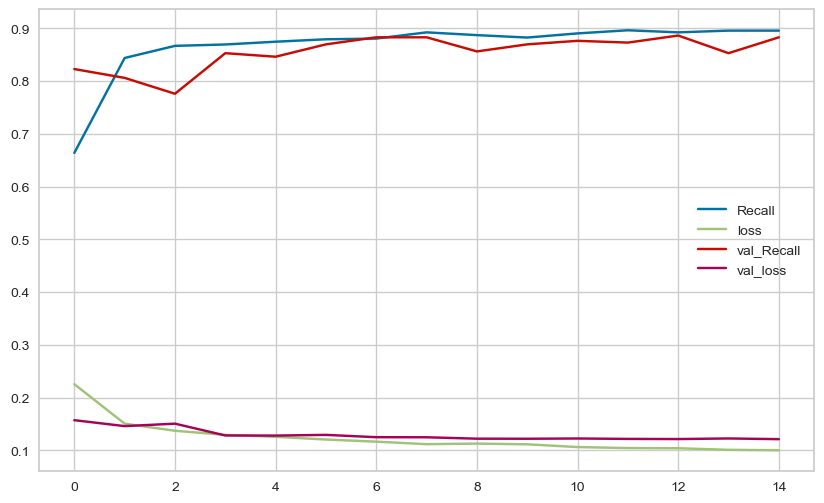

In [269]:
history = model.history.history

pd.DataFrame(history).plot()

In [270]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[[1453   47]
 [  53  246]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1500
           1       0.84      0.82      0.83       299

    accuracy                           0.94      1799
   macro avg       0.90      0.90      0.90      1799
weighted avg       0.94      0.94      0.94      1799



57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 752us/step


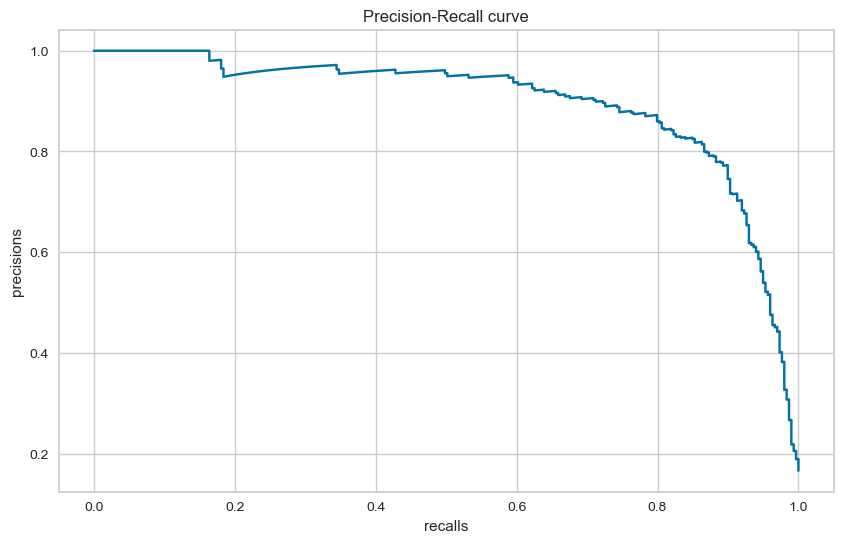

In [271]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [272]:
average_precision_score(y_test, y_pred_proba)

0.8960724156891342

In [273]:
DL_AP_op = average_precision_score(y_test, y_pred_proba)
DL_f1_op = f1_score(y_test, y_pred)
DL_rec_op = recall_score(y_test, y_pred)

#### optuna with smote

In [274]:
#pip install imblearn

In [275]:
#pip install --upgrade optuna imbalanced-learn

In [276]:
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from tensorflow.keras.layers import Dropout

# SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [277]:
# Optuna objective fonksiyonu

def create_model(trial):
    n_units1 = trial.suggest_int('n_units1', 8, 128)
    n_units2 = trial.suggest_int('n_units2', 8, 128)
    n_units3 = trial.suggest_int('n_units3', 8, 128)
    optimizer = trial.suggest_categorical("optimizer", [Adam, Adadelta, RMSprop, Nadam])
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-2)
    
    os.environ["TF_DETERMINISTIC_OPS"] = "1"
    tf.keras.utils.set_random_seed(SEED)
    
    model = Sequential()
    model.add(Dense(n_units1, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(n_units2, activation='relu'))
    model.add(Dense(n_units3, activation='relu')) 
    model.add(Dropout(trial.suggest_uniform('dropout', 0.2, 0.5)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer(learning_rate=learning_rate),
                  metrics=[trial_metric, "Precision", "AUC"])
    return model

def objective(trial):
    model = create_model(trial)
    w0 = trial.suggest_loguniform("w0", 0.01, 5)
    w1 = trial.suggest_loguniform("w1", 0.01, 5)
    
    batch_size = trial.suggest_categorical("batch_size", [128, 256, 512])
    
    model.fit(X_train_resampled,
              y_train_resampled,
              validation_data=(X_val, y_val),
              batch_size=batch_size,
              epochs=100,
              callbacks=[early_stop],
              class_weight={0: w0, 1: w1},
              verbose=0)
    
    y_pred_val = (model.predict(X_val) > 0.5).astype("int32")
    score = f1_score(y_val, y_pred_val)
    
    return score

In [278]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30)

[I 2024-09-11 13:27:36,384] A new study created in memory with name: no-name-a385b217-a69c-4bde-8b9b-1767bacc9d72


Epoch 15: early stopping
Restoring model weights from the end of the best epoch: 1.
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[I 2024-09-11 13:27:41,567] Trial 0 finished with value: 0.0 and parameters: {'n_units1': 127, 'n_units2': 26, 'n_units3': 61, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.0011011820670370864, 'dropout': 0.39280332294146114, 'w0': 3.2536309157560854, 'w1': 0.3917337561272048, 'batch_size': 512}. Best is trial 0 with value: 0.0.


Epoch 15: early stopping
Restoring model weights from the end of the best epoch: 1.
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[I 2024-09-11 13:27:46,206] Trial 1 finished with value: 0.2842724978973928 and parameters: {'n_units1': 68, 'n_units2': 49, 'n_units3': 98, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.001777137493872379, 'dropout': 0.292663032226145, 'w0': 0.016556901193452343, 'w1': 0.203537343815886, 'batch_size': 128}. Best is trial 1 with value: 0.2842724978973928.


Epoch 15: early stopping
Restoring model weights from the end of the best epoch: 1.
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[I 2024-09-11 13:27:50,143] Trial 2 finished with value: 0.2842724978973928 and parameters: {'n_units1': 10, 'n_units2': 20, 'n_units3': 123, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.0008838798838131627, 'dropout': 0.4103518666833913, 'w0': 0.02730978359225674, 'w1': 0.18749774906548353, 'batch_size': 512}. Best is trial 1 with value: 0.2842724978973928.


Epoch 15: early stopping
Restoring model weights from the end of the best epoch: 1.
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[I 2024-09-11 13:27:55,699] Trial 3 finished with value: 0.0 and parameters: {'n_units1': 9, 'n_units2': 46, 'n_units3': 23, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.0018434847162930451, 'dropout': 0.3111566302825019, 'w0': 3.5898082227391352, 'w1': 0.39896639511794224, 'batch_size': 128}. Best is trial 1 with value: 0.2842724978973928.


Epoch 15: early stopping
Restoring model weights from the end of the best epoch: 1.
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[I 2024-09-11 13:27:59,071] Trial 4 finished with value: 0.28693424423569597 and parameters: {'n_units1': 70, 'n_units2': 44, 'n_units3': 72, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.00012182921624639594, 'dropout': 0.4178226729660137, 'w0': 0.30950982296851065, 'w1': 3.9425990510028246, 'batch_size': 512}. Best is trial 4 with value: 0.28693424423569597.


Epoch 15: early stopping
Restoring model weights from the end of the best epoch: 1.
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[I 2024-09-11 13:28:02,139] Trial 5 finished with value: 0.0 and parameters: {'n_units1': 17, 'n_units2': 60, 'n_units3': 36, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.001052642319507348, 'dropout': 0.3378941762009504, 'w0': 4.009724088707135, 'w1': 0.5704963328027152, 'batch_size': 512}. Best is trial 4 with value: 0.28693424423569597.


Epoch 15: early stopping
Restoring model weights from the end of the best epoch: 1.
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[I 2024-09-11 13:28:06,700] Trial 6 finished with value: 0.022857142857142857 and parameters: {'n_units1': 96, 'n_units2': 102, 'n_units3': 74, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.0009168945825591147, 'dropout': 0.43178421693470426, 'w0': 0.040918207956754084, 'w1': 0.019249237030907314, 'batch_size': 256}. Best is trial 4 with value: 0.28693424423569597.


Epoch 15: early stopping
Restoring model weights from the end of the best epoch: 1.
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[I 2024-09-11 13:28:10,060] Trial 7 finished with value: 0.2842724978973928 and parameters: {'n_units1': 92, 'n_units2': 25, 'n_units3': 13, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.0001271492618074887, 'dropout': 0.24183701048691192, 'w0': 0.5245135731014594, 'w1': 3.0078626585791315, 'batch_size': 256}. Best is trial 4 with value: 0.28693424423569597.


Epoch 15: early stopping
Restoring model weights from the end of the best epoch: 1.
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[I 2024-09-11 13:28:14,378] Trial 8 finished with value: 0.0 and parameters: {'n_units1': 46, 'n_units2': 83, 'n_units3': 91, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.00036241185947649983, 'dropout': 0.4523710226021243, 'w0': 0.03775325197021848, 'w1': 0.23294897213403715, 'batch_size': 512}. Best is trial 4 with value: 0.28693424423569597.


Epoch 15: early stopping
Restoring model weights from the end of the best epoch: 1.
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[I 2024-09-11 13:28:18,418] Trial 9 finished with value: 0.0 and parameters: {'n_units1': 109, 'n_units2': 40, 'n_units3': 59, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.00024498536073950486, 'dropout': 0.38888641102636534, 'w0': 0.06165891444288252, 'w1': 0.028377377067613764, 'batch_size': 256}. Best is trial 4 with value: 0.28693424423569597.


Epoch 15: early stopping
Restoring model weights from the end of the best epoch: 1.
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[I 2024-09-11 13:28:22,636] Trial 10 finished with value: 0.34782608695652173 and parameters: {'n_units1': 57, 'n_units2': 124, 'n_units3': 128, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.007529520803823445, 'dropout': 0.4793614854040284, 'w0': 0.3490017633351259, 'w1': 4.285959691133414, 'batch_size': 512}. Best is trial 10 with value: 0.34782608695652173.


Epoch 15: early stopping
Restoring model weights from the end of the best epoch: 1.
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[I 2024-09-11 13:28:27,550] Trial 11 finished with value: 0.328125 and parameters: {'n_units1': 50, 'n_units2': 125, 'n_units3': 124, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.007364070362848689, 'dropout': 0.48950543371063626, 'w0': 0.32027237085593613, 'w1': 4.4482941028369805, 'batch_size': 512}. Best is trial 10 with value: 0.34782608695652173.


Epoch 15: early stopping
Restoring model weights from the end of the best epoch: 1.
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[I 2024-09-11 13:28:31,714] Trial 12 finished with value: 0.3411167512690355 and parameters: {'n_units1': 42, 'n_units2': 120, 'n_units3': 127, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.009171112325153033, 'dropout': 0.4994738265465271, 'w0': 0.11973243713227863, 'w1': 1.4140243711035052, 'batch_size': 512}. Best is trial 10 with value: 0.34782608695652173.


Epoch 15: early stopping
Restoring model weights from the end of the best epoch: 1.
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[I 2024-09-11 13:28:36,537] Trial 13 finished with value: 0.345679012345679 and parameters: {'n_units1': 34, 'n_units2': 125, 'n_units3': 107, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.009440746002148389, 'dropout': 0.4994219366328065, 'w0': 0.12738864636084618, 'w1': 1.4380072206060783, 'batch_size': 512}. Best is trial 10 with value: 0.34782608695652173.


Epoch 15: early stopping
Restoring model weights from the end of the best epoch: 1.
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[I 2024-09-11 13:28:40,562] Trial 14 finished with value: 0.5934065934065934 and parameters: {'n_units1': 30, 'n_units2': 101, 'n_units3': 102, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.004131272328377357, 'dropout': 0.4579794410703694, 'w0': 1.0891319355435118, 'w1': 1.3023777398312855, 'batch_size': 512}. Best is trial 14 with value: 0.5934065934065934.


Epoch 15: early stopping
Restoring model weights from the end of the best epoch: 1.
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[I 2024-09-11 13:28:46,652] Trial 15 finished with value: 0.7798408488063661 and parameters: {'n_units1': 71, 'n_units2': 98, 'n_units3': 108, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.003910617944782434, 'dropout': 0.45614656624639305, 'w0': 1.1054434728020468, 'w1': 1.2154743950464766, 'batch_size': 128}. Best is trial 15 with value: 0.7798408488063661.


Epoch 15: early stopping
Restoring model weights from the end of the best epoch: 1.
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[I 2024-09-11 13:28:51,892] Trial 16 finished with value: 0.7682119205298014 and parameters: {'n_units1': 77, 'n_units2': 86, 'n_units3': 103, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.003911174452655963, 'dropout': 0.3733442643252452, 'w0': 1.0874315662325083, 'w1': 0.07012421109761922, 'batch_size': 128}. Best is trial 15 with value: 0.7798408488063661.


Epoch 15: early stopping
Restoring model weights from the end of the best epoch: 1.
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[I 2024-09-11 13:28:57,740] Trial 17 finished with value: 0.5619834710743802 and parameters: {'n_units1': 80, 'n_units2': 79, 'n_units3': 86, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.003681325894464919, 'dropout': 0.3451443332536277, 'w0': 1.4032472030678858, 'w1': 0.04773720763499371, 'batch_size': 128}. Best is trial 15 with value: 0.7798408488063661.


Epoch 15: early stopping
Restoring model weights from the end of the best epoch: 1.
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[I 2024-09-11 13:29:03,151] Trial 18 finished with value: 0.773972602739726 and parameters: {'n_units1': 86, 'n_units2': 98, 'n_units3': 112, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.0037688878717912237, 'dropout': 0.20258198501789693, 'w0': 1.2381413331317412, 'w1': 0.06980437064921265, 'batch_size': 128}. Best is trial 15 with value: 0.7798408488063661.


Epoch 15: early stopping
Restoring model weights from the end of the best epoch: 1.
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[I 2024-09-11 13:29:07,954] Trial 19 finished with value: 0.0 and parameters: {'n_units1': 91, 'n_units2': 102, 'n_units3': 113, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.0025304078692911292, 'dropout': 0.20365846463714757, 'w0': 1.91527166476078, 'w1': 0.1133064305176922, 'batch_size': 128}. Best is trial 15 with value: 0.7798408488063661.


Epoch 15: early stopping
Restoring model weights from the end of the best epoch: 1.
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[I 2024-09-11 13:29:13,862] Trial 20 finished with value: 0.6415094339622641 and parameters: {'n_units1': 121, 'n_units2': 71, 'n_units3': 82, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.0005306586520497424, 'dropout': 0.26490664635491085, 'w0': 0.7920113061811023, 'w1': 0.8765160705837273, 'batch_size': 128}. Best is trial 15 with value: 0.7798408488063661.


Epoch 15: early stopping
Restoring model weights from the end of the best epoch: 1.
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[I 2024-09-11 13:29:19,292] Trial 21 finished with value: 0.7722772277227723 and parameters: {'n_units1': 77, 'n_units2': 93, 'n_units3': 111, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.004238655554476715, 'dropout': 0.36831457290130987, 'w0': 0.6876261386617339, 'w1': 0.06896766863959225, 'batch_size': 128}. Best is trial 15 with value: 0.7798408488063661.


Epoch 15: early stopping
Restoring model weights from the end of the best epoch: 1.
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[I 2024-09-11 13:29:25,772] Trial 22 finished with value: 0.3106796116504854 and parameters: {'n_units1': 59, 'n_units2': 94, 'n_units3': 113, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.005327469059425939, 'dropout': 0.2122485067385239, 'w0': 0.5734827053455347, 'w1': 0.010971639975667013, 'batch_size': 128}. Best is trial 15 with value: 0.7798408488063661.


Epoch 15: early stopping
Restoring model weights from the end of the best epoch: 1.
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[I 2024-09-11 13:29:32,023] Trial 23 finished with value: 0.0 and parameters: {'n_units1': 83, 'n_units2': 116, 'n_units3': 114, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.0022091416130500118, 'dropout': 0.30884490273243276, 'w0': 1.8498144002428272, 'w1': 0.07900022988194161, 'batch_size': 128}. Best is trial 15 with value: 0.7798408488063661.


Epoch 15: early stopping
Restoring model weights from the end of the best epoch: 1.
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[I 2024-09-11 13:29:37,727] Trial 24 finished with value: 0.7253521126760564 and parameters: {'n_units1': 108, 'n_units2': 109, 'n_units3': 94, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.0029119813764536544, 'dropout': 0.3563218914412343, 'w0': 0.6917404374233966, 'w1': 0.036694004190138976, 'batch_size': 128}. Best is trial 15 with value: 0.7798408488063661.


Epoch 15: early stopping
Restoring model weights from the end of the best epoch: 1.
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


[I 2024-09-11 13:29:44,309] Trial 25 finished with value: 0.8199445983379502 and parameters: {'n_units1': 61, 'n_units2': 92, 'n_units3': 116, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.0054577648863067514, 'dropout': 0.2743772316174518, 'w0': 0.161339473754499, 'w1': 0.1234108219861111, 'batch_size': 128}. Best is trial 25 with value: 0.8199445983379502.


Epoch 15: early stopping
Restoring model weights from the end of the best epoch: 1.
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[I 2024-09-11 13:29:49,841] Trial 26 finished with value: 0.8100558659217877 and parameters: {'n_units1': 58, 'n_units2': 71, 'n_units3': 51, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.0056355259481825236, 'dropout': 0.2364702181871004, 'w0': 0.16307870013116416, 'w1': 0.12421466097226354, 'batch_size': 128}. Best is trial 25 with value: 0.8199445983379502.


Epoch 15: early stopping
Restoring model weights from the end of the best epoch: 1.
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[I 2024-09-11 13:29:55,329] Trial 27 finished with value: 0.2085661080074488 and parameters: {'n_units1': 60, 'n_units2': 71, 'n_units3': 41, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.006483431693407979, 'dropout': 0.2414935000282528, 'w0': 0.16377579642760787, 'w1': 0.13383314796521054, 'batch_size': 128}. Best is trial 25 with value: 0.8199445983379502.


Epoch 15: early stopping
Restoring model weights from the end of the best epoch: 1.
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[I 2024-09-11 13:30:01,107] Trial 28 finished with value: 0.541871921182266 and parameters: {'n_units1': 35, 'n_units2': 62, 'n_units3': 50, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.0057325202650415205, 'dropout': 0.2698328926285979, 'w0': 0.07768638444784809, 'w1': 0.48859341823102787, 'batch_size': 128}. Best is trial 25 with value: 0.8199445983379502.


Epoch 15: early stopping
Restoring model weights from the end of the best epoch: 1.
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[I 2024-09-11 13:30:05,798] Trial 29 finished with value: 0.636734693877551 and parameters: {'n_units1': 54, 'n_units2': 110, 'n_units3': 65, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.0017161125932146656, 'dropout': 0.23496118583645811, 'w0': 0.21107562026112084, 'w1': 0.2772384920404847, 'batch_size': 256}. Best is trial 25 with value: 0.8199445983379502.


In [279]:
def scheduler(epoch, lr):
    return float(lr * tf.math.exp(-0.1))

lr_scheduler = LearningRateScheduler(scheduler)

In [280]:
unit1, unit2, unit3, optimizer, learning_rate, w0, w1 = (study.best_params['n_units1'],
                                                 study.best_params['n_units2'], 
                                                 study.best_params['n_units3'], 
                                                 study.best_params['optimizer'],
                                                 study.best_params['learning_rate'],
                                                 study.best_params['w0'],
                                                 study.best_params['w1'])

model = Sequential()
model.add(Dense(unit1, activation="relu", input_shape=(X_train.shape[1],)))
model.add(Dense(unit2, activation="relu"))
model.add(Dense(unit3, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = optimizer(learning_rate=learning_rate)

model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])


history = model.fit(X_train_resampled,
                    y_train_resampled,
                    validation_split=0.1,
                    batch_size=512,
                    epochs=100,
                    callbacks=[early_stop, lr_scheduler],
                    class_weight={0: w0, 1: w1},  
                    verbose=1)

Epoch 1/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - Recall: 0.3498 - loss: 0.0838 - val_Recall: 0.8954 - val_loss: 0.3139 - learning_rate: 0.0049
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Recall: 0.8963 - loss: 0.0412 - val_Recall: 0.9529 - val_loss: 0.1611 - learning_rate: 0.0045
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Recall: 0.9354 - loss: 0.0269 - val_Recall: 0.9497 - val_loss: 0.1722 - learning_rate: 0.0040
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Recall: 0.9400 - loss: 0.0231 - val_Recall: 0.9471 - val_loss: 0.1769 - learning_rate: 0.0037
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Recall: 0.9401 - loss: 0.0209 - val_Recall: 0.9458 - val_loss: 0.1794 - learning_rate: 0.0033
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Recall: 0.9408 - loss: 0.0196 - val_Recall: 0.9438 - val_loss: 0.1770 - learning_rate: 0.0030
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Recall: 0.9411 - loss: 0.0188 - val_Recall: 0.9471 - val_loss: 0

In [281]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[[1236  264]
 [  40  259]]
              precision    recall  f1-score   support

           0       0.97      0.82      0.89      1500
           1       0.50      0.87      0.63       299

    accuracy                           0.83      1799
   macro avg       0.73      0.85      0.76      1799
weighted avg       0.89      0.83      0.85      1799



57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step


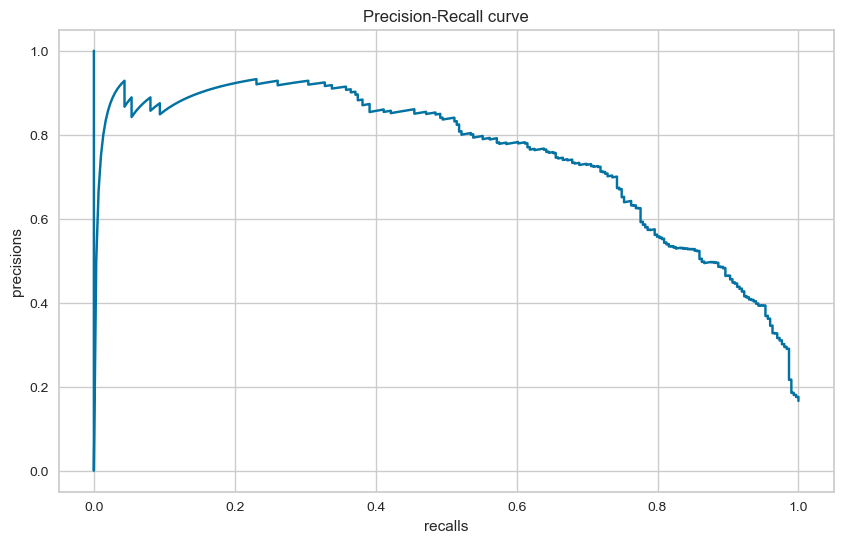

In [282]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [283]:
average_precision_score(y_test, y_pred_proba)

0.7518684088112944

In [284]:
DL_AP_smote = average_precision_score(y_test, y_pred_proba)
DL_f1_smote = f1_score(y_test, y_pred)
DL_rec_smote = recall_score(y_test, y_pred)

#### Evaluating Model Performance and Tuning
- Compare model performances according to metrics you choose for the problem.

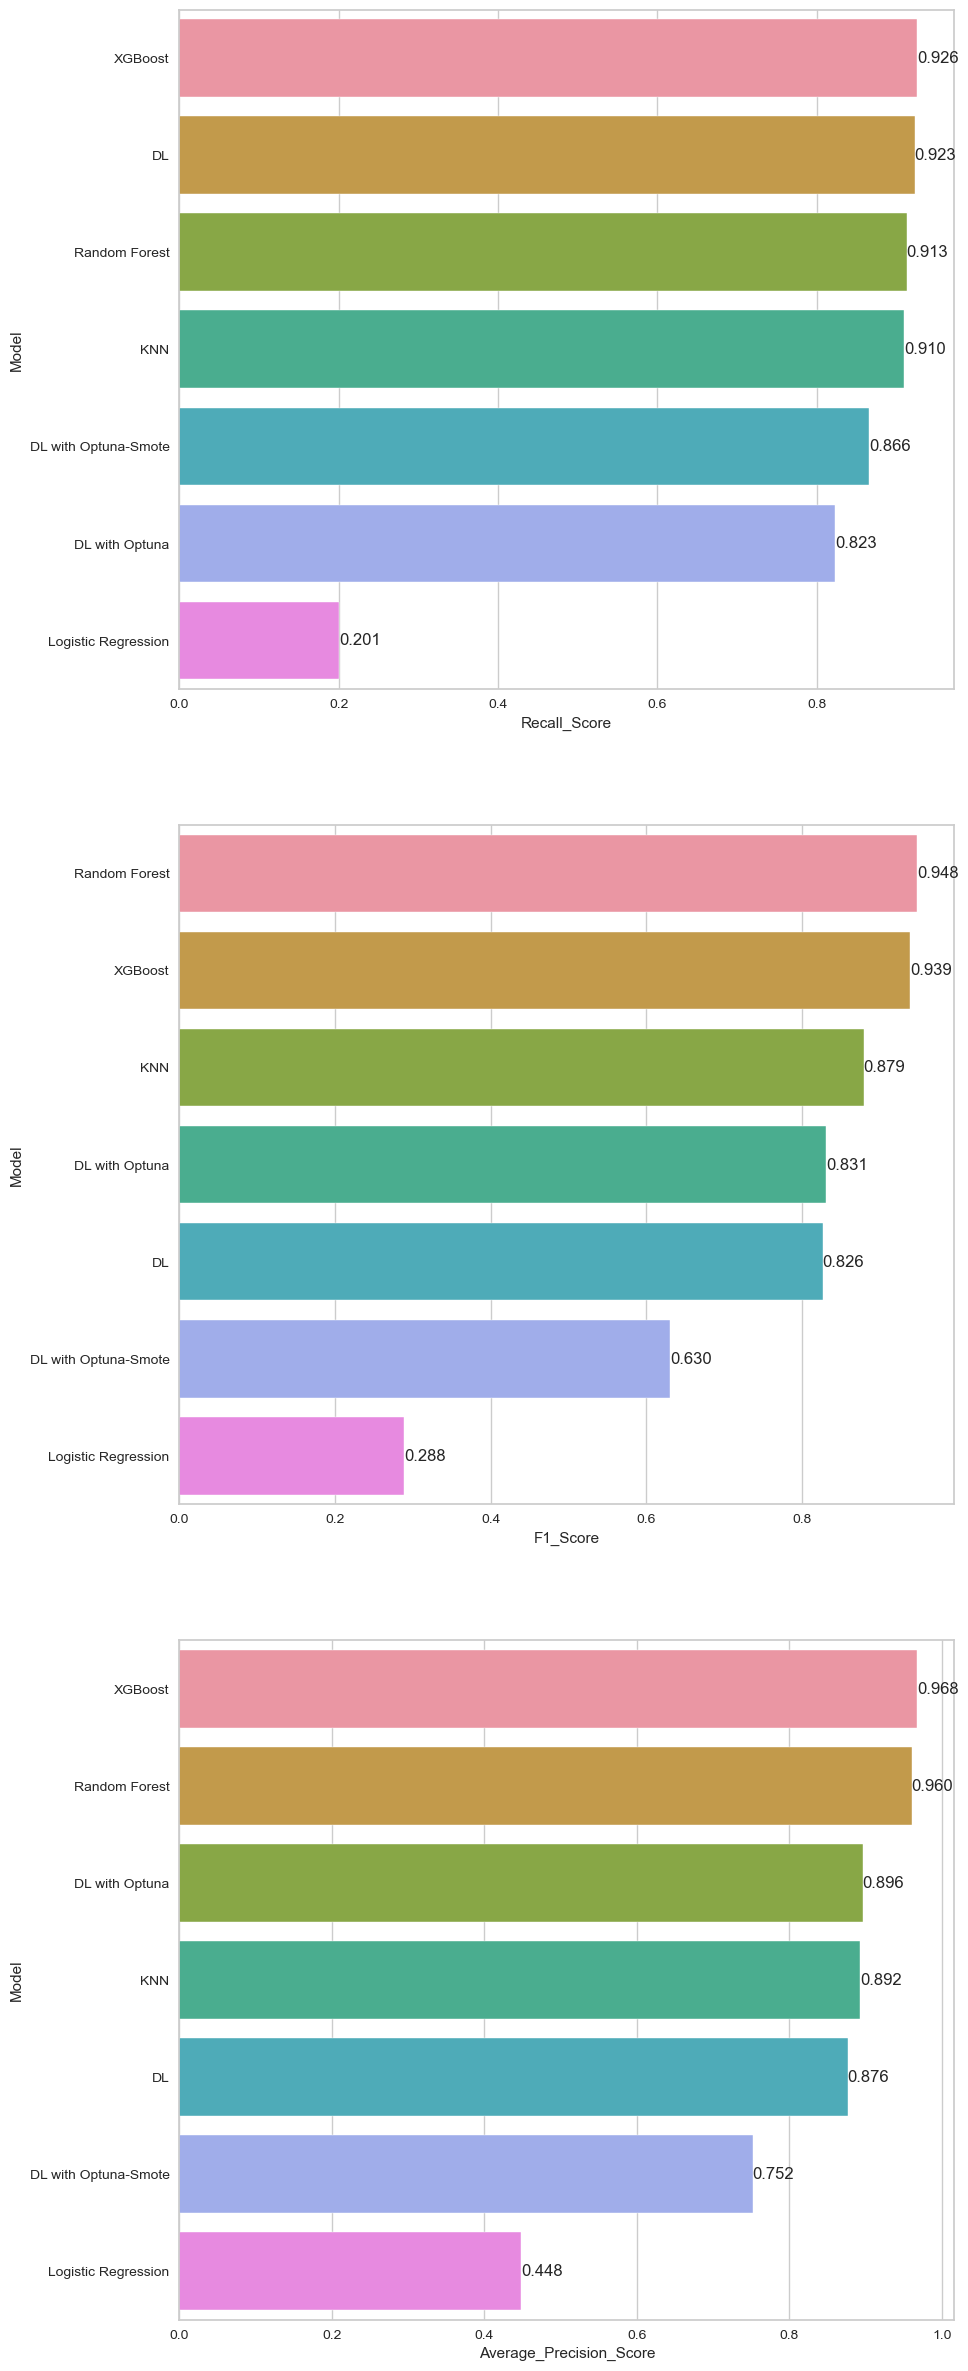

In [285]:
compare = pd.DataFrame({"Model": ["Logistic Regression", "KNN", "Random Forest",
                                  "XGBoost", "DL", "DL with Optuna", "DL with Optuna-Smote"],

                        "F1_Score": [logistic_f1, KNN_f1, rf_f1, xgb_f1, DL_f1, DL_f1_op, DL_f1_smote],

                        "Recall_Score": [logistic_recall, KNN_recall, rf_recall, xgb_recall, DL_rec, DL_rec_op, DL_rec_smote],

                        "Average_Precision_Score": [logistic_AP, KNN_AP, rf_AP, xgb_AP, DL_AP, DL_AP_op, DL_AP_smote]})


plt.figure(figsize=(10,30))
plt.subplot(311)
compare = compare.sort_values(by="Recall_Score",
                              ascending=False)
ax=sns.barplot(x="Recall_Score",
               y="Model",
               data=compare)
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(312)
compare = compare.sort_values(by="F1_Score",
                              ascending=False)
ax=sns.barplot(x="F1_Score",
               y="Model",
               data=compare)
ax.bar_label(ax.containers[0], fmt="%.3f")


plt.subplot(313)
compare = compare.sort_values(by="Average_Precision_Score",
                              ascending=False)
ax=sns.barplot(x="Average_Precision_Score",
               y="Model",
               data=compare)
ax.bar_label(ax.containers[0], fmt="%.3f")
plt.show();

####  Prediction of Random Forest

In [286]:
X = df.drop(columns=["left"])
y = df['left']

In [287]:
X.head(2)

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   

   time_spend_company  work_accident  promotion_last_5years departments  \
0                   3              0                      0       sales   
1                   6              0                      0       sales   

   salary  cluster  
0     low        1  
1  medium        2

In [288]:
# Define your feature columns
numeric_features = ['satisfaction_level', 'last_evaluation', 'number_project',
                    'average_monthly_hours', 'time_spend_company', 'work_accident',
                    'promotion_last_5years']  # numeric columns
cat_onehot = ['departments']  # categorical column for OneHotEncoder
cat_ordinal = ['salary']  # categorical column for OrdinalEncoder

# Define your preprocessing steps
numeric_transformer = StandardScaler()  # for numeric columns
onehot_transformer = OneHotEncoder()  # for departments (OneHotEncoding)
ordinal_transformer = OrdinalEncoder(categories=[['low', 'medium', 'high']])  # for salary (OrdinalEncoding)


# Combine preprocessing for both numeric, one-hot categorical, and ordinal categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat_onehot', onehot_transformer, cat_onehot),
        ('cat_ordinal', ordinal_transformer, cat_ordinal)])

# Pipeline tanımı
rf_final = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

# Modelin eğitilmesi
rf_final.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['satisfaction_level',
                                                   'last_evaluation',
                                                   'number_project',
                                                   'average_monthly_hours',
                                                   'time_spend_company',
                                                   'work_accident',
                                                   'promotion_last_5years']),
                                                 ('cat_onehot', OneHotEncoder(),
                                                  ['departments']),
                                                 ('cat_ordinal',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high']]),
                                                  ['salary'])])),
                ('classifier', RandomForestClassifier())])

In [289]:
df.describe().T

count   mean   std   min    25%    50%    75%    max
satisfaction_level    11991.00   0.63  0.24  0.09   0.48   0.66   0.82   1.00
last_evaluation       11991.00   0.72  0.17  0.36   0.57   0.72   0.86   1.00
number_project        11991.00   3.80  1.16  2.00   3.00   4.00   5.00   7.00
average_monthly_hours 11991.00 200.47 48.73 96.00 157.00 200.00 243.00 310.00
time_spend_company    11991.00   3.36  1.33  2.00   3.00   3.00   4.00  10.00
work_accident         11991.00   0.15  0.36  0.00   0.00   0.00   0.00   1.00
left                  11991.00   0.17  0.37  0.00   0.00   0.00   0.00   1.00
promotion_last_5years 11991.00   0.02  0.13  0.00   0.00   0.00   0.00   1.00
cluster               11991.00   1.35  0.59  0.00   1.00   1.00   2.00   2.00

In [290]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'departments', 'salary', 'cluster'],
      dtype='object')

In [291]:
df.departments.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [292]:
df.sample(n=2)

satisfaction_level  last_evaluation  number_project  \
6436                0.50             0.52               5   
6146                0.46             0.75               6   

      average_monthly_hours  time_spend_company  work_accident  left  \
6436                    137                   3              1     0   
6146                    276                   6              0     0   

      promotion_last_5years departments  salary  cluster  
6436                      0   technical  medium        2  
6146                      0     support     low        1

In [293]:
observations = {
    "satisfaction_level": [0.83, 0.42],  # Örnek değerler
    "last_evaluation": [0.98, 0.46],
    "number_project": [5, 2],
    "average_monthly_hours": [187, 147],
    "time_spend_company": [4, 3],
    "work_accident": [0, 0],
    "promotion_last_5years": [0, 0],
    "departments": ["hr", "sales"],  # Kategorik veriler
    "salary": ["medium", "low"]
}

# DataFrame formatına çevirin
obs = pd.DataFrame(observations)

In [294]:
# Yeni gözlemler üzerinde tahmin yapın
pred_rf = rf_final.predict(obs)
pred_rf

array([0, 1], dtype=int64)

In [295]:
import pickle

pickle.dump(rf_final, open('rf_model_app', 'wb'))

In [296]:
rf_final_new = pickle.load(open('rf_model_app', 'rb'))

In [297]:
rf_final_new.predict(obs)

array([0, 1], dtype=int64)

### Prediction of XGBoost

In [298]:
# Define your feature columns
numeric_features = ['satisfaction_level', 'last_evaluation', 'number_project',
                    'average_monthly_hours', 'time_spend_company', 'work_accident',
                    'promotion_last_5years']  # numeric columns
cat_onehot = ['departments']  # categorical column for OneHotEncoder
cat_ordinal = ['salary']  # categorical column for OrdinalEncoder

# Define your preprocessing steps
numeric_transformer = StandardScaler()  # for numeric columns
onehot_transformer = OneHotEncoder()  # for departments (OneHotEncoding)
ordinal_transformer = OrdinalEncoder(categories=[['low', 'medium', 'high']])  # for salary (OrdinalEncoding)


# Combine preprocessing for both numeric, one-hot categorical, and ordinal categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat_onehot', onehot_transformer, cat_onehot),
        ('cat_ordinal', ordinal_transformer, cat_ordinal)])

xgb_model = XGBClassifier(class_weight="balanced", random_state=101)

operations_xgb = [
    ("preprocessor", preprocessor),
    ("xgb_model", XGBClassifier(class_weight="balanced", random_state=101)),
]

# Create the pipeline
xgb_final = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('xgb_model', xgb_model) 
])

# Fit the pipeline
xgb_final.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['satisfaction_level',
                                                   'last_evaluation',
                                                   'number_project',
                                                   'average_monthly_hours',
                                                   'time_spend_company',
                                                   'work_accident',
                                                   'promotion_last_5years']),
                                                 ('cat_onehot', OneHotEncoder(),
                                                  ['departments']),
                                                 ('cat_ordinal',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high']]),
                                                  ['s...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [299]:
pred_xgb= xgb_final.predict(obs)
pred_xgb

array([0, 1])

In [300]:
import pickle

pickle.dump(xgb_final, open('xgb_model_app', 'wb'))

In [301]:
xgb_final_new = pickle.load(open('xgb_model_app', 'rb'))

In [302]:
xgb_final_new.predict(obs)

array([0, 1])

## 6. Model Deployment

You cooked the food in the kitchen and moved on to the serving stage. The question is how do you showcase your work to others? Model Deployement helps you showcase your work to the world and make better decisions with it. But, deploying a model can get a little tricky at times. Before deploying the model, many things such as data storage, preprocessing, model building and monitoring need to be studied. Streamlit is a popular open source framework used by data scientists for model distribution.

Deployment of machine learning models, means making your models available to your other business systems. By deploying models, other systems can send data to them and get their predictions, which are in turn populated back into the company systems. Through machine learning model deployment, can begin to take full advantage of the model you built.

Data science is concerned with how to build machine learning models, which algorithm is more predictive, how to design features, and what variables to use to make the models more accurate. However, how these models are actually used is often neglected. And yet this is the most important step in the machine learning pipline. Only when a model is fully integrated with the business systems, real values ​​can be extract from its predictions.

After doing the following operations in this notebook, jump to new .py file and create your web app with Streamlit.

### Save and Export the Best Model

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___